# AI-Powered Customer Review Assistant Using (Chains) LangChain 🔗🔗 🤖 

## Introduction
This notebook demonstrates the use of `various chain mechanisms in LangChain` to manage and orchestrate complex workflows involving language models. The primary chain mechanisms covered include:  
  
- **LLMChain**: Basic chain for single LLM interactions
- **Sequential Chains**: Chains that pass intermediate results  
    - **SimpleSequentialChain**: Basic sequential execution  
    - **SequentialChain**: Advanced sequential execution   
- **Router Chain**


These chain mechanisms enable more effective and structured interactions with AI models by leveraging different chaining techniques. In this notebook, we will explore different types of chains and how they can be used to `build a customer review assistant`. However, while these chain mechanisms may resemble agents in a traditional sense, they do not align with LangChain's definition of an agent, which includes tools and decision-making capabilities. In fact, a `Retrieval-Augmented Generation (ReAct) Agent` integrates retrieval and generation within an agent framework, dynamically accessing relevant information to enhance responses. We will demonstrate how to `build a basic ReAct agent from scratch` using the OpenAI API, enabling it to process user inputs, perform predefined actions, and provide informed responses. We will demonstrate how a structured approach using LangChain can create an AI-Powered Customer Review Assistant`. This assistant will be capable of understanding customer feedback, translating it for broader accessibility, summarizing key points for quick reference, and providing professional and empathetic responses to maintain customer relationships

### Data Loading and Display:
More information about the dataset on [Amazon Reviews Multi](https://www.kaggle.com/datasets/mexwell/amazon-reviews-multi) and  on the pubblication of [Phillip Keung, Yichao Lu, György Szarvas and Noah A. Smith. “The Multilingual Amazon Reviews Corpus.” In Proceedings of the 2020 Conference on Empirical Methods in Natural Language Processing, 2020](https://aclanthology.org/2020.emnlp-main.369/).

For the purpose of this project, the original dataset has been resized, for more information see the [Setup Instructions](SETUP.md) file

In [1]:
# Import required libraries 
import pandas as pd
import numpy as np
import json
from tabulate import tabulate

import os
import seaborn as sns
import matplotlib.pyplot as plt

import textwrap
from IPython.display import display, HTML
from PIL import Image, ImageDraw, ImageFont

In [2]:
#Load the dataset from the CSV file
df = pd.read_csv('Resized_Amazon_Reviews_Multi_Dataset.csv')  # Adjust the path to your actual dataset

In [3]:
# Display first five rows
#print(df.head())

# Display all the rows
df

,language,product_category,review_title,review_body,stars,count
0,de,kitchen,Defekt,Gerät kam defekt an. Der Display zeigte zwar a...,1,1
1,de,pet_products,Leider nichts fpr mein OEB,Nach nicht mal 30 Sekunden hat mein Hund diese...,1,1
2,de,kitchen,Naja,"Für sandwiches, burger Patty's ist er ganz OK ...",2,1
3,de,shoes,Schlechte Qualität,"Innensohle löste sich nach ca.4 Wochen auf, Kl...",2,1
4,de,home_improvement,Verpackung,"Der Akku ist halt ein Original, also nichts zu...",3,1
5,de,pet_products,Könnte der verschluss besser sein,Ist nicht so gut weil der Kot am Hintern klebt,3,1
6,de,home_improvement,"klebt nicht so fest, wie erwartet","das Isolierband klebt nicht so fest, wie ich e...",4,1
7,de,pet_products,Es scheint....,geschmeckt zu haben. :),4,1
8,de,jewelry,Attraktives Freundschaftsband mit coolem Logo,Schönes Teil mit gutem Preis-/Leistungsverhält...,5,1
9,de,pet_products,Gute Geschenk idee,"Meine freundin hat sich sehr gefreut, tolles P...",5,1


- Explore a selected row of the dataset: Example review data

In [4]:
#Explore a selected row of the dataset 
#print(df.iloc[11])

print(json.dumps(df.iloc[11].to_dict(), indent=4))

{
    "language": "en",
    "product_category": "pc",
    "review_title": "Not Working after 3 months",
    "review_body": "Purchases this for my husband and after 3 months it just stopped working will no longer turn on. Being trying to contact support for this item since it has 1 year warranty but it just seems impossible to heb ahold of someone for a replacement.",
    "stars": 1,
    "count": 1
}


**Explanation output** The above output gives information about the language, product category, review title, review text, and start for a selected item enclosed in the dataset.

- Increase the size of the characters in the above output and save this as figure jpeg

In [5]:
#import os
#import json
#import textwrap
#from IPython.display import display, HTML
#from PIL import Image, ImageDraw, ImageFont

# Step 1: Format and wrap JSON
data_json = json.dumps(df.iloc[11].to_dict(), indent=4)
wrapped_lines = "\n".join(textwrap.fill(line, width=80) for line in data_json.splitlines())

# Step 2: Display in notebook with larger font
html_output = f"<pre style='font-size: 18px'>{wrapped_lines}</pre>"
display(HTML(html_output))

# Step 3: Export to JPEG in "Processed Reviews" folder
output_folder = "Processed Reviews"
os.makedirs(output_folder, exist_ok=True)

# Font setup (adjust path to a TTF font if necessary)
try:
    font = ImageFont.truetype("arial.ttf", 20)
except:
    font = ImageFont.load_default()

# Prepare image size
lines = wrapped_lines.split("\n")
max_line_width = max([len(line) for line in lines])
image_width = min(1200, max_line_width * 12)
image_height = len(lines) * 30 + 20

# Create image
image = Image.new("RGB", (image_width, image_height), color="white")
draw = ImageDraw.Draw(image)

# Draw each line
y = 10
for line in lines:
    draw.text((10, y), line, fill="black", font=font)
    y += 30

# Save image
output_path = os.path.join(output_folder, "output_example_query.jpeg")
image.save(output_path)
print(f"Saved as {output_path}")


Saved as Processed Reviews\output_example_query.jpeg


In [6]:
# Inspection variable language
print(df["language"].value_counts())
print(" The number of the different language is {}".format(df["language"].nunique())) 

language
de    10
en    10
es    10
fr    10
Name: count, dtype: int64
 The number of the different language is 4


In [7]:
# Inspection variable product_category
print(df["product_category"].value_counts())
print(" The number of the different product_category is {}".format(df["product_category"].nunique()))

product_category
kitchen                8
pet_products           7
sports                 6
industrial_supplies    4
shoes                  3
home_improvement       3
jewelry                2
pc                     2
other                  2
lawn_and_garden        2
home                   1
Name: count, dtype: int64
 The number of the different product_category is 11


**Explanation output** This output displays the count of customer reviews for different product categories in the dataset. As it can seen, there are 11 unique product categories, with "kitchen" having the highest count (8 reviews) and "home" the lowest (1 review). The data helps to analyze which categories have more customer feedback, which can be useful for trend analysis or further processing.

- Increase the size of the characters in the above output and save this as figure jpeg

In [8]:
import os
from PIL import Image, ImageDraw, ImageFont

# Step 1: Generate aligned text output
category_counts = df["product_category"].value_counts()
unique_count = df["product_category"].nunique()

# Compute column widths
max_cat_len = max(len(str(cat)) for cat in category_counts.index)
max_count_len = max(len(str(count)) for count in category_counts.values)

# Compose aligned lines
lines = [
    f"{'product_category':<{max_cat_len}}  {'count':>{max_count_len}}"
]
for cat, count in category_counts.items():
    lines.append(f"{cat:<{max_cat_len}}  {count:>{max_count_len}}")

lines.append("")
lines.append(f"The number of different product_category is {unique_count}")
output_text = "\n".join(lines)

# Step 2: Display in notebook
from IPython.display import display, HTML
html_output = f"<pre style='font-size: 18px; font-family: monospace'>{output_text}</pre>"
display(HTML(html_output))

# Step 3: Save to JPEG with monospaced font
output_folder = "Processed Reviews"
os.makedirs(output_folder, exist_ok=True)

# Try to load a monospaced font
try:
    font = ImageFont.truetype("DejaVuSansMono.ttf", 20)
except:
    try:
        font = ImageFont.truetype("Courier_New.ttf", 20)
    except:
        font = ImageFont.load_default()

# Create image
wrapped_lines = output_text.split("\n")
max_line_length = max(len(line) for line in wrapped_lines)
image_width = min(1200, max_line_length * 12)
image_height = len(wrapped_lines) * 30 + 20

image = Image.new("RGB", (image_width, image_height), color="white")
draw = ImageDraw.Draw(image)

y = 10
for line in wrapped_lines:
    draw.text((10, y), line, fill="black", font=font)
    y += 30

# Save image
output_path = os.path.join(output_folder, "category_summary.jpeg")
image.save(output_path)
print(f"Saved category summary to: {output_path}")

Saved category summary to: Processed Reviews\category_summary.jpeg


In [9]:
# Group by language and product_category, then count occurrences of each star rating
star_counts_by_category = (
    df.groupby(["language", "product_category"])["stars"]
    .value_counts()
    .sort_index()  # Ensures the output is sorted by stars
)

# Print the result
#print(star_counts_by_category)

# Convert to DataFrame and format output as a table
star_counts_df = star_counts_by_category.reset_index(name="count")
print(tabulate(star_counts_df, headers="keys", tablefmt="pretty"))

+----+----------+---------------------+-------+-------+
|    | language |  product_category   | stars | count |
+----+----------+---------------------+-------+-------+
| 0  |    de    |  home_improvement   |   3   |   1   |
| 1  |    de    |  home_improvement   |   4   |   1   |
| 2  |    de    |       jewelry       |   5   |   1   |
| 3  |    de    |       kitchen       |   1   |   1   |
| 4  |    de    |       kitchen       |   2   |   1   |
| 5  |    de    |    pet_products     |   1   |   1   |
| 6  |    de    |    pet_products     |   3   |   1   |
| 7  |    de    |    pet_products     |   4   |   1   |
| 8  |    de    |    pet_products     |   5   |   1   |
| 9  |    de    |        shoes        |   2   |   1   |
| 10 |    en    |        home         |   2   |   1   |
| 11 |    en    |  home_improvement   |   4   |   1   |
| 12 |    en    | industrial_supplies |   1   |   1   |
| 13 |    en    | industrial_supplies |   3   |   1   |
| 14 |    en    | industrial_supplies |   5   | 

**Explanation output** This above table shows the Amazon costumer reviews categorized by language, product category, star rating, and count. This data can be used for sentiment analysis, review summarization, or category-based insights across different languages.

- Distribution of reviews by language across different product categories

In [10]:
#import pandas as pd

# Group by product category and language, and count the number of reviews
review_distribution = df.groupby(['product_category', 'language']).size().unstack(fill_value=0)

# Display the distribution table
print(review_distribution)


language             de  en  es  fr
product_category                   
home                  0   1   0   0
home_improvement      2   1   0   0
industrial_supplies   0   3   0   1
jewelry               1   0   0   1
kitchen               2   0   3   3
lawn_and_garden       0   0   2   0
other                 0   2   0   0
pc                    0   2   0   0
pet_products          4   0   1   2
shoes                 1   1   0   1
sports                0   0   4   2


- Visualisation of the distribution of reviews by language across different product categories.

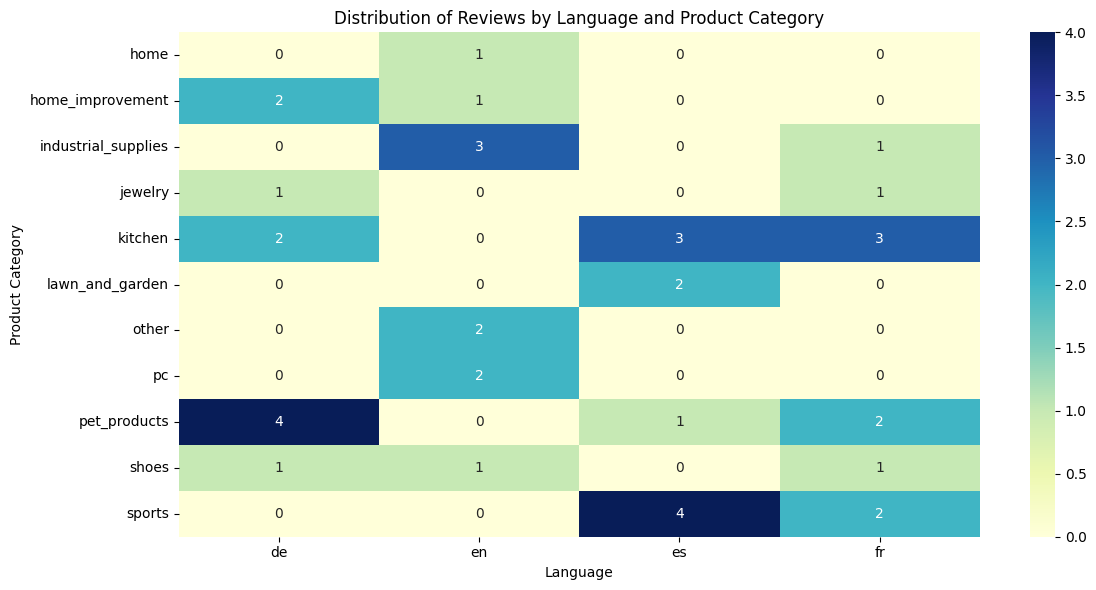

In [11]:
#import os
#import seaborn as sns
#import matplotlib.pyplot as plt

# Create the folder if it doesn't exist
output_dir = 'Visualization_graphs'
os.makedirs(output_dir, exist_ok=True)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(review_distribution, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Distribution of Reviews by Language and Product Category")
plt.xlabel("Language")
plt.ylabel("Product Category")
plt.tight_layout()

# Save the figure
output_path = os.path.join(output_dir, 'reviews_distribution_heatmap.png')
plt.savefig(output_path)
plt.show()
# Optional: Close the plot if running in a loop/script
plt.close()
 

### Setup and Imports

In [12]:
# Import required libraries for data processing and environment management
import warnings
import os
import pandas as pd  # commonly used for data manipulation and analysis
from rich import print  # helps to improve the readability of nested dictionary outputs
from rich.pretty import Pretty
from dotenv import load_dotenv, find_dotenv

# Suppress warnings
warnings.filterwarnings('ignore')

# Import LangChain-related libraries
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain, SimpleSequentialChain, SequentialChain, ConversationChain 
from langchain.memory import ConversationBufferMemory, ConversationSummaryMemory
from langchain.chat_models import ChatOpenAI
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
from langchain.prompts import PromptTemplate
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool
from graphviz import Digraph
from IPython.display import display
from tabulate import tabulate

# Load environment variables from a .env file
_ = load_dotenv(find_dotenv())  # read local .env file

### Set up LLM Model 

In [13]:
#Set the model
#llm_model = "gpt-4"  #Set the model to "gpt-4" in the final version
llm_model = "gpt-3.5-turbo" # Adjust the model name if necessary

### LLMChain Examples

This section demonstrates how to use the `LLMChain` to manage a single language model prompt and response  

**Use Case**: Basic text generation using a language model.

**How It Works**: Takes an input, formats it with a prompt template, and passes it to an LLM.

**Note**: This setup is commonly used to build AI-powered applications that generate responses based on structured prompts. This setup consists of importing key LangChain components for working with LLMs:

- **ChatOpenAI**: A wrapper for interacting with OpenAI's chat models (e.g., GPT-4, GPT-3.5) and it allows to send prompts and receive responses in a structured way.
- **ChatPromptTemplate**: A utility for creating structured prompts for LLMs.
- **LLMChain**: A chain that links a prompt template (structured prompt) to an LLM, enabling automated text generation. It combines a ChatOpenAI model with a ChatPromptTemplate to create a workflow. 
##### Example 1

This example demonstrates how to `Summarize Reviews by Category`, thus how to generate summaries for each product category by summarizing all the reviews. This prompt would aggregate all reviews for a product category and provide a summary, helping to understand the general sentiment or key points for that category. Thus, this example gives an insight how to use a LLMChain in the context of processing reviews to generate a summary of a review using a language model, several parameters should be set up: 
- _The ChatOpenAI_ object is initialized with a temperature setting and model name.  
- _A ChatPromptTemplate_ is defined to create a prompt that instructs the model to summarize a given review.  
- _An LLMChain_ is created using the language model and the prompt.  
- An example review is provided and after that, the _invoke method of the LLMChain_ is used to process the review and generate a summary.

This example demonstrates a simple and straightforward use of an LLMChain to perform a specific task (summarizing all review by a specific product_category) in the context of review processing.

- product_category = "kitchen"

In [14]:
#import pandas as pd
#from langchain_openai import ChatOpenAI
#from langchain.prompts import ChatPromptTemplate
#from langchain.chains import LLMChain

# Step 1: Load the dataset from the CSV file
df = pd.read_csv('Resized_Amazon_Reviews_Multi_Dataset.csv')  # Adjust the path to your actual dataset

# Step 2: Filter reviews based on a specific product category 
product_category = "kitchen"  # Example product category, adjust as needed
category_reviews = df[df['product_category'] == product_category]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(9)  # Limit to first 9 reviews (adjust as needed)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

# Format the review titles and bodies into the prompt format
review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary

# Step 5: Define a prompt template
prompt = ChatPromptTemplate.from_template(
    f"Summarize the reviews for the product category '{product_category}'. "
    f"The reviews include the following titles and bodies:\n"
    f"{review_text}"
    "Provide a brief summary of the overall feedback for this product category."
)

# Step 6: Create an LLMChain
#chain = LLMChain(prompt=prompt, llm=llm)
chain = prompt | llm   #LLMChain automatically formats the prompt and sends it to the LLM.

# Step 7: Use .invoke() to get the response
response = chain.invoke({"product_category": product_category,})

# Step 8: Print the response 
print(response)  # This will directly print the result returned by the model

C:\Users\Michela\AppData\Local\Temp\ipykernel_1448\22041479.py:24: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary


AIMessage(
    content='Overall, the reviews for the kitchen product category are mixed. Some customers received defective 
items or missing parts, while others found the products to be useful and good quality. There were also complaints 
about packaging and discrepancies between product descriptions and what was actually received. The feedback 
indicates a need for better quality control and accurate product descriptions in this category.',
    additional_kwargs={},
    response_metadata={
        'token_usage': {
            'completion_tokens': 68,
            'prompt_tokens': 462,
            'total_tokens': 530,
            'completion_tokens_details': {
                'accepted_prediction_tokens': 0,
                'audio_tokens': 0,
                'reasoning_tokens': 0,
                'rejected_prediction_tokens': 0
            },
            'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}
        },
        'model_name': 'gpt-3.5-turbo',
        'system_fingerprint': None,
        'finish_reason': 'stop',
        'logprobs': None
    },
    id='run-bf4cb533-df37-450a-971a-ba6f4e1b95a2-0'
)

**Explanation of Output**: The above structured output provides comprehensive information about the AI message generated, such as  _the content_ (thus, the response generate by the AI model), and  _the response metadata_ (including token usage and model information).

In [15]:
# Extract and print the content of the response
response_content = response.content
print(response_content)

Overall, the reviews for the kitchen product category are mixed. Some customers received defective items or missing
parts, while others found the products to be useful and good quality. There were also complaints about packaging 
and discrepancies between product descriptions and what was actually received. The feedback indicates a need for 
better quality control and accurate product descriptions in this category.

**Explanation output** The above output shows only the content of the given prompt, and its content seems in aggrement with the rating stars of this product category, ranging from 5 to 1. 

- product_category = "industrial_supplies"

In [16]:
# Step 2: Filter reviews based on a specific product category 
product_category = "industrial_supplies"
category_reviews = df[df['product_category'] == product_category]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(9)  # Limit to first 9 reviews (adjust as needed)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

# Format the review titles and bodies into the prompt format
review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary

# Step 5: Define a prompt template
prompt = ChatPromptTemplate.from_template(
    f"Summarize the reviews for the product category '{product_category}'. "
    f"The reviews include the following titles and bodies:\n"
    f"{review_text}"
    "Provide a brief summary of the overall feedback for this product category.")

# Step 6: Create an LLMChain
chain = prompt | llm   #LLMChain automatically formats the prompt and sends it to the LLM.

# Step 7: Use .invoke() to get the response
response = chain.invoke({"product_category": product_category,})

# Step 8: Print the response the result returned by the model
#print(response)  

# Extract and print the content of the response
response_content = response.content
print(response_content)

Overall, the reviews for the industrial_supplies category are mixed. Some customers have had issues with the size 
and functionality of the products, such as a belt that is too small and a device that had trouble connecting via 
bluetooth. However, there are also positive comments about the products, such as a shade providing a lot of 
coverage and a cord that works well despite leaving sticky residue. Customers seem to have varying experiences with
the quality and usability of the industrial supplies in this category.

**Explanation output** The above output shows only the content of the given prompt and its content seems in aggrement with the rating stars of this product category (1, 3, 5 stars rating, respectively).

-  Code to Save Snippet above code and Output as JPEG

In [17]:
import os
from PIL import Image, ImageDraw, ImageFont
import textwrap

# Step 0: Setup output folder
output_folder = "Processed Reviews"
os.makedirs(output_folder, exist_ok=True)

# Step 1: Define your code snippet and output text
code_snippet = """
# Step 2: Filter reviews based on a specific product category 
product_category = "industrial_supplies"
category_reviews = df[df['product_category'] == product_category]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(9)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")

# Step 5: Define a prompt template
prompt = ChatPromptTemplate.from_template(
    f"Summarize the reviews for the product category '{product_category}'. "
    f"The reviews include the following titles and bodies:\\n"
    f"{review_text}"
    "Provide a brief summary of the overall feedback for this product category.")

# Step 6: Create an LLMChain
chain = prompt | llm

# Step 7: Use .invoke() to get the response
response = chain.invoke({"product_category": product_category,})

# Step 8: Print the response
response_content = response.content
print(response_content)
""".strip()

# Step 2: Simulate model response (use your actual response here)
response_output = response_content  # Replace with real value if running

# Step 3: Combine code and output
full_text = f"Code Snippet:\n\n{code_snippet}\n\nModel Output:\n\n{response_output}"

# Step 4: Wrap text
wrapped_lines = []
for line in full_text.split("\n"):
    wrapped_lines.extend(textwrap.wrap(line, width=90) or [""])

# Step 5: Set up image
try:
    font = ImageFont.truetype("arial.ttf", 18)
except:
    font = ImageFont.load_default()

max_line_length = max(len(line) for line in wrapped_lines)
image_width = min(1600, max_line_length * 10)
image_height = len(wrapped_lines) * 28 + 20

image = Image.new("RGB", (image_width, image_height), color="white")
draw = ImageDraw.Draw(image)

y = 10
for line in wrapped_lines:
    draw.text((10, y), line, fill="black", font=font)
    y += 28

# Step 6: Save the image
image_path = os.path.join(output_folder, "code_and_output_LLMChain.jpeg")
image.save(image_path)
print(f"Saved code and output to: {image_path}")


Saved code and output to: Processed Reviews\code_and_output_LLMChain.jpeg

##### Example 2

This example demonstrates how to `Identifying Common Themes or Keywords in Reviews`, thus how to identify recurring themes or keywords within reviews of a specific category or language. This prompt will extract common themes or keywords that can be useful for product improvement or marketing strategies. Thus, identifying common themes or keywords in reviews can be considered an example of using an LLMChain in the context of processing reviews. Here is an example of how this could be implemented:  
- _The ChatOpenAI_ object is initialized with a temperature setting and model name.  
- _A ChatPromptTemplate_ is defined to create a prompt that instructs the model to identify common themes or keywords in a given set of reviews.  
- _An LLMChain_ is created using the language model and the prompt.  
- A set of example reviews is provided. After that, the invoke method of the LLMChain is used to process the reviews and identify common themes or keywords.  

This demonstrates how an LLMChain can be used to identify common themes or keywords in reviews, making it a valuable tool for processing and analyzing customer feedback.

- Product_category = "pet_products" and language="de" (total 4 reviews)

In [18]:
# Step 2: Filter reviews based on a specific product category  and language
product_category = "pet_products" #Adjust product_category as needed
language="de" # Adjust language as needed

category_reviews = df[(df['product_category'] == product_category) & (df['language'] == language)]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(5)  # Limit to first 5 reviews (adjust as needed)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

# Format the review titles and bodies into the prompt format
review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary

# Step 5: Define the new prompt template for identifying themes or keywords
prompt = ChatPromptTemplate.from_template(
    f"Identify the most common themes or keywords in the reviews for the product category '{product_category}' in the '{language}' language. "
    f"The reviews include the following titles and bodies:\n"
    f"{review_text}"
    "Provide the top 5 themes or keywords that frequently appear in these reviews."
)

# Step 6: Create an LLMChain
chain = LLMChain(prompt=prompt, llm=llm)

# Step 7: Use .invoke() to get the response
response = chain.invoke({
    "product_category": product_category,
    "language": language,
})

# Step 8: Print the response (themes/keywords)
print(response)  


C:\Users\Michela\AppData\Local\Temp\ipykernel_1448\3392285438.py:29: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(prompt=prompt, llm=llm)


{
    'product_category': 'pet_products',
    'language': 'de',
    'text': '1. Hund (dog)\n2. Futter (food)\n3. Verschluss (closure)\n4. Kot (feces)\n5. Geschenk (gift)'
}

**Explation output** As it can been shown from the output, the given prompt extracts common themes or keywords that can be useful for product improvement or marketing strategies in the product category 'pet_products' for the German reviews. 

- Product_category = "industrial_supplies" and language="en" (total 3 reviews)

In [19]:
# Step 2: Filter reviews based on a specific product category  and language
product_category = "industrial_supplies" #Adjust product_category as needed
language="en" # Adjust language as needed

category_reviews = df[(df['product_category'] == product_category) & (df['language'] == language)]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(5)  # Limit to first 5 reviews (adjust as needed)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

# Format the review titles and bodies into the prompt format
review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary

# Step 5: Define the new prompt template for identifying themes or keywords
prompt = ChatPromptTemplate.from_template(
    f"Identify the most common themes or keywords in the reviews for the product category '{product_category}' in the '{language}' language. "
    f"The reviews include the following titles and bodies:\n"
    f"{review_text}"
    "Provide the top 5 themes or keywords that frequently appear in these reviews."
)

# Step 6: Create an LLMChain
chain = LLMChain(prompt=prompt, llm=llm)

# Step 7: Use .invoke() to get the response
response = chain.invoke({
    "product_category": product_category,
    "language": language,
})

# Step 8: Print the response (themes/keywords)
print(response)  

{
    'product_category': 'industrial_supplies',
    'language': 'en',
    'text': '1. Small size\n2. Bluetooth connectivity\n3. Charging issues\n4. Stability\n5. Shade protection'
}

**Explation output** As it can been shown from the output, the given prompt extracts common themes or keywords that can be useful for product improvement or marketing strategies in the product category 'industrial_supplies' for English reviews. 

- Product_category = "sports" and language="es" (total 4 reviews)

In [20]:
# Step 2: Filter reviews based on a specific product category  and language
product_category = "sports" #Adjust product_category as needed
language="es" # Adjust language as needed

category_reviews = df[(df['product_category'] == product_category) & (df['language'] == language)]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(5)  # Limit to first 5 reviews (adjust as needed)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

# Format the review titles and bodies into the prompt format
review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary

# Step 5: Define the new prompt template for identifying themes or keywords
prompt = ChatPromptTemplate.from_template(
    f"Identify the most common themes or keywords in the reviews for the product category '{product_category}' in the '{language}' language. "
    f"The reviews include the following titles and bodies:\n"
    f"{review_text}"
    "Provide the top 5 themes or keywords that frequently appear in these reviews."
)

# Step 6: Create an LLMChain
chain = LLMChain(prompt=prompt, llm=llm)

# Step 7: Use .invoke() to get the response
response = chain.invoke({
    "product_category": product_category,
    "language": language,
})

# Step 8: Print the response (themes/keywords)
print(response)  

{
    'product_category': 'sports',
    'language': 'es',
    'text': '1. Calidad (Quality)\n2. Problemas (Issues)\n3. Tamaño (Size)\n4. Funcionalidad (Functionality)\n5. 
Iniciarse (Getting started)'
}

**Explation output** As it can been shown from the output, the given prompt extracts common themes or keywords that can be useful for product improvement or marketing strategies in the product category 'sports' for Spanish reviews. 

##### Example 3

This example demonstrates how to `Review Title and Body Rewriting` to rephrase or rewrite review titles and bodies for better clarity or to remove any inappropriate content. This could be useful for moderating or improving the language of customer reviews. Thus, this example can be considered an example of using an LLMChain in the context of processing reviews. Here is an example of how this could be implemented:  
- _The ChatOpenAI_ object is initialized with a temperature setting and model name.  
- _A ChatPromptTemplate_ is defined to create a prompt that instructs the model to rephrase a given review title and body for better clarity and to remove any inappropriate content.  
- _An LLMChain_ is created using the language model and the prompt.  
- _An example review title and body review_ are provided.  After that, the _invoke method of the LLMChain_ is used to process the review and generate a rewritten version.

This example demonstrates how an LLMChain can be used to rephrase or rewrite review titles and bodies, making it a valuable tool for improving the quality and appropriateness of customer feedback.

- Product_category= "industrial_supplies" and language="en" (total 3 reviews)

In [21]:
# Step 2: Filter reviews based on a specific product category  and language
product_category = "industrial_supplies" #Adjust product_category as needed
language = "en"   # Adjust language as needed
category_reviews = df[(df['product_category'] == product_category) & (df['language'] == language)]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(5)  # Limit to first 5 reviews (adjust as needed)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

# Format the review titles and bodies into the prompt format
review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary

# Step 5: Define the new prompt template for rewriting reviews with clarity
if review_titles and review_bodies:
    prompt = ChatPromptTemplate.from_template(
        f"Rewrite the following review for better clarity while keeping the original sentiment. "
        f"The review title is '{review_titles[0]}' and the review body is '{review_bodies[0]}'.\n\n"
        f"Repeat the same process for the following reviews:\n"
        f"{review_text}"
    )

    # Step 6: Create an LLMChain
    chain = LLMChain(prompt=prompt, llm=llm)

    # Step 7: Use .invoke() to get the response
    response = chain.invoke({
        "product_category": product_category,
        "language": language,
    })

    # Step 8: Print the response (rewritten reviews)
    print(response)  
else:
    print("No reviews found for the specified product category and language.")

{
    'product_category': 'industrial_supplies',
    'language': 'en',
    'text': "Title: 'Belt Size Issue'\nBelieve the other reviews, the belt is too small and prevents the mower from
starting. Additionally, it quickly burns out the belt when you do manage to start the mower.\n\nTitle: 'Initial 
Challenges but Ultimately Effective'\nHad some initial issues getting it to work, as the provided cable was not 
functioning to charge the battery. After replacing the cable and connecting the device via Bluetooth to a PC, I 
experienced some difficulty locating the PC software. However, after reaching out to their support team, I received
the correct download information within a day. The PC program works well for testing the unit, once you determine 
the correct port to use. It's accurate and stable for my needs, although I was unable to connect to Bluetooth on my
Apple devices. I may need to hard-wire the device for use in my product.\n\nTitle: 'Spinning Shade 
Solution'\nPurchased the blue shade, which is large and provides ample shade without interfering with work. Had to 
use a piece of Velcro to secure it to my hard hat, as it tended to spin around during work. Other than that, I 
really like it."
}

**Explanation output** As it can been seen from the output, the prompt allows to get a final rephrase or rewrite review titles and bodies for each item of the selected category and language for better clarity or to remove any inappropriate content in this case for English reviews based on a specific product category (industrial_supplies). 

- Product_category = "sports" and language="es" (total 4 reviews)

In [22]:
# Step 2: Filter reviews based on a specific product category  and language
product_category = "sports" #Adjust product_category as needed
language = "es"   # Adjust language as needed
category_reviews = df[(df['product_category'] == product_category) & (df['language'] == language)]

# Step 3: Prepare the review titles and bodies for the prompt
review_pairs = category_reviews[['review_title', 'review_body']].head(5)  # Limit to first 5 reviews (adjust as needed)
review_titles = review_pairs['review_title'].tolist()
review_bodies = review_pairs['review_body'].tolist()

# Format the review titles and bodies into the prompt format
review_text = ""
for i in range(len(review_titles)):
    review_text += f"- Title: '{review_titles[i]}', Body: '{review_bodies[i]}'\n"

# Step 4: Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # Adjust the model name if necessary

# Step 5: Define the new prompt template for rewriting reviews with clarity
if review_titles and review_bodies:
    prompt = ChatPromptTemplate.from_template(
        f"Rewrite the following review for better clarity while keeping the original sentiment. "
        f"The review title is '{review_titles[0]}' and the review body is '{review_bodies[0]}'.\n\n"
        f"Repeat the same process for the following reviews:\n"
        f"{review_text}"
    )

    # Step 6: Create an LLMChain
    chain = LLMChain(prompt=prompt, llm=llm)

    # Step 7: Use .invoke() to get the response
    response = chain.invoke({
        "product_category": product_category,
        "language": language,
    })

    # Step 8: Print the response (rewritten reviews)
    print(response)  # This will directly print the rewritten reviews returned by the model
else:
    print("No reviews found for the specified product category and language.")

{
    'product_category': 'sports',
    'language': 'es',
    'text': "Title: 'Fragilidad del producto'\nReview: 'Este producto no es adecuado para mountain bike. A mitad de
la ruta, cuando intenté usarlo para quitar una rueda, estaba completamente desmontado.'\n\nTitle: 'Descontento con 
el producto'\nReview: 'El freno trasero funciona muy mal, en varias ocasiones he tenido que detenerme con los pies.
Además, hace mucho ruido y no alcanza los 25km de autonomía como prometen, solo llega a los 14km como 
máximo.'\n\nTitle: 'Buen producto, pero para puertas grandes solamente'\nReview: 'Se nota que es un producto de 
calidad y se pliega fácilmente para guardarlo. Sin embargo, tuve que devolverlo porque es demasiado grande y 
solamente es útil para puertas de gran tamaño.'\n\nTitle: 'Equipo ideal para principiantes'\nReview: 'El casco y el
disipador son de buena calidad, aunque el arnés es bastante básico. ¡Perfecto para quienes se están iniciando en la
actividad!'"
}

**Explanation output** As it can been seen from the output, the prompt allows to get a final rephrase or rewrite review titles and bodies for each Spanish reviews based on the specific product category (sports) to better clarity or to remove any inappropriate content. 

### Sequential Chains Examples

Sequential chains are useful when multiple steps need to be executed in a sequence. Here, examples of `two types of Sequential Chain` will be shown up: 
- **SimpleSequentialChain**: Passes output from one chain as input to the next.
- **SequentialChain**: Allows multiple inputs and outputs.

#### SimpleSequentialChain

This section demonstrates how to use `SimpleSequentialChain` to execute a sequence of chains in a simple linear fashion. This is useful when breaking down complex tasks into smaller steps.

**How It Works**:
- The first chain generates a one-sentence description of the given topic.
- The second chain expands on that description.
- The final response is a more detailed explanation of the topic.


**Note**: The `SimpleSequentialChain` from LangChain is used to execute a sequence of LLM chains where the output of one chain is automatically passed as input to the next. The purpose of using this chain is to simplify the process of chaining multiple LLMs in a linear sequence.

##### Example 1 Extracting Key Points, Then Summarizing those Key Points

Here is an example of how you can use a SimpleSequentialChain in the context of processing reviews. This example involves two simple steps: `extracting key points from the review text and then summarizing those key points`.

In [23]:
from langchain.chains import SimpleSequentialChain
#from langchain.prompts import LLMChain, ChatPromptTemplate
from langchain_openai import ChatOpenAI

# Example review data
review_data = {
    "review_title": df.iloc[11]['review_title'],
    "review_body": df.iloc[11]['review_body']
}

# Initialize the language model
llm = ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo")

# Step 1: Extract key points from the review
extract_key_points_prompt = ChatPromptTemplate.from_template(
    "Extract the key points from the following review: {review_body}"
)
extract_key_points_chain = LLMChain(llm=llm, prompt=extract_key_points_prompt)

# Step 2: Summarize the key points
summarize_key_points_prompt = ChatPromptTemplate.from_template(
    "Summarize the following key points: {key_points}"
)
summarize_key_points_chain = LLMChain(llm=llm, prompt=summarize_key_points_prompt)

# Create the SimpleSequentialChain
simple_sequential_chain = SimpleSequentialChain(
    chains=[extract_key_points_chain, summarize_key_points_chain],
    input_key="review_body",  # Input key for the first chain
    output_key="summary"      # Final output key
)

# Use the chain to process the review
result = simple_sequential_chain.invoke({"review_body": review_data["review_body"]})
print(result)

{
    'review_body': 'Purchases this for my husband and after 3 months it just stopped working will no longer turn 
on. Being trying to contact support for this item since it has 1 year warranty but it just seems impossible to heb 
ahold of someone for a replacement.',
    'summary': '- A product purchased for the husband stopped working after 3 months and is unable to turn on\n- 
The customer is trying to contact customer support for a replacement under the 1-year warranty\n- However, it has 
been difficult to reach customer support'
}

-  Code to Save Snippet above code and Output as JPEG

In [24]:
import os
from PIL import Image, ImageDraw, ImageFont
import textwrap

# Step 0: Setup output folder
output_folder = "Processed Reviews"
os.makedirs(output_folder, exist_ok=True)

# Step 1: Define your code snippet and output text
code_snippet = """
# Example review data
review_data = {
    "review_title": df.iloc[11]['review_title'],
    "review_body": df.iloc[11]['review_body']
}

# Initialize the language model
llm = ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo")

# Step 1: Extract key points from the review
extract_key_points_prompt = ChatPromptTemplate.from_template(
    "Extract the key points from the following review: {review_body}"
)
extract_key_points_chain = LLMChain(llm=llm, prompt=extract_key_points_prompt)

# Step 2: Summarize the key points
summarize_key_points_prompt = ChatPromptTemplate.from_template(
    "Summarize the following key points: {key_points}"
)
summarize_key_points_chain = LLMChain(llm=llm, prompt=summarize_key_points_prompt)

# Create the SimpleSequentialChain
simple_sequential_chain = SimpleSequentialChain(
    chains=[extract_key_points_chain, summarize_key_points_chain],
    input_key="review_body",  # Input key for the first chain
    output_key="summary"      # Final output key
)

# Use the chain to process the review
result = simple_sequential_chain.invoke({"review_body": review_data["review_body"]})
print(result)
""".strip()

# Step 2: Use actual chain output and prepend verbose logs
verbose_log = "> Entering new SequentialChain chain...\n> Finished chain.\n"
response_output = f"{verbose_log}\n{result}"

# Step 3: Combine code and output
full_text = f"Code Snippet:\n\n{code_snippet}\n\nModel Output:\n\n{response_output}"

# Step 4: Wrap text
wrapped_lines = []
for line in full_text.split("\n"):
    wrapped_lines.extend(textwrap.wrap(line, width=90) or [""])

# Step 5: Set up image
try:
    font = ImageFont.truetype("arial.ttf", 18)
except:
    font = ImageFont.load_default()

max_line_length = max(len(line) for line in wrapped_lines)
image_width = min(1600, max_line_length * 10)
image_height = len(wrapped_lines) * 28 + 20

image = Image.new("RGB", (image_width, image_height), color="white")
draw = ImageDraw.Draw(image)

y = 10
for line in wrapped_lines:
    draw.text((10, y), line, fill="black", font=font)
    y += 28

# Step 6: Save the image
image_path = os.path.join(output_folder, "code_and_output_simplesequentialchain.jpeg")
image.save(image_path)
print(f"Saved code and output to: {image_path}")

Saved code and output to: Processed Reviews\code_and_output_simplesequentialchain.jpeg

**Graphical Representation**: The best graphical representation for this example is a flowchart, where each step represents a transformation of the input as it moves through the chain.

**Diagram Structure**:
- Input (Review text)
- Chain 1: Extract the key points from the review
- Chain 2: Summarize those key points
- Final Output (Summary Key Points)

Below is a Python snippet to create this flowchart using Graphviz:

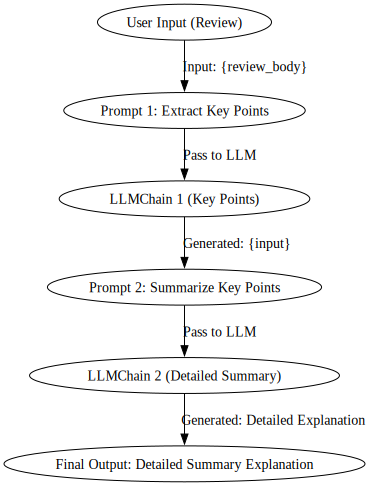

'Visualization_graphs\\flowchart_simple_sequential_chain_example1.png'

In [25]:
#from graphviz import Digraph

def visualize_simple_sequential_chain():
    dot = Digraph("SimpleSequentialChain")
    
    # Nodes
    dot.node("A", "User Input (Review)")
    dot.node("B", "Prompt 1: Extract Key Points")
    dot.node("C", "🔗 LLMChain 1 (Key Points)")
    dot.node("D", "Prompt 2: Summarize Key Points")
    dot.node("E", "🔗 LLMChain 2 (Detailed Summary)")
    dot.node("F", "Final Output: Detailed Summary Explanation")
    
    # Edges
    dot.edge("A", "B", label="Input: {review_body}")
    dot.edge("B", "C", label="Pass to LLM")
    dot.edge("C", "D", label="Generated: {input}")
    dot.edge("D", "E", label="Pass to LLM")
    dot.edge("E", "F", label="Generated: Detailed Explanation")
    
    return dot

# Generate and render the graph
#dot = visualize_simple_sequential_chain()

#from IPython.display import display

# Generate and display the graph in Jupyter Notebook
dot = visualize_simple_sequential_chain()
display(dot)


# Ensure the directory exists
output_dir = "Visualization_graphs"
os.makedirs(output_dir, exist_ok=True)

# Save the graph
dot.render(os.path.join(output_dir, "flowchart_simple_sequential_chain_example1"), format="png", view=True)

**Explanation output** : The meaning of the `SimpleSequentialChain` in LangChain matches the visual representation in the image. In this selected example the flowchart illustrates how the product input flows through the two LLM chains before producing the detailed description of the product. 

#### SequentialChain

This section demonstrates how to use SequentialChain to manage more complex workflows with multiple chained operations.

**Use Case**: When multiple steps need to be executed in a sequence with multiple inputs and outputs.

**Note** The `SequentialChain` from LangChain is a more flexible version of `SimpleSequentialChain`, allowing multiple inputs and outputs across multiple LLMChains. Its purpose is to chain multiple LLMChain instances with distinct inputs/outputs and unlike SimpleSequentialChain, it allows passing different variables between steps instead of just a single output. This is useful when working with multiple intermediate outputs that are needed for later steps. 

- Example 1 Summarizing Reviews, Then Extracting Sentiment

This example demonstrates an use case how to create a `SimpleSequentialChain`  that first, summarizes a review, then extracts its sentiment

In [26]:
# Example review data
review_data = {
    "review_title": df.iloc[11]['review_title'],
    "review_body": df.iloc[11]['review_body']
}

summarization_prompt = ChatPromptTemplate.from_template(
    "Summarize the following product review:\n\n"
    "Review Title: {review_title}\n"
    "Review Body: {review_body}\n\n"
    "Provide a concise summary.")

sentiment_prompt = ChatPromptTemplate.from_template(
    "Analyze the sentiment of the following summarized review:\n\n"
    "{summary}\n\n"
    "Is the sentiment Positive, Neutral, or Negative?")

# Initialize LLM
llm = ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo")

# Create LLMChains for summarization and sentiment analysis
summarization_chain = LLMChain(prompt=summarization_prompt, llm=llm, output_key="summary")
sentiment_chain = LLMChain(prompt=sentiment_prompt, llm=llm, output_key="sentiment")

# Create the sequential chain
chain = SequentialChain(chains=[summarization_chain, sentiment_chain], verbose=True, input_variables=["review_title", "review_body"], 
output_variables=["summary", "sentiment"])

# Run the chain with review_data from DataFrame row 11
response = chain.invoke(review_data)

# Print output
print(response)



> Entering new SequentialChain chain...

> Finished chain.


{
    'review_title': 'Not Working after 3 months',
    'review_body': 'Purchases this for my husband and after 3 months it just stopped working will no longer turn 
on. Being trying to contact support for this item since it has 1 year warranty but it just seems impossible to heb 
ahold of someone for a replacement.',
    'summary': 'The product stopped working after 3 months and the reviewer has been unable to contact support for 
a replacement despite having a 1 year warranty.',
    'sentiment': 'Negative'
}

**Explanation output** The above output describes the result of the sequential chain operation where the AI model processed a review item.  The output in question involves multiple steps, including review processing, summarization, and sentiment analysis, which aligns with the features of a `SequentialChain`.

**Graphical Representation**: The best graphical representation for this example is a flowchart, where each step represents a transformation of the input as it moves through the chain.


**Diagram Structure**:
- Input (Review text)
- Chain 1: Summarize the review text
- Chain 2: Extract the sentiment from the summarized review
- Final Output (Sentiment Description)

Below is a Python snippet to create this flowchart using Graphviz:

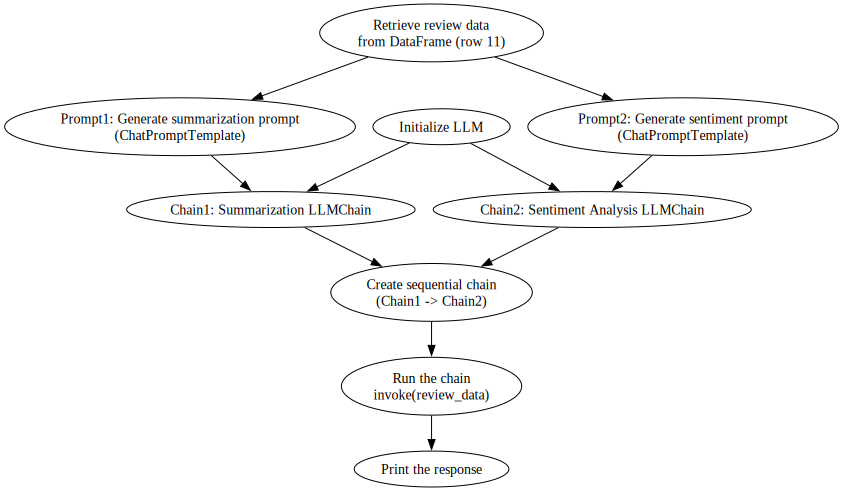

'Visualization_graphs\\flowchart_sequential_chain_example1.png'

In [27]:
#from graphviz import Digraph

# Create a directed graph
dot = Digraph(format="png")

# Define nodes
dot.node("A", "Retrieve review data\nfrom DataFrame (row 11)")
dot.node("B", "Prompt1: Generate summarization prompt\n(ChatPromptTemplate)")
dot.node("C", "Prompt2: Generate sentiment prompt\n(ChatPromptTemplate)")
dot.node("D", "Initialize LLM ")
dot.node("E", "Chain1: Summarization LLMChain")
dot.node("F", "Chain2: Sentiment Analysis LLMChain")
dot.node("G", "Create sequential chain\n(Chain1 -> Chain2)")
dot.node("H", "Run the chain\ninvoke(review_data)")
dot.node("I", "Print the response")

# Define edges (connections)
dot.edge("A", "B")  # Review data -> Summarization prompt
dot.edge("A", "C")  # Review data -> Sentiment prompt
dot.edge("B", "E")  # Summarization prompt -> Summarization Chain
dot.edge("C", "F")  # Sentiment prompt -> Sentiment Chain
dot.edge("D", "E")  # LLM -> Summarization Chain
dot.edge("D", "F")  # LLM -> Sentiment Chain
dot.edge("E", "G")  # Chain1 -> Sequential Chain
dot.edge("F", "G")  # Chain2 -> Sequential Chain
dot.edge("G", "H")  # Sequential Chain -> Invoke process
dot.edge("H", "I")  # Output result

# Render the graph
#dot.render("review_analysis_flowchart", view=True)
display(dot)

# Ensure the output directory exists
output_dir = "Visualization_graphs"
os.makedirs(output_dir, exist_ok=True)

# Save and view the graph
dot.render(os.path.join(output_dir, "flowchart_sequential_chain_example1"), format="png", view=True)

- Example 2 : Summarizing Reviews → Extracting Sentiment → Assigning Star Ratings    
 This example demonstrates how to create a `SequentialChain` that involves multiple steps with multiple inputs and outputs. In details, this example shows an use case that creates `a SequentialChain to be used in Summarizing Reviews → Extracting Sentiment → Assigning Star Ratings`.  

 **How It Works**: 
- The first chain generates a summary based on a product review.
- The second chain analyzes the sentiment of the summarized review.
- The third chain predicts the star rating based on the sentiment.

In [28]:
# Example review data
review_data = {
    "review_title": df.iloc[11]['review_title'],
    "review_body": df.iloc[11]['review_body']
}

#Prompt 1: Summarization Step
summarization_prompt = ChatPromptTemplate.from_template(
    "Summarize the following product review in one sentence:\n\n"
    "Review Title: {review_title}\n"
    "Review Body: {review_body}\n\n"
    "Summary:"
)

#Prompt 2: Sentiment Analysis Step
sentiment_prompt = ChatPromptTemplate.from_template(
    "Analyze the sentiment of the following summarized review:\n\n"
    "{summary}\n\n"
    "Is the sentiment Positive, Neutral, or Negative?"
)

#Prompt 3: Star Rating Prediction Step
rating_prompt = ChatPromptTemplate.from_template(
    "Based on the following sentiment: {sentiment}, predict a star rating (1 to 5) for the product."
)

# Initialize the Language Model
llm = ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo")

# Create LLMChains for each step
summarization_chain = LLMChain(prompt=summarization_prompt, llm=llm, output_key="summary")
sentiment_chain = LLMChain(prompt=sentiment_prompt, llm=llm, output_key="sentiment")
rating_chain = LLMChain(prompt=rating_prompt, llm=llm, output_key="predicted_stars")

# Create the Sequential Chain
chain = SequentialChain(
    chains=[summarization_chain, sentiment_chain, rating_chain],
    input_variables=["review_title", "review_body"],
    output_variables=["summary", "sentiment", "predicted_stars"],
    verbose=True
)

# Run the chain
response = chain.invoke(review_data)

# Print Output
print(response)



> Entering new SequentialChain chain...

> Finished chain.


{
    'review_title': 'Not Working after 3 months',
    'review_body': 'Purchases this for my husband and after 3 months it just stopped working will no longer turn 
on. Being trying to contact support for this item since it has 1 year warranty but it just seems impossible to heb 
ahold of someone for a replacement.',
    'summary': 'Product stopped working after 3 months, unable to reach customer support for replacement despite 
having a 1 year warranty.',
    'sentiment': 'Negative',
    'predicted_stars': '1 star'
}

-  Code to Save Snippet above code and Output as JPEG

In [29]:
import os
from PIL import Image, ImageDraw, ImageFont
import textwrap

# Step 0: Setup output folder
output_folder = "Processed Reviews"
os.makedirs(output_folder, exist_ok=True)

# Step 1: Define your code snippet and output text
code_snippet = """
# Example review data
review_data = {
    "review_title": df.iloc[11]['review_title'],
    "review_body": df.iloc[11]['review_body']}

#Prompt 1: Summarization Step
summarization_prompt = ChatPromptTemplate.from_template(
    "Summarize the following product review in one sentence:\\n\\n"
    "Review Title: {review_title}\\n"
    "Review Body: {review_body}\\n\\n"
    "Summary:")

#Prompt 2: Sentiment Analysis Step
sentiment_prompt = ChatPromptTemplate.from_template(
    "Analyze the sentiment of the following summarized review:\\n\\n"
    "{summary}\\n\\n"
    "Is the sentiment Positive, Neutral, or Negative?")

#Prompt 3: Star Rating Prediction Step
rating_prompt = ChatPromptTemplate.from_template(
    "Based on the following sentiment: {sentiment}, predict a star rating (1 to 5) for the product.")

# Initialize the Language Model
llm = ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo")

# Create LLMChains for each step
summarization_chain = LLMChain(prompt=summarization_prompt, llm=llm, output_key="summary")
sentiment_chain = LLMChain(prompt=sentiment_prompt, llm=llm, output_key="sentiment")
rating_chain = LLMChain(prompt=rating_prompt, llm=llm, output_key="predicted_stars")

# Create the Sequential Chain
chain = SequentialChain(
    chains=[summarization_chain, sentiment_chain, rating_chain],
    input_variables=["review_title", "review_body"],
    output_variables=["summary", "sentiment", "predicted_stars"],
    verbose=True)

# Run the chain
response = chain.invoke(review_data)

# Print Output
print(response)
""".strip()

# Step 2: Use actual chain output and prepend verbose logs
verbose_log = "> Entering new SequentialChain chain...\n> Finished chain.\n"
response_output = f"{verbose_log}\n{response}"

# Step 3: Combine code and output
full_text = f"Code Snippet:\n\n{code_snippet}\n\nModel Output:\n\n{response_output}"


# Step 4: Wrap text for image display
wrapped_lines = []
for line in full_text.split("\n"):
    wrapped_lines.extend(textwrap.wrap(line, width=90) or [""])

# Step 5: Prepare image canvas
try:
    font = ImageFont.truetype("arial.ttf", 18)
except:
    font = ImageFont.load_default()

max_line_length = max(len(line) for line in wrapped_lines)
image_width = min(1600, max_line_length * 10)
image_height = len(wrapped_lines) * 28 + 20

image = Image.new("RGB", (image_width, image_height), color="white")
draw = ImageDraw.Draw(image)

y = 10
for line in wrapped_lines:
    draw.text((10, y), line, fill="black", font=font)
    y += 28

# Step 6: Save the image
image_path = os.path.join(output_folder, "code_and_output_sequentialchain.jpeg")
image.save(image_path)
print(f"✅ Saved code and output to: {image_path}")


✅ Saved code and output to: Processed Reviews\code_and_output_sequentialchain.jpeg

- Example - changing the review data

In [30]:
# Example review data
review_data = {
    "review_title": df.iloc[18]['review_title'],
    "review_body": df.iloc[18]['review_body']
}

#Prompt 1: Summarization Step
summarization_prompt = ChatPromptTemplate.from_template(
    "Summarize the following product review in one sentence:\n\n"
    "Review Title: {review_title}\n"
    "Review Body: {review_body}\n\n"
    "Summary:"
)

#Prompt 2: Sentiment Analysis Step
sentiment_prompt = ChatPromptTemplate.from_template(
    "Analyze the sentiment of the following summarized review:\n\n"
    "{summary}\n\n"
    "Is the sentiment Positive, Neutral, or Negative?"
)

#Prompt 3: Star Rating Prediction Step
rating_prompt = ChatPromptTemplate.from_template(
    "Based on the following sentiment: {sentiment}, predict a star rating (1 to 5) for the product."
)


# Initialize the Language Model
llm = ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo")

# Create LLMChains for each step
summarization_chain = LLMChain(prompt=summarization_prompt, llm=llm, output_key="summary")
sentiment_chain = LLMChain(prompt=sentiment_prompt, llm=llm, output_key="sentiment")
rating_chain = LLMChain(prompt=rating_prompt, llm=llm, output_key="predicted_stars")

# Create the Sequential Chain
chain = SequentialChain(
    chains=[summarization_chain, sentiment_chain, rating_chain],
    input_variables=["review_title", "review_body"],
    output_variables=["summary", "sentiment", "predicted_stars"],
    verbose=True
)


# Run the chain
response = chain.invoke(review_data)

# Print Output
print(response)



> Entering new SequentialChain chain...

> Finished chain.


{
    'review_title': 'Had to use a piece of Velcro on my hard hat and the shade because it kept wanting to spin 
around when I worked but other than th',
    'review_body': "Purchased the blue color... It's very big but provides a lot of shade. It doesn't touch my neck
or get in the way when I work. Had to use a piece of Velcro on my hard hat and the shade because it kept wanting to
spin around when I worked but other than that I love it.",
    'summary': 'The reviewer found the blue shade to be large and effective in providing shade while working, but 
had to use Velcro to keep it from spinning around on their hard hat.',
    'sentiment': 'Neutral',
    'predicted_stars': 'It is difficult to predict a star rating without more specific information about the 
product itself.'
}

- Below is a Python snippet to create the flowchart of the above example using Graphviz:

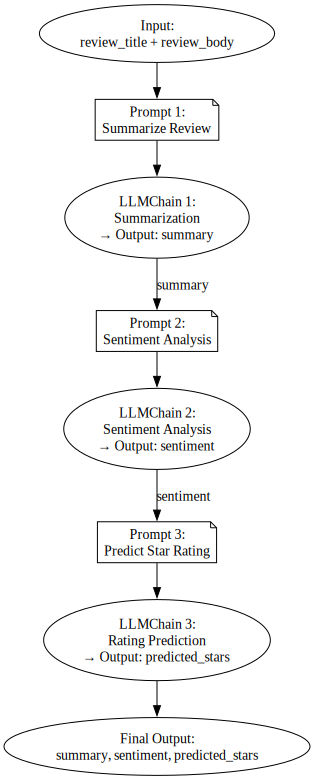

'Visualization_graphs\\flowchart_sequential_chain_example2.png'

In [ ]:
from graphviz import Digraph

def visualize_full_sequential_chain():
    dot = Digraph("SequentialChainDiagram")


    # Input node
    dot.node("input", "Input:\nreview_title + review_body", shape="ellipse")

    # Prompt nodes
    dot.node("prompt1", "Prompt 1:\nSummarize Review", shape="note")
    dot.node("prompt2", "Prompt 2:\nSentiment Analysis", shape="note")
    dot.node("prompt3", "Prompt 3:\nPredict Star Rating", shape="note")

    # LLM Chain nodes
    dot.node("chain1", "🔗 LLMChain 1:\nSummarization\n→ Output: summary")
    dot.node("chain2", "🔗 LLMChain 2:\nSentiment Analysis\n→ Output: sentiment")
    dot.node("chain3", "🔗 LLMChain 3:\nRating Prediction\n→ Output: predicted_stars")

    # Final output
    dot.node("output", "Final Output:\nsummary, sentiment, predicted_stars", shape="ellipse")

    # Flow edges
    dot.edge("input", "prompt1")
    dot.edge("prompt1", "chain1")
    dot.edge("chain1", "prompt2", label="summary")
    dot.edge("prompt2", "chain2")
    dot.edge("chain2", "prompt3", label="sentiment")
    dot.edge("prompt3", "chain3")
    dot.edge("chain3", "output")

    return dot

# Display the diagram
dot = visualize_full_sequential_chain()
display(dot)


# Ensure the output directory exists
output_dir = "Visualization_graphs"
os.makedirs(output_dir, exist_ok=True)

# Save and view the graph
dot.render(os.path.join(output_dir, "flowchart_sequential_chain_example2"), format="png", view=True)

- Example 3: Summarizing Reviews → Extracting Sentiment from the Summary→ Extracting Key Themes from the Original Reviews  
This example demonstrates how to create a SequentialChain that involves multiple steps with multiple inputs and outputs. In details, this example shows an use case that for a specific product category creates `a SequentialChain` that summarizes the reviews, performs sentiment analysis on the summary and extracts key themes from the original reviews.   

In [32]:
# Load dataset
import pandas as pd

#df = pd.read_csv('Resized_dataset.csv')

# Filter reviews for a specific category
product_category = "kitchen"  # Example product category, adjust as needed
category_reviews = df[df["product_category"] == product_category][["review_title", "review_body"]].head(5)

# Format reviews as a string
reviews_text = "\n".join(
    [f"- Title: {row['review_title']}, Body: {row['review_body']}" for _, row in category_reviews.iterrows()]
)

# Step 1: Summarize Reviews
collection_prompt = ChatPromptTemplate.from_template(
    "Here are multiple reviews for the product category '{product_category}':\n\n"
    "{reviews}\n\n"
    "Summarize the key points from these reviews."
)
collection_chain = LLMChain(prompt=collection_prompt, llm=llm, output_key="category_summary")

# Run summary chain
summary_output = collection_chain.run(product_category=product_category, reviews=reviews_text)

# Step 2: Sentiment Analysis
sentiment_prompt = ChatPromptTemplate.from_template(
    "Based on the following summary of reviews, determine the overall sentiment (positive, neutral, or negative):\n\n"
    "{category_summary}"
)
sentiment_chain = LLMChain(prompt=sentiment_prompt, llm=llm, output_key="sentiment_analysis")
sentiment_output = sentiment_chain.run(category_summary=summary_output)

# Step 3: Extract Key Themes
keyword_prompt = ChatPromptTemplate.from_template(
    "Identify the most common themes or keywords in the reviews for the product category '{product_category}'. "
    "The reviews include the following:\n\n{reviews}\n\n"
    "Provide the top 5 themes or keywords that frequently appear in these reviews."
)
keyword_chain = LLMChain(prompt=keyword_prompt, llm=llm, output_key="key_themes")
keyword_output = keyword_chain.run(product_category=product_category, reviews=reviews_text)

# Final Combined Output
response = {
    "category_summary": summary_output,
    "sentiment_analysis": sentiment_output,
    "key_themes": keyword_output
}

print(response)

C:\Users\Michela\AppData\Local\Temp\ipykernel_1448\3550076386.py:24: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  summary_output = collection_chain.run(product_category=product_category, reviews=reviews_text)


{
    'category_summary': '- One review mentioned receiving a defective item with a non-functioning drive shaft.\n- 
Another review mentioned that the product was only suitable for sandwiches and burger patties, not for steaks, 
chicken, or sausages.\n- One review noted that the product had some unpainted parts and could not be used in the 
microwave, which was a drawback for the reviewer.\n- A positive review mentioned that the product was good for two 
people and arrived with a broken drawer, but the issue was promptly resolved by Amazon.\n- Another positive review 
mentioned that the vacuum sealing bags were good for their intended purpose.',
    'sentiment_analysis': 'Overall sentiment: Neutral',
    'key_themes': '1. Defekt (Defective)\n2. Calidad (Quality)\n3. Funcionalidad (Functionality)\n4. Envase al 
vacío (Vacuum sealing)\n5. Devolución (Return)'
}

- Example - changing the product category.

In [33]:
# Filter reviews for a specific category
product_category = "pet_products"
category_reviews = df[df["product_category"] == product_category][["review_title", "review_body"]].head(9)

# Format reviews as a string
reviews_text = "\n".join(
    [f"- Title: {row['review_title']}, Body: {row['review_body']}" for _, row in category_reviews.iterrows()]
)

# Step 1: Summarize Reviews
collection_prompt = ChatPromptTemplate.from_template(
    "Here are multiple reviews for the product category '{product_category}':\n\n"
    "{reviews}\n\n"
    "Summarize the key points from these reviews."
)
collection_chain = LLMChain(prompt=collection_prompt, llm=llm, output_key="category_summary")

# Run summary chain
summary_output = collection_chain.run(product_category=product_category, reviews=reviews_text)

# Step 2: Sentiment Analysis
sentiment_prompt = ChatPromptTemplate.from_template(
    "Based on the following summary of reviews, determine the overall sentiment (positive, neutral, or negative):\n\n"
    "{category_summary}"
)
sentiment_chain = LLMChain(prompt=sentiment_prompt, llm=llm, output_key="sentiment_analysis")
sentiment_output = sentiment_chain.run(category_summary=summary_output)

# Step 3: Extract Key Themes
keyword_prompt = ChatPromptTemplate.from_template(
    "Identify the most common themes or keywords in the reviews for the product category '{product_category}'. "
    "The reviews include the following:\n\n{reviews}\n\n"
    "Provide the top 5 themes or keywords that frequently appear in these reviews."
)
keyword_chain = LLMChain(prompt=keyword_prompt, llm=llm, output_key="key_themes")
keyword_output = keyword_chain.run(product_category=product_category, reviews=reviews_text)

# Final Combined Output
response = {
    "category_summary": summary_output,
    "sentiment_analysis": sentiment_output,
    "key_themes": keyword_output
}

print(response)

{
    'category_summary': "- One customer's dog easily knocked over the product, causing food to spill everywhere, so
they do not recommend it.\n- Another customer mentioned that the closure on the product could be improved, as it 
caused feces to stick to their pet's hindquarters.\n- A positive review mentioned that the product seemed to be 
enjoyed by the pet.\n- One customer was happy with the product as a gift for their friend.\n- Another customer 
noted that they saved money compared to store prices.\n- A customer mentioned receiving a toy quickly, but found it
to be of average quality as it was easily damaged by their dog's teeth.\n- A cat owner praised the product, 
mentioning that their cat enjoyed using it for scratching and resting, but also noted that the cardboard material 
eventually got torn apart by the cat's scratching.",
    'sentiment_analysis': 'Overall sentiment: Neutral',
    'key_themes': '1. Quality\n2. Durability\n3. Price\n4. Satisfaction\n5. Gift'
}

**Graphical Representation**: The best graphical representation for this example is a flowchart , where each step represents a transformation of the input as it moves through the chain. Thus, the process follows a strict step-by-step order, where each step depends on the output of the previous step:

**Diagram Structure**:
-(Input) Load Dataset → Extract reviews    
- (Input) Filter Reviews by Category → Narrow down relevant reviews  
- (Chain 1): Summarize Reviews → Generate a category summary  
- (Chain 2) Perform Sentiment Analysis → Based on the summary  
- (Chain 3) Extract Key Themes → Identify recurring keywords from reviews  
- Final Output → (Category Summary, Sentiment Analysis, Key Point)  


Below is a Python snippet to create this flowchart using Graphviz:

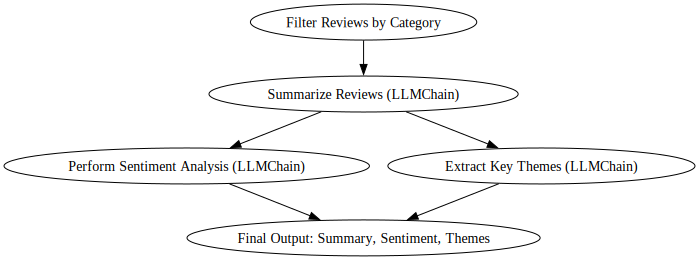

'Visualization_graphs\\flowchart_sequential_chain_example3.png'

In [34]:
from graphviz import Digraph

def visualize_nlp_pipeline():
    dot = Digraph("NLP_Pipeline")
    
    # Nodes
    dot.node("B", "Filter Reviews by Category")
    dot.node("D", "🔗 Summarize Reviews (LLMChain)")
    dot.node("E", "🔗 Perform Sentiment Analysis (LLMChain)")
    dot.node("F", "🔗 Extract Key Themes (LLMChain)")
    dot.node("G", "Final Output: Summary, Sentiment, Themes", shape="ellipse")
    
    # Edges
    dot.edge("B", "D")
    dot.edge("D", "E")
    dot.edge("D", "F")
    dot.edge("E", "G")
    dot.edge("F", "G")
    
    return dot

# Generate and display the graph
dot = visualize_nlp_pipeline()
display(dot)


# Ensure the output directory exists
output_dir = "Visualization_graphs"
os.makedirs(output_dir, exist_ok=True)

# Save and view the graph
dot.render(os.path.join(output_dir, "flowchart_sequential_chain_example3"), format="png", view=True)

**Explanation output** The flowchart represents a `SequentialChain workflow`in which each step flows into the next, making it a sequential execution pattern.

### Router Chain

Router chains in LangChain enable dynamic routing of inputs to different chains based on specific conditions. This is useful for orchestrating complex workflows where different inputs need to be processed by different chains. Here, examples of `two types of Router Chains` will be shown up:  
- **LLMRouterChain**: Routes inputs to different chains based on conditions specified in the prompt.
- **MultiPromptChain**: Routes inputs to different prompts and chains based on specified conditions.

#### LLMRouterChain Example
This example demonstrates how to use `LLMRouterChain` to dynamically route inputs to different chains based on specific conditions.

**Use Case**: When different inputs need to be processed by different chains based on specified conditions.

**How It Works**:
- The router chain uses a prompt to evaluate the input and determine the appropriate chain.
- The selected chain processes the input and returns the response.

- Example 1 (useful to get an insight also in the sentiment analysis)  
This example demonstrates how to use `LLMRouterChain` to summarize a selected review, determine the sentiment of summary, and write a polite and professional response based on the sentiment review.

In [35]:
# Import LangChain-related libraries
#from langchain_openai import ChatOpenAI
#from langchain.prompts import ChatPromptTemplate
#from langchain.chains import LLMChain

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# Extract key points
extract_chain = LLMChain(llm=llm, prompt=ChatPromptTemplate.from_template("Summarize this review: {review_body}"), output_key="summary")

# Sentiment Analysis
sentiment_chain = LLMChain(llm=llm, prompt=ChatPromptTemplate.from_template("Determine the sentiment of this text: {summary}"), output_key="sentiment")

# Generate a response
response_chain = LLMChain(llm=llm, prompt=ChatPromptTemplate.from_template("Write a polite and professional response to a {sentiment} review: {summary}"), output_key="output")

# Chain them together
review_assistant = SequentialChain(chains=[extract_chain, sentiment_chain, response_chain], input_variables=["review_body"], output_variables=["output"])

# Execute the chain with a selected review
review_text = df.iloc[11]['review_body']
print(review_assistant.invoke({"review_body": review_text}))


{
    'review_body': 'Purchases this for my husband and after 3 months it just stopped working will no longer turn 
on. Being trying to contact support for this item since it has 1 year warranty but it just seems impossible to heb 
ahold of someone for a replacement.',
    'output': "Dear [Reviewer],\n\nThank you for bringing this to our attention. We apologize for any inconvenience
you have experienced and we are sorry to hear that your husband's item has stopped working after only 3 months. 
\n\nWe take pride in the quality of our products and want to ensure that all of our customers are satisfied with 
their purchases. We appreciate your patience as we work to address this issue for you. \n\nPlease provide us with 
your contact information and the details of your purchase so that we can assist you with obtaining a replacement 
under the 1-year warranty. You can reach us at [customer support phone number] or [customer support email address].
\n\nThank you for your understanding and we look forward to resolving this matter for you 
promptly.\n\nSincerely,\n[Your Name]\nCustomer Support Team."
}

**Explanation output** The above output contains information both on the _customer's review of a product _ and the more appropiate response to that review_

-  Code to Save Snippet above code and Output as JPEG

In [36]:
import os
from PIL import Image, ImageDraw, ImageFont
import textwrap

# Step 0: Setup output folder
output_folder = "Processed Reviews"
os.makedirs(output_folder, exist_ok=True)

# Step 1: Define your code snippet and output text
code_snippet = """
# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# Extract key points
extract_chain = LLMChain(llm=llm, prompt=ChatPromptTemplate.from_template("Summarize this review: {review_body}"), output_key="summary")

# Sentiment Analysis
sentiment_chain = LLMChain(llm=llm, prompt=ChatPromptTemplate.from_template("Determine the sentiment of this text: {summary}"), output_key="sentiment")

# Generate a response
response_chain = LLMChain(llm=llm, prompt=ChatPromptTemplate.from_template("Write a polite and professional response to a {sentiment} review: {summary}"), output_key="output")

# Chain them together
review_assistant = SequentialChain(chains=[extract_chain, sentiment_chain, response_chain], input_variables=["review_body"], output_variables=["output"])

# Execute the chain with a selected review
review_text = df.iloc[11]['review_body']

print(review_assistant.invoke({"review_body": review_text}))
""".strip()

# Step 2: Use actual chain output and prepend verbose logs
# Ensure the 'review_assistant.invoke()' output is captured
review_output = review_assistant.invoke({"review_body": review_text})

verbose_log = "> Entering new SequentialChain chain...\n> Finished chain.\n"
response_output = f"{verbose_log}\n{review_output}"

# Step 3: Combine code and output
full_text = f"Code Snippet:\n\n{code_snippet}\n\nModel Output:\n\n{response_output}"

# Step 4: Wrap text for image display
wrapped_lines = []
for line in full_text.split("\n"):
    wrapped_lines.extend(textwrap.wrap(line, width=90) or [""])

# Step 5: Prepare image canvas
try:
    font = ImageFont.truetype("arial.ttf", 18)
except:
    font = ImageFont.load_default()

max_line_length = max(len(line) for line in wrapped_lines)
image_width = min(1600, max_line_length * 10)
image_height = len(wrapped_lines) * 28 + 20

image = Image.new("RGB", (image_width, image_height), color="white")
draw = ImageDraw.Draw(image)

y = 10
for line in wrapped_lines:
    draw.text((10, y), line, fill="black", font=font)
    y += 28

# Step 6: Save the image
image_path = os.path.join(output_folder, "code_and_output_routerchain.jpeg")
image.save(image_path)
print(f"✅ Saved code and output to: {image_path}")


✅ Saved code and output to: Processed Reviews\code_and_output_routerchain.jpeg

Below is a Python snippet to create the flowchart  in which the LLMRouterChain is inside the sentiment analysis.

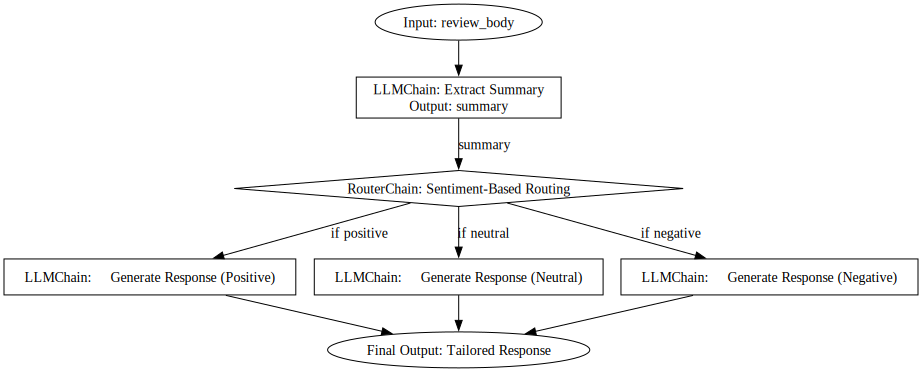

'Visualization_graphs\\flowchart_RouterChain_BW_SentimentRouting.png'

In [37]:
from graphviz import Digraph
import os

def visualize_router_chain_bw():
    dot = Digraph("ReviewAssistant_Router_BW")

    # Title
    #dot.attr(label="Review Assistant Pipeline with RouterChain (Sentiment Routing)", labelloc="top", fontsize="20")

    # Main nodes
    dot.node("A", "Input: review_body", shape="ellipse")
    dot.node("B", "🔗 LLMChain: Extract Summary\nOutput: summary", shape="box")

    # Router decision
    dot.node("C", "RouterChain: Sentiment-Based Routing", shape="diamond")

    # Branches
    dot.node("D1", "🔗 LLMChain: 😊 Generate Response (Positive)", shape="box")
    dot.node("D2", "🔗 LLMChain: 😐 Generate Response (Neutral)", shape="box")
    dot.node("D3", "🔗 LLMChain: 😞 Generate Response (Negative)", shape="box")

    # Output node
    dot.node("E", "Final Output: Tailored Response", shape="ellipse")

    # Edges
    dot.edge("A", "B")
    dot.edge("B", "C", label="summary")
    dot.edge("C", "D1", label="if positive")
    dot.edge("C", "D2", label="if neutral")
    dot.edge("C", "D3", label="if negative")

    dot.edge("D1", "E")
    dot.edge("D2", "E")
    dot.edge("D3", "E")

    return dot

# Generate and display the diagram
dot = visualize_router_chain_bw()
display(dot)

# Save the diagram
output_dir = "Visualization_graphs"
os.makedirs(output_dir, exist_ok=True)
dot.render(os.path.join(output_dir, "flowchart_RouterChain_BW_SentimentRouting"), format="png", view=True)


- Consider the SUPPORT option in the sentimental analysis

Inspect only the second item in the dataset and print the processed response directly in the output, 

In [38]:
import os
import pandas as pd
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

# Load dataset
#file_path = "Resized_Amazon_Reviews_Multi_Dataset.csv"
#df = pd.read_csv(file_path)


# Set the model variable based on the current date
llm_model = "gpt-3.5-turbo" #if current_date > target_date else "gpt-3.5-turbo-0301"

# Define different prompts
positive_template = """Generate a friendly thank-you response to this review: {input}"""
negative_template = """Generate a polite apology and offer assistance for this review: {input}"""
support_template = """Provide steps to resolve this customer support issue: {input}"""

prompt_infos = [
    {"name": "positive", "description": "Good for generating a friendly thank-you response", "prompt_template": positive_template},
    {"name": "negative", "description": "Good for generating a polite apology and offer assistance", "prompt_template": negative_template},
    {"name": "support", "description": "Good for providing steps to resolve customer support issue", "prompt_template": support_template}
]

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# Function to classify review sentiment
def classify_review(review):
    review_lower = review.lower()
    if any(word in review_lower for word in ["refund", "bad", "disappointed", "poor", "terrible"]):
        return "negative"
    elif any(word in review_lower for word in ["love", "great", "excellent", "amazing", "fantastic", "awesome"]):
        return "positive"
    else:
        return "support"

# Ensure there's a second item in the dataset
if len(df) < 2:
    raise ValueError("Dataset does not contain at least two items.")

# Select only the second item
df = df.iloc[[1]].copy()

df["Sentiment"] = df["review_body"].apply(classify_review)

# Initialize an empty dictionary to store destination chains
destination_chains = {}

for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain  

destinations = [p['name'] for p in prompt_infos]
destinations_str = "\n".join(destinations)

default_prompt = ChatPromptTemplate.from_template("{review_body}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)  

MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
json
{{{{
    "destination": "{{destination}}", 
    "next_inputs": "{{input}}"
}}}}

<< CANDIDATE PROMPTS >>
{destinations_str}

<< INPUT >>
{{input}}

<< OUTPUT >>
"""

router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(destinations_str=destinations_str)
router_prompt = PromptTemplate(template=router_template, input_variables=["input", "destination"], output_parser=RouterOutputParser())
router_chain = LLMRouterChain.from_llm(llm, router_prompt)  

chain = MultiPromptChain(router_chain=router_chain, destination_chains=destination_chains, default_chain=default_chain, verbose=True)

# Process and print the second review directly
row = df.iloc[0]
input_text = row["review_body"]
sentiment = row["Sentiment"]
response = chain.invoke({"input": input_text, "destination": sentiment.strip()})
print("Processed Review:")
print("Review:", input_text)
print("Sentiment:", sentiment)
print("Generated Response:", response)


C:\Users\Michela\AppData\Local\Temp\ipykernel_1448\3865280721.py:91: LangChainDeprecationWarning: Please see migration guide here for recommended implementation: https://python.langchain.com/docs/versions/migrating_chains/multi_prompt_chain/
  chain = MultiPromptChain(router_chain=router_chain, destination_chains=destination_chains, default_chain=default_chain, verbose=True)




> Entering new MultiPromptChain chain...
support: {'input': 'Nach nicht mal 30 Sekunden hat mein Hund diese umgeschmissen und das Futter lag überall verstreut. Kann es persönlich nicht empfehlen.'}
> Finished chain.


Processed Review:

Review: Nach nicht mal 30 Sekunden hat mein Hund diese umgeschmissen und das Futter lag überall verstreut. Kann es 
persönlich nicht empfehlen.

Sentiment: support

Generated Response:
{
    'input': 'Nach nicht mal 30 Sekunden hat mein Hund diese umgeschmissen und das Futter lag überall verstreut. 
Kann es persönlich nicht empfehlen.',
    'destination': 'support',
    'text': "1. Apologize for the inconvenience caused by the product being easily knocked over by the customer's 
dog.\n2. Explain that customer satisfaction is a priority and assure them that you will do everything possible to 
address the issue.\n3. Offer a replacement product or a refund for the inconvenience caused by the spilled 
food.\n4. Provide tips or suggestions on how to prevent the product from being knocked over in the future, such as 
placing it in a more secure location or using a weighted base.\n5. Thank the customer for bringing the issue to 
your attention and encourage them to reach out if they have any further concerns or questions."
}

**Explanation output** The output demonstrates the use of a _MultiPromptChain to handle a customer review_. The input review describes the contents of the review. The processed review is further analyzed for sentiment and categorized as `support.` A generated response is provided, which includes steps to acknowledge the issue, request additional details, offer a solution, provide preventive tips, and thank the customer for their feedback.

- Example 2 Consider all the items of the dataset 

In [39]:
#import datetime
#import pandas as pd
#import os
from langdetect import detect
#from langchain.chains.router import MultiPromptChain
#from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
#from langchain.prompts import PromptTemplate
#from langchain_openai import ChatOpenAI
#from langchain.prompts import ChatPromptTemplate
#from langchain.chains import LLMChain
#from deep_translator import GoogleTranslator
# Load dataset
file_path = "Resized_Amazon_Reviews_Multi_Dataset.csv"
df = pd.read_csv(file_path)


# Set the model variable based on the current date
llm_model = "gpt-3.5-turbo" 

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Define different prompts
positive_template = """Generate a friendly thank-you response in the same language as this review: {input}"""
negative_template = """Generate a polite apology and offer assistance in the same language as this review: {input}"""
support_template = """Provide steps to resolve this customer support issue in the same language as this review: {input}"""

prompt_infos = [
    {"name": "positive", "description": "Good for generating a friendly thank-you response", "prompt_template": positive_template},
    {"name": "negative", "description": "Good for generating a polite apology and offer assistance", "prompt_template": negative_template},
    {"name": "support", "description": "Good for providing steps to resolve customer support issue", "prompt_template": support_template}
]

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# Function to classify review sentiment
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

# Define GPT-based classification prompt
classification_prompt = ChatPromptTemplate.from_template(
    """Classify the following customer review into one of three categories:
- positive (if it's a satisfied or happy review)
- negative (if it's a complaint or bad experience)
- support (if it looks like a question or a support request)

Review:
{review}

Respond with ONLY ONE WORD (positive, negative, or support)."""
)

# Chain to perform the classification
classification_chain = LLMChain(llm=llm, prompt=classification_prompt)

# Function that uses GPT to classify the review
def classify_review(review):
    try:
        result = classification_chain.run(review=review).strip().lower()
        if result in ["positive", "negative", "support"]:
            return result
        else:
            return "support"  # fallback category
    except Exception:
        return "support"


# Process dataset
df["Sentiment"] = df["review_body"].apply(classify_review)
df["Language"] = df["review_body"].apply(detect_language)

# Save the updated dataset
updated_file_path = "Updated_Data_New_Final_Classified.csv"
df.to_csv(updated_file_path, index=False)
print(f"Updated dataset saved to {updated_file_path}")

# Initialize an empty dictionary to store destination chains
destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain

destinations = [p['name'] for p in prompt_infos]  # Ensure only names are used
destinations_str = "\n".join(destinations)

default_prompt = ChatPromptTemplate.from_template("{review_body}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": "{{destination}}", 
    "next_inputs": "{{input}}"
}}}}
```

REMEMBER: The value of "destination" MUST match one of \
the candidate prompts listed below.\
If "destination" does not fit any of the specified prompts, set it to "DEFAULT."
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations_str}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(destinations_str=destinations_str)
router_prompt = PromptTemplate(template=router_template, input_variables=["input", "destination"], output_parser=RouterOutputParser())
router_chain = LLMRouterChain.from_llm(llm, router_prompt)

chain = MultiPromptChain(router_chain=router_chain, destination_chains=destination_chains, default_chain=default_chain, verbose=True)

def process_reviews(df):
    responses = []
    for _, row in df.iterrows():
        input_text = row["review_body"]
        sentiment = row["Sentiment"]
        language = row["Language"]
        response = chain.invoke({"input": input_text, "destination": sentiment, "language": language})
        responses.append(response)
    
    df["Response"] = responses
    folder_name = "Processed Reviews"
    os.makedirs(folder_name, exist_ok=True)
    csv_file_path = os.path.join(folder_name, "Updated_Data_New_Final_Processed.csv")
    html_file_path = os.path.join(folder_name, "Updated_Data_New_Final_Processed.html")
    df.to_csv(csv_file_path, index=False)
    df.to_html(html_file_path, index=False)
    print(f"Processed dataset saved in '{folder_name}' folder:\n📄 CSV: {csv_file_path}\n🌐 HTML: {html_file_path}")

process_reviews(df)


Updated dataset saved to Updated_Data_New_Final_Classified.csv



> Entering new MultiPromptChain chain...
negative: {'input': 'Gerät kam defekt an. Der Display zeigte zwar an, dass die Programme laufen, jedoch bewegte sich die Antriebswelle nicht.'}
> Finished chain.


> Entering new MultiPromptChain chain...
negative: {'input': 'Nach nicht mal 30 Sekunden hat mein Hund diese umgeschmissen und das Futter lag überall verstreut. Kann es persönlich nicht empfehlen.'}
> Finished chain.


> Entering new MultiPromptChain chain...
negative: {'input': "Für sandwiches, burger Patty's ist er ganz OK aber steaks, Händchen oder Würstchen finde ich es nicht gut. Vom Gerät selber her sieht er gut aus und ist platzsparend."}
> Finished chain.


> Entering new MultiPromptChain chain...
negative: {'input': 'Innensohle löste sich nach ca.4 Wochen auf, Klettverschluss ebenfalls abgenutzt und geht kaputt.Diese Schuhe sind nicht zu empfehlen, billige Qualität.'}
> Finished chain.


> Entering new MultiPromptChain chain...
negative: {'input': 'Der Akku ist halt ein Ori

Processed dataset saved in 'Processed Reviews' folder:
📄 CSV: Processed Reviews\Updated_Data_New_Final_Processed.csv
🌐 HTML: Processed Reviews\Updated_Data_New_Final_Processed.html

- An improved version of the above snippet code, it could be to have the response to the reviewer in its original language and also translate this in English. 

In [40]:
#import datetime
#import pandas as pd
#import os
from langdetect import detect
#from langchain.chains.router import MultiPromptChain
#from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
#from langchain.prompts import PromptTemplate
#from langchain_openai import ChatOpenAI
#from langchain.prompts import ChatPromptTemplate
#from langchain.chains import LLMChain

# Load dataset
file_path = "Resized_Amazon_Reviews_Multi_Dataset.csv"
df = pd.read_csv(file_path)


# Set the model variable based on the current date
llm_model = "gpt-3.5-turbo" 

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Define different prompts
positive_template = """Generate a friendly thank-you response in the same language as this review and also provide an English translation:

Original Language: {input}

English Translation: """

negative_template = """Generate a polite apology and offer assistance in the same language as this review and also provide an English translation:

Original Language: {input}

English Translation: """

support_template = """Provide steps to resolve this customer support issue in the same language as this review and also provide an English translation:

Original Language: {input}

English Translation: """

prompt_infos = [
    {"name": "positive", "description": "Good for generating a friendly thank-you response", "prompt_template": positive_template},
    {"name": "negative", "description": "Good for generating a polite apology and offer assistance", "prompt_template": negative_template},
    {"name": "support", "description": "Good for providing steps to resolve customer support issue", "prompt_template": support_template}
]

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# Function to classify review sentiment
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

# Define GPT-based classification prompt
classification_prompt = ChatPromptTemplate.from_template(
    """Classify the following customer review into one of three categories:
- positive (if it's a satisfied or happy review)
- negative (if it's a complaint or bad experience)
- support (if it looks like a question or a support request)

Review:
{review}

Respond with ONLY ONE WORD (positive, negative, or support)."""
)

# Chain to perform the classification
classification_chain = LLMChain(llm=llm, prompt=classification_prompt)

# Function that uses GPT to classify the review
def classify_review(review):
    try:
        result = classification_chain.run(review=review).strip().lower()
        if result in ["positive", "negative", "support"]:
            return result
        else:
            return "support"  # fallback category
    except Exception:
        return "support"


# Process dataset
df["Sentiment"] = df["review_body"].apply(classify_review)
df["Language"] = df["review_body"].apply(detect_language)

# Save the updated dataset
updated_file_path = "Updated_Data_New_Final_Classified_V2.csv"
df.to_csv(updated_file_path, index=False)
print(f"Updated dataset saved to {updated_file_path}")

# Initialize an empty dictionary to store destination chains
destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain

destinations = [p['name'] for p in prompt_infos]  # Ensure only names are used
destinations_str = "\n".join(destinations)

default_prompt = ChatPromptTemplate.from_template("{review_body}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": "{{destination}}", 
    "next_inputs": "{{input}}"
}}}}
```

REMEMBER: The value of "destination" MUST match one of \
the candidate prompts listed below.\
If "destination" does not fit any of the specified prompts, set it to "DEFAULT."
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations_str}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(destinations_str=destinations_str)
router_prompt = PromptTemplate(template=router_template, input_variables=["input", "destination"], output_parser=RouterOutputParser())
router_chain = LLMRouterChain.from_llm(llm, router_prompt)

chain = MultiPromptChain(router_chain=router_chain, destination_chains=destination_chains, default_chain=default_chain, verbose=True)

def process_reviews(df):
    responses = []
    for _, row in df.iterrows():
        input_text = row["review_body"]
        sentiment = row["Sentiment"]
        language = row["Language"]
        response = chain.invoke({"input": input_text, "destination": sentiment, "language": language})
        responses.append(response)
    
    df["Response"] = responses
    folder_name = "Processed Reviews"
    os.makedirs(folder_name, exist_ok=True)
    csv_file_path = os.path.join(folder_name, "Updated_Data_New_Final_Processed_v2.csv")
    html_file_path = os.path.join(folder_name, "Updated_Data_New_Final_Processed_v2.html")
    df.to_csv(csv_file_path, index=False)
    df.to_html(html_file_path, index=False)
    print(f"Processed dataset saved in '{folder_name}' folder:\n📄 CSV: {csv_file_path}\n🌐 HTML: {html_file_path}")

process_reviews(df)


Updated dataset saved to Updated_Data_New_Final_Classified_V2.csv



> Entering new MultiPromptChain chain...
negative: {'input': 'Gerät kam defekt an. Der Display zeigte zwar an, dass die Programme laufen, jedoch bewegte sich die Antriebswelle nicht.'}
> Finished chain.


> Entering new MultiPromptChain chain...
negative: {'input': 'Nach nicht mal 30 Sekunden hat mein Hund diese umgeschmissen und das Futter lag überall verstreut. Kann es persönlich nicht empfehlen.'}
> Finished chain.


> Entering new MultiPromptChain chain...
negative: {'input': "Für sandwiches, burger Patty's ist er ganz OK aber steaks, Händchen oder Würstchen finde ich es nicht gut. Vom Gerät selber her sieht er gut aus und ist platzsparend."}
> Finished chain.


> Entering new MultiPromptChain chain...
negative: {'input': 'Innensohle löste sich nach ca.4 Wochen auf, Klettverschluss ebenfalls abgenutzt und geht kaputt.Diese Schuhe sind nicht zu empfehlen, billige Qualität.'}
> Finished chain.


> Entering new MultiPromptChain chain...
negative: {'input': 'Der Akku ist halt ein Ori

Processed dataset saved in 'Processed Reviews' folder:
📄 CSV: Processed Reviews\Updated_Data_New_Final_Processed_v2.csv
🌐 HTML: Processed Reviews\Updated_Data_New_Final_Processed_v2.html

**Explanation output** As it can been seen from the output, the response of each review is given in the original language and in English. 

So far, we have demonstrated a sequential process for handling reviews, involving multiple steps such as translation, summarization, and response generation. This mimics the behavior of an intelligent agent that performs tasks and makes decisions based on input. The current workflow processes reviews sequentially, similar to an agent, using a series of transformations (translation, summarization, language detection, response generation) and the SequentialChain to invoke each step in order. This resembles task delegation by an agent.

However, these workflows lack the dynamic decision-making and tool invocation characteristic of a full LangChain agent. While the workflows can be seen as agents in a traditional sense, they do not align with LangChain's definition of an "agent" that includes tools and decision-making capabilities.

`In LangChain, an agent` typically:
- Receives an input or query.
- Uses tools (like APIs or custom functions) to perform various tasks.
- Makes decisions about which tools to use and in what sequence based on logic or a language model.

Traditional `LangChain agents` incorporate `decision-making`, where the agent decides which tools to invoke based on conditions. For example, an agent might use one tool for translation if the text is not in English, or another for summarization. The current workflows execute in a fixed order without decision-making logic. LangChain agents can `dynamically invoke different tools` based on context (e.g., calling a tool for translation only if the text is not in English). The current workflows lack such dynamic tool invocation and are linear pipelines.

To sum up, `while the current code processes reviews sequentially, it lacks the dynamic decision-making and tool invocation of a full LangChain agent`. By adding dynamic tool invocation and decision-making, we can structure it as an agent. To make the workflow more agent-like in the LangChain sense, we could:

- Use initialize_agent to define specific tools (e.g., review fetching, language detection).
- Allow the agent to choose which steps to perform based on input (e.g., decide whether to translate based on detected language).
- Handle multiple tools dynamically by having the agent assess the input and decide on actions.

For example, we could create an agent that decides whether to invoke the translation step or skip it if the review is already in English.

- Example 1  
Here’s a basic modification of how we could structure this using LangChain’s agent pattern:

In [41]:
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool

# Define a tool for translating reviews
def translate_review(review):
    # Your translation logic here
    translated_review = "Translated review text"  # Placeholder for actual translation logic
    return translated_review

# Define a tool for summarizing reviews
def summarize_review(review):
    # Your summarization logic here
    summary = "Summary of the review"  # Placeholder for actual summarization logic
    return summary

# Define a tool for detecting language
def detect_language(review):
    # Your language detection logic here
    detected_language = "Detected language"  # Placeholder for actual language detection logic
    return detected_language

# Initialize the tools
tools = [
    Tool(name="Translate", func=translate_review, description="Translate review to English"),
    Tool(name="Summarize", func=summarize_review, description="Summarize the review"),
    Tool(name="Detect Language", func=detect_language, description="Detect the language of the review")
]

# Initialize the agent
llm = ChatOpenAI(temperature=0.9, model=llm_model)
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,  # Can dynamically choose tools based on the input
    verbose=True
)

# Example usage with the agent
# Example review data
review_data = {
    "review_body": df.iloc[32]['review_body']
}

response = agent.invoke(f"Process the review: {review_data}")
print(response)

C:\Users\Michela\AppData\Local\Temp\ipykernel_1448\2900978433.py:31: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = initialize_agent(




> Entering new AgentExecutor chain...
I need to understand the language of the review first to process it correctly.
Action: Detect Language
Action Input: Je n'ai reçu qu'une tasse de voyage alors que le descriptif disait que j'en recevais deux. Je suis donc déçue.
Observation: Detected language
Thought:I should now translate the review to English to fully understand it.
Action: Translate
Action Input: Je n'ai reçu qu'une tasse de voyage alors que le descriptif disait que j'en recevais deux. Je suis donc déçue.
Observation: Translated review text
Thought:I should summarize the translated review to capture the main point.
Action: Summarize
Action Input: I only received one travel mug while the description said I would receive two. I am disappointed.
Observation: Summary of the review
Thought:The customer is disappointed because they only received one travel mug instead of the two that were described.
Final Answer: The customer received only one travel mug instead of the two described 

{
    'input': 'Process the review: {\'review_body\': "Je n\'ai reçu qu\'une tasse de voyage alors que le descriptif 
disait que j\'en recevais deux. Je suis donc déçue."}',
    'output': 'The customer received only one travel mug instead of the two described and is disappointed.'
}

**Explanation output** In this case, `adding dynamic tool invocation the agent can make decisions dynamically on which tool to use based on the input`, such as skipping translation if the review is already in English or detecting the language before performing a translation.

-  Code to Save Snippet above code and Output as JPEG

In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont
import textwrap
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool
from langchain.chat_models import ChatOpenAI

# Step 0: Setup output folder
output_folder = "Processed Reviews"
os.makedirs(output_folder, exist_ok=True)

# Step 1: Define your agent and tools logic as a string
code_snippet = """
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool
from langchain.chat_models import ChatOpenAI

# Define a tool for translating reviews
def translate_review(review):
    translated_review = "Translated review text"  # Placeholder for actual translation logic
    return translated_review

# Define a tool for summarizing reviews
def summarize_review(review):
    summary = "Summary of the review"  # Placeholder for actual summarization logic
    return summary

# Define a tool for detecting language
def detect_language(review):
    detected_language = "Detected language"  # Placeholder for actual language detection logic
    return detected_language

# Initialize the tools
tools = [
    Tool(name="Translate", func=translate_review, description="Translate review to English"),
    Tool(name="Summarize", func=summarize_review, description="Summarize the review"),
    Tool(name="Detect Language", func=detect_language, description="Detect the language of the review")
]

# Initialize the agent
llm = ChatOpenAI(temperature=0.9, model=llm_model)
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Example usage with the agent
review_data = {
    "review_body": df.iloc[32]['review_body']
}

response = agent.invoke(f"Process the review: {review_data}")
print(response)
""".strip()

# Step 2: Real verbose agent logs
verbose_log = """
> Entering new AgentExecutor chain...
You need to first determine the language of the review before proceeding with any other action. 
Action: Detect Language
Action Input: "Je n'ai reçu qu'une tasse de voyage alors que le descriptif disait que j'en recevais deux. Je suis donc déçue."
Observation: Detected language
Thought: Now that I know the language of the review is French, I should translate it to English to understand its content.
Action: Translate
Action Input: "Je n'ai reçu qu'une tasse de voyage alors que le descriptif disait que j'en recevais deux. Je suis donc déçue."
Observation: Translated review text
Thought: I have now translated the review to English, I should summarize it to get the main points.
Action: Summarize
Action Input: Translated review text
Observation: Summary of the review
Thought: I have processed the review and now have a summarized understanding of it.
Final Answer: The customer received only one travel cup instead of the two promised in the description and is disappointed.
> Finished chain.
""".strip()

# Step 3: Real response object
response_output = {
    'input': 'Process the review: {\'review_body\': "Je n\'ai reçu qu\'une tasse de voyage alors que le descriptif disait que j\'en recevais deux. Je suis donc déçue."}',
    'output': 'The customer received only one travel cup instead of the two promised in the description and is disappointed.'
}

# Step 4: Combine code and output
full_text = f"Code Snippet:\n\n{code_snippet}\n\nAgent Logs:\n\n{verbose_log}\n\nResponse:\n\n{response_output}"

# Step 5: Wrap text for rendering
wrapped_lines = []
for line in full_text.split("\n"):
    wrapped_lines.extend(textwrap.wrap(line, width=90) or [""])

# Step 6: Create image canvas
try:
    font = ImageFont.truetype("arial.ttf", 18)
except:
    font = ImageFont.load_default()

max_line_length = max(len(line) for line in wrapped_lines)
image_width = min(1600, max_line_length * 10)
image_height = len(wrapped_lines) * 28 + 20

image = Image.new("RGB", (image_width, image_height), color="white")
draw = ImageDraw.Draw(image)

y = 10
for line in wrapped_lines:
    draw.text((10, y), line, fill="black", font=font)
    y += 28

# Step 7: Save image
image_path = os.path.join(output_folder, "agent_code_real_response.jpeg")
image.save(image_path)
print(f"✅ Saved agent code and real response to: {image_path}")


 To make the above workflow more like an agent in the LangChain sense, we could:  
- Use initialize_agent to define specific tools (e.g., review fetching, language detection, etc.).  
- Allow the agent to choose which steps to perform based on the input (for instance, decide whether to translate based on the detected language).  
- Handle multiple tools dynamically by having the agent assess the input and decide what actions to take.  

- Example 2  

In [42]:
from langchain.prompts import ChatPromptTemplate

# Define a prompt template to detect whether translation is needed and proceed accordingly
review_processing_prompt = ChatPromptTemplate.from_template(
    """
    You are a multi-tasking assistant. Here is a review from a customer:

    {Review}

    Tasks:
    1. First, detect the language of the review. If the review is not in English, translate it to English.
    2. Summarize the review in one sentence.
    3. After summarizing, generate a follow-up message in the detected language of the original review, or in English if the review is in English.

    Provide the following outputs:
    - Language: Detected language of the review.
    - Translated Review: If translation is needed, provide the translated review.
    - Summary: One-sentence summary of the review.
    - Follow-up Message: A brief, polite, and appropriate follow-up message based on the summary.

    Start processing the review.
    """
)

# Example usage of the template
from langchain.chains import LLMChain
from langchain.chat_models import ChatOpenAI

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo")  # You can specify your own model like "gpt-3.5-turbo"

# Create a chain with the prompt template
chain = LLMChain(llm=llm, prompt=review_processing_prompt)


# Example review data
input_review = {
    "review_body": df.iloc[32]['review_body']
}


# Execute the chain to process the review
result = chain.invoke({"Review": input_review})

# Print the result
print(result)

{
    'Review': {
        'review_body': "Je n'ai reçu qu'une tasse de voyage alors que le descriptif disait que j'en recevais deux. 
Je suis donc déçue."
    },
    'text': 'Language: French\n\nTranslated Review: I only received one travel mug when the description said I 
would receive two. I am disappointed.\n\nSummary: Customer received only one travel mug instead of the expected 
two, leading to disappointment.\n\nFollow-up Message: We apologize for the oversight in sending only one travel mug
instead of the two you were expecting. Please let us know how we can rectify this issue for you.'
}

**Explanation output** The output is a processed customer review, which includes the original review (in French), where the customer expresses, a translated version of the review in English, a summary indicating the issue of receiving fewer items than described and finally a follow-up message apologizing for the error and promising to send the missing travel mug promptly.

- Example 3    
Here’s another example of a basic modification of how we could create an agent that dynamically decides whether to invoke the translation step or skip it if the review is already in English.

In [43]:
import openai
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator

# Load dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Check if required columns exist
required_columns = {"product_category", "review_body"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Define system prompt
SYSTEM_PROMPT = """
You are an AI assistant specialized in customer review analysis.
Your tasks include:
1. Detecting the language of the review and translating it to English if needed.
2. Summarizing the review in one sentence.
3. Generating a polite follow-up message in the original language or English if already in English.
"""

# Define the Agent class
class Agent:
    def __init__(self, system=SYSTEM_PROMPT):
        self.client = openai.OpenAI()
        self.system = system
        self.messages = []
        if self.system:
            self.messages.append({"role": "system", "content": system})

    def __call__(self, message):
        self.messages.append({"role": "user", "content": message})
        while self.get_token_count() > 16385:
            self.messages.pop(1)  # Remove oldest message to stay within token limit
        return self.execute()

    def get_token_count(self):
        return sum(len(message["content"].split()) for message in self.messages)

    def execute(self):
        completion = self.client.chat.completions.create(
            model="gpt-3.5-turbo",
            temperature=0,
            messages=self.messages
        )
        return completion.choices[0].message.content.strip()

# Function to process a review
def process_review(review, agent, translator):
    if not review or pd.isna(review):
        return {"Language": None, "Translated Review": None, "Summary": None, "Follow-up Message": None}

    detected_language = detect(review)
    translated_review = review if detected_language == "en" else translator.translate(review)

    # Summarize the review
    summary_prompt = f"Summarize the following review in one sentence:\nReview: \"{translated_review}\"\nSummary:"
    summary = agent(summary_prompt)

    # Generate a follow-up message in English first
    follow_up_prompt = f"Generate a brief, polite follow-up message for this review:\nReview: \"{translated_review}\"\nFollow-up Message:"
    follow_up_message = agent(follow_up_prompt)

    # If the review was in a different language, translate the follow-up message back
    if detected_language != "en":
        follow_up_message = translator.translate(follow_up_message, source="en", target=detected_language)

    return {
        "Language": detected_language,
        "Translated Review": translated_review if detected_language != "en" else "",
        "Summary": summary,
        "Follow-up Message": follow_up_message
    }

# Retrieve and process reviews
def process_reviews(df, agent, top_n=3):
    product_reviews = {}
    translator = GoogleTranslator(source="auto", target="en")  # Initialize once

    for product_name in df["product_category"].dropna().unique():
        reviews = df[df["product_category"] == product_name].head(top_n)["review_body"].dropna().tolist()
        if reviews:
            print(f"Processing {len(reviews)} reviews for product category: {product_name}")
            product_reviews[product_name] = [process_review(review, agent, translator) for review in reviews]

    return product_reviews

# Initialize the agent
abot = Agent()

# Process the reviews
processed_reviews = process_reviews(df, abot)
print(processed_reviews)

Processing 3 reviews for product category: kitchen

Processing 3 reviews for product category: pet_products

Processing 3 reviews for product category: shoes

Processing 3 reviews for product category: home_improvement

Processing 2 reviews for product category: jewelry

Processing 3 reviews for product category: industrial_supplies

Processing 2 reviews for product category: pc

Processing 1 reviews for product category: home

Processing 2 reviews for product category: other

Processing 2 reviews for product category: lawn_and_garden

Processing 3 reviews for product category: sports

{
    'kitchen': [
        {
            'Language': 'de',
            'Translated Review': 'Device arrived defective. The display indicated that the programs were running, 
but the drive shaft did not move.',
            'Summary': 'The device arrived defective with the display showing programs running but the drive shaft 
not moving.',
            'Follow-up Message': 'Summary: The device arrived defective with the display showing programs running 
but the drive shaft not moving.\n\nFollow-up Message: We apologize for the inconvenience caused by the defective 
device you received and would like to assist you in resolving this issue promptly.'
        },
        {
            'Language': 'de',
            'Translated Review': "For sandwiches, Burger Patty's he is very ok, but I don't like steaks, hands or 
sausages. It looks good from the device itself and is space -saving.",
            'Summary': "Summary: The reviewer finds the burger patties satisfactory for sandwiches but is not 
pleased with steaks, hands, or sausages, appreciating the device's appearance and space-saving design.",
            'Follow-up Message': "Follow-up Message: Thank you for sharing your feedback on the device's 
performance with different food items, we appreciate your insights."
        },
        {
            'Language': 'es',
            'Translated Review': "It is very well achieved, but has unpainted parts. On the other hand, the fact 
that I cannot put it in the microwave (the label says), made to me back. It is pretty, if it weren't for that 
reason I would return it. Recommended, halfway.",
            'Summary': 'The product is well-made but has unpainted parts, and the inability to microwave it was a 
drawback, otherwise recommended with reservations.',
            'Follow-up Message': 'Summary: The product is well-made but has unpainted parts and cannot be used in 
the microwave, which is disappointing, making it recommended only halfway.\n\nFollow-up Message: Thank you for 
sharing your feedback on the product. We appreciate your insights and will take them into consideration for future 
improvements.'
        }
    ],
    'pet_products': [
        {
            'Language': 'de',
            'Translated Review': "After less than 30 seconds, my dog \u200b\u200bthrew them around and the feed was
scattered everywhere. Can't recommend it personally.",
            'Summary': 'Summary: The dog toys were quickly destroyed by the dog, leading to scattered feed and a 
non-recommendation.',
            'Follow-up Message': 'Summary: The product was quickly destroyed by the dog, leading to feed 
scattering, resulting in a non-recommendation.\n\nFollow-up Message: We appreciate your feedback and apologize for 
the inconvenience caused by the product not meeting your expectations due to its durability. If you have any 
further concerns or need assistance, please feel free to reach out to us.'
        },
        {
            'Language': 'de',
            'Translated Review': 'Is not so good because the feces sticks to the butt',
            'Summary': 'The product is not satisfactory as feces sticks to it.',
            'Follow-up Message': 'Summary: The product is not effective as feces stick to the surface.\n\nFollow-up
Message: Thank you for sharing your experience. We apologize for any inconvenience caused and will take your 
feedback into consideration for future improvements.'
        },
        {
            'Language': 'de',
            'Translated Review': 'to have tasted. :)',
            'Summary': 'This review seems to be incomplete or unclear to provide a summary.',
            'Follow-up Message': 'It seems like the review is incomplete or missing context, making it difficult to
summarize accurately. If you have more details or specific feedback to share, please feel free to provide them.'
        }
    ],
    'shoes': [
        {
            'Language': 'de',
            'Translated Review': 'Inside sole dissolved after about 4 wee

**Explanation output** The output diplays all the reviews for each category product. It includes the language of the review, a translated version of the review in English, a summary indicating the issue of receiving fewer items than described and finally a follow-up message apologizing for the error and promising a solution in order that the issue not will happen in the near future. 

- Considering `all the customer feedbacks for all the product categories enclosed in the given dataset`. The above output shows that we can still improve the responses to the reviewers, given them a response in the original languane. This can done, modifying the SYSTEM PROMPT 

In [44]:
import openai
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator

# Load dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Check if required columns exist
required_columns = {"product_category", "review_body"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Define response templates
positive_template = """Generate a friendly thank-you response to this review: {input}"""
negative_template = """Generate a polite apology and offer assistance for this review: {input}"""
support_template = """Provide steps to resolve this customer support issue: {input}"""

# Define system prompt
SYSTEM_PROMPT = """
You are an AI assistant specialized in customer review analysis.
Your tasks include:
1. Detecting the language of the review and translating it to English if needed.
2. Summarizing the review in one sentence.
3. Generating a polite follow-up message in the original language or English if already in English.
"""

# Define the Agent class
class Agent:
    def __init__(self, system=SYSTEM_PROMPT):
        self.client = openai.Client()
        self.system = system
        self.messages = []
        if self.system:
            self.messages.append({"role": "system", "content": system})

    def __call__(self, message):
        self.messages.append({"role": "user", "content": message})
        result = self.execute()
        self.messages.append({"role": "assistant", "content": result})
        return result

    def execute(self):
        completion = self.client.chat.completions.create(
            model="gpt-3.5-turbo",
            temperature=0,
            messages=self.messages
        )
        return completion.choices[0].message.content.strip()

# Function to process a review
def process_review(review, agent):
    detected_language = detect(review)
    translated_review = review if detected_language == "en" else GoogleTranslator(source='auto', target='en').translate(review)
    
    # Summarize the review
    summary_prompt = f"""
    Summarize the following review in one sentence:
    Review: "{translated_review}"
    Summary:
    """
    summary = agent(summary_prompt)
    
    # Generate a follow-up message in the original language
    follow_up_prompt = f"""
    Generate a brief, polite follow-up message in the original language or English if already in English for this review:
    Review: "{review}"
    Follow-up Message:
    """
    follow_up_message = agent(follow_up_prompt)
    
    return {
        "Language": detected_language,
        "Translated Review": translated_review if detected_language != "en" else "",
        "Summary": summary,
        "Follow-up Message": follow_up_message
    }

# Retrieve and process reviews
def process_reviews(df, agent, top_n=3):
    product_reviews = {}
    for product_name in df["product_category"].dropna().unique():
        reviews = df[df["product_category"].str.contains(str(product_name), case=False, na=False)].head(top_n)["review_body"].dropna().tolist()
        if reviews:
            product_reviews[product_name] = [process_review(review, agent) for review in reviews]
    return product_reviews

# Initialize the agent
abot = Agent(SYSTEM_PROMPT)

# Process the reviews
processed_reviews = process_reviews(df, abot)
print(processed_reviews)

{
    'kitchen': [
        {
            'Language': 'de',
            'Translated Review': 'Device arrived defective. The display indicated that the programs were running, 
but the drive shaft did not move.',
            'Summary': 'The device arrived defective with the display showing programs running but the drive shaft 
not moving.',
            'Follow-up Message': 'We are sorry to hear about the issue with your device. Please contact our 
customer support for assistance in resolving this matter.'
        },
        {
            'Language': 'de',
            'Translated Review': "For sandwiches, Burger Patty's he is very ok, but I don't like steaks, hands or 
sausages. It looks good from the device itself and is space -saving.",
            'Summary': 'The device is suitable for making burger patties but not preferred for steaks, hands, or 
sausages, with a compact and visually appealing design.',
            'Follow-up Message': 'Thank you for sharing your feedback with us. We appreciate your comments and will
take them into consideration for future improvements.'
        },
        {
            'Language': 'es',
            'Translated Review': "It is very well achieved, but has unpainted parts. On the other hand, the fact 
that I cannot put it in the microwave (the label says), made to me back. It is pretty, if it weren't for that 
reason I would return it. Recommended, halfway.",
            'Summary': 'The product is well-made but has unpainted parts, and the inability to microwave it was a 
drawback, otherwise recommended with some reservations.',
            'Follow-up Message': "Thank you for your detailed feedback. We apologize for any inconvenience caused 
by the product's limitations and appreciate your recommendation with reservations. If you need further assistance, 
please feel free to reach out to us."
        }
    ],
    'pet_products': [
        {
            'Language': 'de',
            'Translated Review': "After less than 30 seconds, my dog \u200b\u200bthrew them around and the feed was
scattered everywhere. Can't recommend it personally.",
            'Summary': 'The dog toys were quickly destroyed by the dog, causing the food to scatter, leading to a 
personal recommendation against them.',
            'Follow-up Message': 'Thank you for sharing your experience with us. We apologize for any inconvenience
caused and appreciate your feedback. If you have any further concerns or need assistance, please let us know.'
        },
        {
            'Language': 'de',
            'Translated Review': 'Is not so good because the feces sticks to the butt',
            'Summary': "The product is not satisfactory as it causes feces to stick to the user's body.",
            'Follow-up Message': 'Thank you for sharing your feedback with us. We apologize for any inconvenience 
you experienced with the product. Your comments will be taken into consideration for future improvements.'
        },
        {
            'Language': 'de',
            'Translated Review': 'to have tasted. :)',
            'Summary': 'The reviewer enjoyed the product.',
            'Follow-up Message': 'We are glad to hear that you enjoyed the product! If you have any more feedback 
or questions, feel free to let us know.'
        }
    ],
    'shoes': [
        {
            'Language': 'de',
            'Translated Review': 'Inside sole dissolved after about 4 weeks, Velcro also worn out and breaks. This 
shoes are not recommended, cheap quality.',
            'Summary': 'The shoes had issues with the insole dissolving, Velcro wearing out quickly, and overall 
poor quality, leading to a non-recommendation.',
            'Follow-up Message': "Thank you for sharing your experience with the shoes. We apologize for the 
quality issues you encountered. Your feedback is valuable to us, and we will take it into consideration for future 
product improvements. If you need any further assistance, please don't hesitate to contact us."
      

In [ ]:
import openai
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator

# Load dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Check if required columns exist
required_columns = {"product_category", "review_body"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Define response templates
positive_template = """Generate a friendly thank-you response to this review: {input}"""
negative_template = """Generate a polite apology and offer assistance for this review: {input}"""
support_template = """Provide steps to resolve this customer support issue: {input}"""

# Define system prompt
SYSTEM_PROMPT = """
You are an AI assistant specialized in customer review analysis.
Your tasks include:
1. Detecting the language of the review and translating it to English if needed.
2. Summarizing the review in one sentence.
3. Generating a polite follow-up message in the original language or English if already in English.
"""

# Define the Agent class
class Agent:
    def __init__(self, system=SYSTEM_PROMPT):
        self.client = openai.Client()
        self.system = system
        self.messages = []
        if self.system:
            self.messages.append({"role": "system", "content": system})

    def __call__(self, message):
        self.messages.append({"role": "user", "content": message})
        result = self.execute()
        self.messages.append({"role": "assistant", "content": result})
        return result

    def execute(self):
        completion = self.client.chat.completions.create(
            model="gpt-3.5-turbo",
            temperature=0,
            messages=self.messages
        )
        return completion.choices[0].message.content.strip()

# Function to process a review
def process_review(review, agent):
    detected_language = detect(review)
    translated_review = review if detected_language == "en" else GoogleTranslator(source='auto', target='en').translate(review)
    
    # Summarize the review
    summary_prompt = f"""
    Summarize the following review in one sentence:
    Review: "{translated_review}"
    Summary:
    """
    summary = agent(summary_prompt)
    
    # Generate a follow-up message in the original language
    follow_up_prompt = f"""
    Generate a brief, polite follow-up message in the original language or English if already in English for this review:
    Review: "{review}"
    Follow-up Message:
    """
    follow_up_message = agent(follow_up_prompt)
    
    return {
        "Language": detected_language,
        "Translated Review": translated_review if detected_language != "en" else "",
        "Summary": summary,
        "Follow-up Message": follow_up_message
    }

# Retrieve and process reviews
def process_reviews(df, agent, top_n=3):
    product_reviews = {}
    for product_name in df["product_category"].dropna().unique():
        reviews = df[df["product_category"].str.contains(str(product_name), case=False, na=False)].head(top_n)["review_body"].dropna().tolist()
        if reviews:
            product_reviews[product_name] = [process_review(review, agent) for review in reviews]
    return product_reviews

# Initialize the agent
abot = Agent(SYSTEM_PROMPT)

# Process the reviews
processed_reviews = process_reviews(df, abot)
print(processed_reviews)

# Flatten the processed_reviews dictionary
flattened_reviews = []
for product, reviews in processed_reviews.items():
    for review in reviews:
        review["product_category"] = product
        flattened_reviews.append(review)

# Convert flattened results to DataFrame
product_categoryresponse_df = pd.DataFrame(flattened_reviews)



# Create folder if it doesn't exist
output_folder = "Processed Reviews"
os.makedirs(output_folder, exist_ok=True)

# Define file paths
csv_path = os.path.join(output_folder, "generated_responses_l.csv")
html_path = os.path.join(output_folder, "generated_responses_l.html")

# Save to CSV and HTML
product_categoryresponse_df.to_csv(csv_path, index=False)
product_categoryresponse_df.to_html(html_path, index=False)

print(f"Responses saved to '{csv_path}' and '{html_path}'")

{
    'kitchen': [
        {
            'Language': 'de',
            'Translated Review': 'Device arrived defective. The display indicated that the programs were running, 
but the drive shaft did not move.',
            'Summary': 'The device arrived defective with the display showing programs running but the drive shaft 
not moving.',
            'Follow-up Message': 'We are sorry to hear that the device arrived defective. Please contact our 
customer service for assistance with resolving this issue.'
        },
        {
            'Language': 'de',
            'Translated Review': "For sandwiches, Burger Patty's he is very ok, but I don't like steaks, hands or 
sausages. It looks good from the device itself and is space -saving.",
            'Summary': 'The device is suitable for making burger patties but not preferred for steaks, hands, or 
sausages, with a compact and visually appealing design.',
            'Follow-up Message': 'Thank you for sharing your feedback. We appreciate your comments and will 
consider them for future improvements to our product.'
        },
        {
            'Language': 'es',
            'Translated Review': "It is very well achieved, but has unpainted parts. On the other hand, the fact 
that I cannot put it in the microwave (the label says), made to me back. It is pretty, if it weren't for that 
reason I would return it. Recommended, halfway.",
            'Summary': 'The product is well-made but has unpainted parts, and the inability to microwave it was a 
drawback, otherwise recommended with some reservations.',
            'Follow-up Message': 'Thank you for your detailed feedback. We apologize for any inconvenience caused 
by the product not being microwave-safe and will take your comments into consideration for future product 
enhancements.'
        }
    ],
    'pet_products': [
        {
            'Language': 'de',
            'Translated Review': "After less than 30 seconds, my dog \u200b\u200bthrew them around and the feed was
scattered everywhere. Can't recommend it personally.",
            'Summary': 'The dog toys were quickly destroyed by the dog, causing the food to scatter, leading to a 
personal recommendation against them.',
            'Follow-up Message': 'Vielen Dank für Ihr Feedback. Es tut uns leid zu hören, dass die Hundespielzeuge 
nicht Ihren Erwartungen entsprochen haben. Wir werden Ihr Feedback berücksichtigen, um unsere Produkte zu 
verbessern.'
        },
        {
            'Language': 'de',
            'Translated Review': 'Is not so good because the feces sticks to the butt',
            'Summary': "The product is not satisfactory as it causes feces to stick to the user's bottom.",
            'Follow-up Message': 'Vielen Dank für Ihr Feedback. Wir bedauern, dass das Produkt nicht Ihren 
Erwartungen entsprochen hat. Ihre Rückmeldung ist wichtig für uns, um Verbesserungen vorzunehmen.'
        },
        {
            'Language': 'de',
            'Translated Review': 'to have tasted. :)',
            'Summary': 'The reviewer enjoyed the taste of the product.',
            'Follow-up Message': 'Vielen Dank für Ihr positives Feedback! Wir freuen uns, dass Ihnen unser Produkt 
geschmeckt hat.'
        }
    ],
    'shoes': [
        {
            'Language': 'de',
            'Translated Review': 'Inside sole dissolved after about 4 weeks, Velcro also worn out and breaks. This 
shoes are not recommended, cheap quality.',
            'Summary': 'The shoes had issues with the insole dissolving and the Velcro wearing out quickly, 
indicating poor quality and not recommended.',
            'Follow-up Message': 'Vielen Dank für Ihr Feedback und die Informationen zu den Problemen mit den 
Schuhen. Wir bedauern die Unannehmlichkeiten und werden Ihr Feedback nutzen, um die Qualität unserer Produkte zu 
verbessern.'
        },
        {
            'Language': 'en',
            'Translated Review': '',
            'Summary': 'The reviewer found the sunglasses to

Responses saved to 'Processed Reviews\generated_responses_l.csv' and 'Processed Reviews\generated_responses_l.html'

**Explanation output** The output contains categorized customer reviews for all the product categories. Each review includes the Language in which the review was written, the Translated Review, a Concise Summary of the review and a Follow-up Response message addressing the customer's feedback in the language in which the review is written. 

- Considering `all the customer feedbacks for all the product categories enclosed in the given dataset`

In [46]:
import openai
import pandas as pd

# Load dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Check if required columns exist
required_columns = {"product_category", "review_body"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

# Define different response templates
positive_template = """Generate a friendly thank-you response to this review: {input}"""
negative_template = """Generate a polite apology and offer assistance for this review: {input}"""
support_template = """Provide steps to resolve this customer support issue: {input}"""

# Define structured response categories
prompt_infos = [
    {"name": "positive", "description": "Good for generating a friendly thank-you response", "prompt_template": positive_template},
    {"name": "negative", "description": "Good for generating a polite apology and offer assistance", "prompt_template": negative_template},
    {"name": "support", "description": "Good for providing steps to resolve customer support issues", "prompt_template": support_template}
]

# Define the Agent class
class Agent:
    def __init__(self, system=""):
        self.client = openai.Client()  # Correct OpenAI client instantiation
        self.system = system
        self.messages = []
        if self.system:
            self.messages.append({"role": "system", "content": system})

    def __call__(self, message):
        self.messages.append({"role": "user", "content": message})
        result = self.execute()
        self.messages.append({"role": "assistant", "content": result})
        return result

    def execute(self):
        completion = self.client.chat.completions.create(
            model="gpt-3.5-turbo",
            temperature=0,
            messages=self.messages
        )
        return completion.choices[0].message.content.strip()

# Updated system prompt
SYSTEM_PROMPT = f"""
You are a professional AI customer support assistant.
Your goal is to provide personalized, polite, and professional responses
to user queries regarding product reviews.

**Response Strategy:**
1. Analyze the sentiment of reviews for each product.
2. Choose the appropriate response template:
   - Positive → Thank the user and reinforce product strengths.
   - Negative → Apologize and offer assistance or solutions.
   - Support Request → Provide clear steps to resolve the issue.
3. Generate structured, informative, and engaging responses.

**Available Response Templates:**
- Positive: {positive_template}
- Negative: {negative_template}
- Support: {support_template}
"""

# Function to retrieve reviews for all products
def retrieve_reviews_for_all_products(df, top_n=3):
    product_reviews = {}
    for product_name in df["product_category"].dropna().unique():
        reviews = df[df["product_category"].str.contains(str(product_name), case=False, na=False)].head(top_n)["review_body"].dropna().tolist()
        if reviews:
            product_reviews[product_name] = reviews
    return product_reviews

# Function to analyze sentiment using OpenAI
def analyze_sentiment(review, agent):
    sentiment_prompt = f"""
    Analyze the sentiment of the following product review and classify it as Positive, Neutral, or Negative:

    Review: "{review}"

    Sentiment:
    """
    sentiment = agent(sentiment_prompt).lower()
    
    if "positive" in sentiment:
        return "Positive"
    elif "negative" in sentiment:
        return "Negative"
    else:
        return "Neutral"

# Function to generate responses for all products
def generate_responses_for_all_products(product_reviews, agent):
    if not product_reviews:
        return "No reviews found for any products."

    response_list = []

    for product, reviews in product_reviews.items():
        sentiment_results = {"Positive": 0, "Neutral": 0, "Negative": 0}
        review_responses = []

        for review in reviews:
            sentiment = analyze_sentiment(review, agent)
            sentiment_results[sentiment] += 1

            # Select appropriate response template
            template = {
                "Positive": positive_template,
                "Negative": negative_template,
                "Neutral": support_template
            }.get(sentiment, support_template)

            # Generate response using the template
            formatted_prompt = template.format(input=review)
            response = agent(formatted_prompt)
            review_responses.append({
                "product_category": product,
                "review_body": review,
                "Sentiment": sentiment,
                "Response": response
            })

        # Summarize sentiment results for the product
        total_reviews = len(reviews)
        sentiment_summary = f"{total_reviews} reviews: {sentiment_results['Positive']} Positive, {sentiment_results['Neutral']} Neutral, {sentiment_results['Negative']} Negative."

        # Append structured data
        response_list.extend(review_responses)

    return response_list

# Initialize the agent
abot = Agent(SYSTEM_PROMPT)

# Retrieve reviews for all products
product_reviews = retrieve_reviews_for_all_products(df)

# Generate responses for all products
response_data = generate_responses_for_all_products(product_reviews, abot)
print("Agent Response:\n", response_data)
# Convert results to DataFrame
response_df = pd.DataFrame(response_data)


# Create folder if it doesn't exist
output_folder = "Processed Reviews"
os.makedirs(output_folder, exist_ok=True)

# Define file paths
csv_path = os.path.join(output_folder, "generated_responses.csv")
html_path = os.path.join(output_folder, "generated_responses.html")

# Save to CSV and HTML
response_df.to_csv(csv_path, index=False)
response_df.to_html(html_path, index=False)

print(f"Responses saved to '{csv_path}' and '{html_path}'")


Agent Response:

[
    {
        'product_category': 'kitchen',
        'review_body': 'Gerät kam defekt an. Der Display zeigte zwar an, dass die Programme laufen, jedoch bewegte 
sich die Antriebswelle nicht.',
        'Sentiment': 'Negative',
        'Response': 'I apologize for the inconvenience caused by the defective product you received. Please accept 
our sincere apologies for the issue. To resolve this, could you please provide more details so we can assist you in
getting a replacement or a refund promptly? Your satisfaction is our top priority.'
    },
    {
        'product_category': 'kitchen',
        'review_body': "Für sandwiches, burger Patty's ist er ganz OK aber steaks, Händchen oder Würstchen finde 
ich es nicht gut. Vom Gerät selber her sieht er gut aus und ist platzsparend.",
        'Sentiment': 'Neutral',
        'Response': "**Support:** Thank you for sharing your feedback on the product. To address your concerns 
about its performance with steaks, chicken, or sausages, you may consider adjusting the cooking settings or 
exploring alternative cooking methods for better results. If you need further assistance or tips on using the 
device effectively, feel free to reach out. We're here to help enhance your cooking experience."
    },
    {
        'product_category': 'kitchen',
        'review_body': 'Está muy bien lograda, pero tiene partes sin pintar. Por otro lado, el hecho de que no 
pueda meterla en el microondas (lo dice la etiqueta), me hecha para atrás. Es bonita, si no fuera por ello la 
devolvería. Recomendada, a medias.',
        'Sentiment': 'Neutral',
        'Response': "**Support:** Thank you for sharing your feedback on the product. To address the unpainted 
parts and the limitation of not being microwave-safe, we recommend reaching out to the manufacturer or retailer for
a possible exchange or refund. It's important that the product meets your expectations fully. If you need any 
assistance with the return process or finding a suitable alternative, please let us know. Your satisfaction is 
important to us."
    },
    {
        'product_category': 'pet_products',
        'review_body': 'Nach nicht mal 30 Sekunden hat mein Hund diese umgeschmissen und das Futter lag überall 
verstreut. Kann es persönlich nicht empfehlen.',
        'Sentiment': 'Negative',
        'Response': "I apologize for the inconvenience caused by the product not meeting your expectations. We 
understand the frustration of the situation. If you need assistance with finding a more suitable product for your 
needs or if there's anything else we can help you with, please feel free to reach out. Your satisfaction is 
important to us."
    },
    {
        'product_category': 'pet_products',
        'review_body': 'Ist nicht so gut weil der Kot am Hintern klebt',
        'Sentiment': 'Negative',
        'Response': 'I apologize for the unpleasant experience you had with the product. Your feedback is valuable,
and we take it seriously. If you could provide more details or contact us directly, we would like to assist you in 
resolving this issue promptly. Your satisfaction is our priority.'
    },
    {
        'product_category': 'pet_products',
        'review_body': 'geschmeckt zu haben. :)',
        'Sentiment': 'Positive',
        'Response': "**Positive:** Thank you for sharing your positive feedback! We're delighted to hear that you 
enjoyed the product. Your satisfaction is our motivation to keep delivering great experiences. If you have any more
feedback or need assistance in the future, feel free to reach out."
    },
    {
        'product_category': 'shoes',
        'review_body': 'Innensohle löste sich nach ca.4 Wochen auf, Klettverschluss ebenfalls abgenutzt und geht 
kaputt.Diese Schuhe sind nicht zu empfehlen, billige Qualität.',
        'Sentiment': 'Negative',
        'Response': "I apologize for the inconvenience you experienced with the quality of the shoes. Your feedback
is important to us, and we take pr

Responses saved to 'Processed Reviews\generated_responses.csv' and 'Processed Reviews\generated_responses.html'

**Explanation output** The output contains a structured list of product reviews and corresponding agent responses. Each review includes:  
- _product_category:_ The category to which the product belongs (e.g., kitchen, pet_products, shoes).  
- _review_body:_ The text of the customer's review.  
- _Sentiment:_ The sentiment of the review (e.g., Positive, Negative, Neutral).   
- _Response Follow-up_: The agent's response to the review, addressing the customer's feedback and providing guidance or solutions. The agent's responses include apologies for any inconvenience, suggestions for resolving issues, and appreciation for positive feedback, along with contact details for further assistance.

#### Simple (Retrieval-Augmented Generation) ReAct Agent Using LangChain

A `Retrieval-Augmented Generation (ReAct) Agent` combines retrieval and generation within an agent framework, dynamically retrieving relevant information and augmenting responses. We will build a basic ReAct agent from scratch using the OpenAI API, capable of processing user inputs, performing predefined actions, and providing answers based on these actions.

To create the ReAct Agent, we need to:

- _Define Tools:_ Tools for retrieving information (e.g., from a CSV file or external database).
- _Agent's Response Strategy:_ Decide when to query tools or generate responses, using retrieval as needed.
- _Execution Flow:_ Interact with retrieval tools (e.g., fetching product reviews) and the language model (e.g., summarizing, translating).

Below is how we can create a simple ReAct-style agent using the OpenAI API:

In [47]:
#import pandas as pd
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool
from langchain.chat_models import ChatOpenAI
#import os

# Load dataset
csv_file = "Resized_Amazon_Reviews_Multi_Dataset.csv"  # Replace with actual file path
df = pd.read_csv(csv_file).fillna("")  # Handle NaN values

# Initialize the language model
llm = ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo")  # Adjusted temperature for better response quality

def fetch_reviews_from_product(product_name):
    """
    Fetch reviews based on the product name.
    """
    product_reviews = df.query("product_category.str.contains(@product_name, case=False, na=False)")
    
    if not product_reviews.empty:
        review = product_reviews.iloc[0]['review_body']
        return review
    else:
        return "No reviews found."

# Define a tool for fetching reviews
review_tool = Tool(
    name="Fetch_Reviews",
    func=fetch_reviews_from_product,
    description="Retrieve the latest review for a product."
)

tools = [review_tool]

# Initialize the agent with verbose output
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True  # Enabling verbose logging
)

# Define the prompt template
review_prompt = ChatPromptTemplate.from_template(
    """
    Given the review:
    {Review}
    Summarize the feedback in one sentence. 
    If the review is in a non-English language, translate it to English.
    """
)

chain = LLMChain(llm=llm, prompt=review_prompt)

# Process reviews efficiently with real-time monitoring of agent execution
results = []
total_reviews = len(df)
for idx, row in df.iterrows():
    product = row["product_category"]
    review = fetch_reviews_from_product(product)
    
    try:
        print(f"\nEntering new agent executor for product: {product}")
        
        if review != "No reviews found.":
            # Monitor agent execution with logging of thought, action, and observation
            print(f"Agent thinking about product: {product}")
            result = chain.invoke({"Review": review})
            
            # Log the result
            processed_review = result.get("text", "N/A")
            
            # Log the action taken by the agent
            print(f"Action taken by agent: {processed_review[:50]}...")
            
        else:
            processed_review = "No reviews found."
        
        # Monitor agent's observation and thoughts
        print(f"Agent's observation: Processed review for {product}")
        
        # Append results to the list
        results.append({
            "product_category": product,
            "review_body": review,
            "Processed Review": processed_review
        })
        
        # Log when the chain processing is finished
        print(f"Finished processing review for {product}.")
        
    except Exception as e:
        print(f"Error processing review for '{product}': {e}")

# Convert to DataFrame in one step
processed_df = pd.DataFrame(results)

# Display output in notebook
print("Processed Reviews DataFrame:")
print(processed_df)

# Save results
folder_name = "Processed_Reviews_Agent"
os.makedirs(folder_name, exist_ok=True)

processed_df.to_csv(os.path.join(folder_name, "Processed_Reviews_Agent.csv"), index=False)
processed_df.to_html(os.path.join(folder_name, "Processed_Reviews_Agent.html"), index=False, escape=False)

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective as the display showed...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The customer's dog knocked over the product within...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective with the display indi...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: shoes

Agent thinking about product: shoes

Action taken by agent: The insole detached after about 4 weeks, the velcr...

Agent's observation: Processed review for shoes

Finished processing review for shoes.

Entering new agent executor for product: home_improvement

Agent thinking about product: home_improvement

Action taken by agent: The battery is fine as it is original, but the pac...

Agent's observation: Processed review for home_improvement

Finished processing review for home_improvement.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The reviewer's dog knocked over the product within...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Entering new agent executor for product: home_improvement

Agent thinking about product: home_improvement

Action taken by agent: The battery is original and good, but the packagin...

Agent's observation: Processed review for home_improvement

Finished processing review for home_improvement.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The reviewer's dog knocked over the product within...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Entering new agent executor for product: jewelry

Agent thinking about product: jewelry

Action taken by agent: Summary: Nice product with good value for money, f...

Agent's observation: Processed review for jewelry

Finished processing review for jewelry.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The customer's dog knocked over the product within...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Entering new agent executor for product: industrial_supplies

Agent thinking about product: industrial_supplies

Action taken by agent: The belt is too small and causes issues with start...

Agent's observation: Processed review for industrial_supplies

Finished processing review for industrial_supplies.

Entering new agent executor for product: pc

Agent thinking about product: pc

Action taken by agent: The customer purchased the item for their husband,...

Agent's observation: Processed review for pc

Finished processing review for pc.

Entering new agent executor for product: home

Agent thinking about product: home

Action taken by agent: The battery is original and satisfactory, but the ...

Agent's observation: Processed review for home

Finished processing review for home.

Entering new agent executor for product: shoes

Agent thinking about product: shoes

Action taken by agent: The insole of the shoes came off after about 4 wee...

Agent's observation: Processed review for shoes

Finished processing review for shoes.

Entering new agent executor for product: industrial_supplies

Agent thinking about product: industrial_supplies

Action taken by agent: The belt is too small for the mower and will quick...

Agent's observation: Processed review for industrial_supplies

Finished processing review for industrial_supplies.

Entering new agent executor for product: pc

Agent thinking about product: pc

Action taken by agent: The customer purchased the item for their husband,...

Agent's observation: Processed review for pc

Finished processing review for pc.

Entering new agent executor for product: home_improvement

Agent thinking about product: home_improvement

Action taken by agent: The battery is fine as it is an original, but the ...

Agent's observation: Processed review for home_improvement

Finished processing review for home_improvement.

Entering new agent executor for product: other

Agent thinking about product: other

Action taken by agent: The review indicates that the product is not easy ...

Agent's observation: Processed review for other

Finished processing review for other.

Entering new agent executor for product: industrial_supplies

Agent thinking about product: industrial_supplies

Action taken by agent: The belt on this mower is too small and will cause...

Agent's observation: Processed review for industrial_supplies

Finished processing review for industrial_supplies.

Entering new agent executor for product: other

Agent thinking about product: other

Action taken by agent: The product is not easy to use for the average use...

Agent's observation: Processed review for other

Finished processing review for other.

Entering new agent executor for product: lawn_and_garden

Agent thinking about product: lawn_and_garden

Action taken by agent: The strings shown in the photos are not included....

Agent's observation: Processed review for lawn_and_garden

Finished processing review for lawn_and_garden.

Entering new agent executor for product: sports

Agent thinking about product: sports

Action taken by agent: This product is not suitable for mountain biking a...

Agent's observation: Processed review for sports

Finished processing review for sports.

Entering new agent executor for product: lawn_and_garden

Agent thinking about product: lawn_and_garden

Action taken by agent: The strings shown in the photos are not included....

Agent's observation: Processed review for lawn_and_garden

Finished processing review for lawn_and_garden.

Entering new agent executor for product: sports

Agent thinking about product: sports

Action taken by agent: This product is not suitable for mountain biking a...

Agent's observation: Processed review for sports

Finished processing review for sports.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective as the display indica...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: sports

Agent thinking about product: sports

Action taken by agent: This product is not suitable for mountain biking a...

Agent's observation: Processed review for sports

Finished processing review for sports.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective as the display indica...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: sports

Agent thinking about product: sports

Action taken by agent: This product is not suitable for mountain biking a...

Agent's observation: Processed review for sports

Finished processing review for sports.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective as the display indica...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The dog managed to knock over the feeder within 30...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective as the display indica...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: sports

Agent thinking about product: sports

Action taken by agent: This product is not suitable for mountain biking a...

Agent's observation: Processed review for sports

Finished processing review for sports.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective as the display indica...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: sports

Agent thinking about product: sports

Action taken by agent: This product is not suitable for mountain biking, ...

Agent's observation: Processed review for sports

Finished processing review for sports.

Entering new agent executor for product: industrial_supplies

Agent thinking about product: industrial_supplies

Action taken by agent: The belt is too small to start the mower and quick...

Agent's observation: Processed review for industrial_supplies

Finished processing review for industrial_supplies.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The reviewer's dog knocked over the product within...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Entering new agent executor for product: kitchen

Agent thinking about product: kitchen

Action taken by agent: The device arrived defective as the display indica...

Agent's observation: Processed review for kitchen

Finished processing review for kitchen.

Entering new agent executor for product: shoes

Agent thinking about product: shoes

Action taken by agent: The insole and Velcro strap of the shoes deteriora...

Agent's observation: Processed review for shoes

Finished processing review for shoes.

Entering new agent executor for product: jewelry

Agent thinking about product: jewelry

Action taken by agent: Summary: Nice item with good value for money, fast...

Agent's observation: Processed review for jewelry

Finished processing review for jewelry.

Entering new agent executor for product: pet_products

Agent thinking about product: pet_products

Action taken by agent: The reviewer's dog knocked over the product within...

Agent's observation: Processed review for pet_products

Finished processing review for pet_products.

Processed Reviews DataFrame:

product_category                                        review_body  \
0               kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
1          pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   
2               kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
3                 shoes  Innensohle löste sich nach ca.4 Wochen auf, Kl...   
4      home_improvement  Der Akku ist halt ein Original, also nichts zu...   
5          pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   
6      home_improvement  Der Akku ist halt ein Original, also nichts zu...   
7          pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   
8               jewelry  Schönes Teil mit gutem Preis-/Leistungsverhält...   
9          pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   
10  industrial_supplies  Believe the other reviews, the belt is small a...   
11                   pc  Purchases this for my husband and after 3 mont...   
12                 home  Der Akku ist halt ein Original, also nichts zu...   
13                shoes  Innensohle löste sich nach ca.4 Wochen auf, Kl...   
14  industrial_supplies  Believe the other reviews, the belt is small a...   
15                   pc  Purchases this for my husband and after 3 mont...   
16     home_improvement  Der Akku ist halt ein Original, also nichts zu...   
17                other                            Not very user friendly.   
18  industrial_supplies  Believe the other reviews, the belt is small a...   
19                other                            Not very user friendly.   
20      lawn_and_garden        No traen las cuerdas que salen en las fotos   
21               sports  este producto no vale para mtb, a mitad de rut...   
22      lawn_and_garden        No traen las cuerdas que salen en las fotos   
23               sports  este producto no vale para mtb, a mitad de rut...   
24              kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
25               sports  este producto no vale para mtb, a mitad de rut...   
26              kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
27               sports  este producto no vale para mtb, a mitad de rut...   
28              kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
29         pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   
30              kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
31               sports  este producto no vale para mtb, a mitad de rut...   
32              kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
33               sports  este producto no vale para mtb, a mitad de rut...   
34  industrial_supplies  Believe the other reviews, the belt is small a...   
35         pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   
36              kitchen  Gerät kam defekt an. Der Display zeigte zwar a...   
37                shoes  Innensohle löste sich nach ca.4 Wochen auf, Kl...   
38              jewelry  Schönes Teil mit gutem Preis-/Leistungsverhält...   
39         pet_products  Nach nicht mal 30 Sekunden hat mein Hund diese...   

                                     Processed Review  
0   The device arrived defective as the display sh...  
1   The customer's dog knocked over the product wi...  
2   The device arrived defective with the display ...  
3   The insole detached after about 4 weeks, the v...  
4   The battery is fine as it is original, but the...  
5   The reviewer's dog knocked over the product wi...  
6   The battery is original and good, but the pack...  
7   The reviewer's dog knocked over the product wi...  
8   Summary: Nice product with good value for mone...  
9   The customer's dog knocked over the product wi...  
10  The belt is too small and causes issues with s...  
11  The customer purchased the item for their husb...  
12  The battery is original and satisfactory, but ...  
13  The insole of the sh

**Explanation output** The above output  displays the processing in real-time, showing progress for each product being processed and printing intermediate results while summarizing reviews.

#### The Tavily API

Our dataset already contains reviews, so we don’t necessarily need Tavily. But if we might to enrich the dataset with fresh online data, integrating Tavily API is a great option. More information about the Tavily on [TavilyAPI](https://tavily.com/)

`The Tavily API` is useful when you need to fetch real-time information from the web, such as:    
- Latest product reviews from online sources    
- Market trends based on recent data    
- Competitive analysis by retrieving insights about similar products    

- Example 1: Use of Tavily API to retrieve insight about a similar product category 

In [48]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Run the agent with a query
try:
    response = agent.invoke("What are the main improvements of pets products in the last 2 years?")
    print(response)
except ValueError as e:
    print(f"Agent failed to parse output: {e}")

{
    'input': 'What are the main improvements of pets products in the last 2 years?',
    'output': 'The main improvements of pets products in the last 2 years include advancements in pet treats, 
containment systems, feeding technology, sustainable packaging, and wellness products.'
}

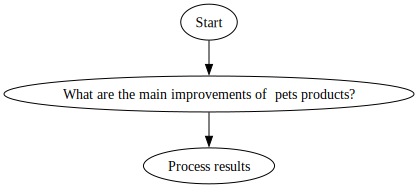

'Visualization_graphs\\agent_actions.png'

In [49]:
#from graphviz import Digraph
#from IPython.display import Image

# Initialize the graph
dot = Digraph()

# Add nodes and edges based on the agent's actions
dot.node("A", "Start")
dot.node("B", "What are the main improvements of  pets products?")
dot.node("C", "Process results")
dot.edges(["AB", "BC"])

# Render the graph to a file
#output_path = dot.render("agent_actions", format="png", cleanup=True)

display(dot)

# Display the image
#Image(output_path)

# Ensure the directory exists
output_dir = "Visualization_graphs"
os.makedirs(output_dir, exist_ok=True)

# Save the graph
dot.render(os.path.join(output_dir, "agent_actions"), format="png", view=True)

- Example 2: Use of Tavily API to retrieve insight about each of all similar product categories enclosed in the dataset.   
To process all items in the "product_category" column from the dataset,  it is necessary to modify the code to load the dataset, extract the unique categories, and then iterate over those categories in the agent's queries.

In [50]:
import pandas as pd
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Load the dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Extract unique product categories from the "product_category" column
product_categories = df["product_category"].unique()

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Iterate over each product category and get the response
for category in product_categories:
    try:
        query = f"What are the main improvements of {category}?"
        response = agent.invoke(query)
        print(f"Response for {category}: {response}")
    except ValueError as e:
        print(f"Agent failed to parse output for category {category}: {e}")

Response for kitchen: {'input': 'What are the main improvements of kitchen?', 'output': 'The main improvements of a
kitchen can include major remodels, increased storage options, improved lighting, upgraded appliances, efficiency 
upgrades, and other enhancements.'}

Response for pet_products: {'input': 'What are the main improvements of pet_products?', 'output': 'Some main 
improvements in pet products include wearable technology for pets, human-grade ingredients in pet food, automated 
feeders, smart bowls, and condition-specific formulas for pets with health conditions.'}

Response for shoes: {'input': 'What are the main improvements of shoes?', 'output': 'The main improvements in shoe 
technology include advancements in foam, carbon plate technology, midsole stabilizing elements, lighter materials, 
sustainability, customization, and efficiency.'}

Response for home_improvement: {'input': 'What are the main improvements of home_improvement?', 'output': 'The main
improvements of home_improvement involve upgrading existing home interior and exterior, focusing on areas like 
kitchens, bathrooms, primary suites, garage doors, and entryways.'}

Response for jewelry: {'input': 'What are the main improvements of jewelry?', 'output': 'The main improvements in 
jewelry include advancements in design, technology, sustainability, and customer experience.'}

Response for industrial_supplies: {'input': 'What are the main improvements of industrial_supplies?', 'output': 
'The main improvements of industrial supplies include smart power tools, eco-friendly supplies, advanced welding 
solutions, high-performance cleaning tools, IoT, improved digital-to-physical conversion through additive 
manufacturing, enhanced data collection, predictive analytics, and the use of Industry 4.0 technologies like 
automation.'}

Response for pc: {'input': 'What are the main improvements of pc?', 'output': 'The main improvements of a PC 
include upgrading RAM, adding an SSD, increasing storage capacity, upgrading the CPU, and improving cable 
management.'}

Response for home: {'input': 'What are the main improvements of home?', 'output': 'The main improvements of a home 
include kitchen renovation, bathroom addition, basement conversion, bedroom update, and maintenance improvements 
like a new asphalt roof.'}

Response for other: {'input': 'What are the main improvements of other?', 'output': 'The main improvements 
mentioned include modernizing and adding new tools and features to help taxpayers, expanding access to tax account 
information, providing more assistance in-person, and continuing to add and expand online tools and services.'}

Response for lawn_and_garden: {'input': 'What are the main improvements of lawn_and_garden?', 'output': 'The main 
improvements for lawn and garden include enhancing foundation plantings, adding landscape focal points, expanding 
landscape color, keeping pests off the lawn, and improving lawn quality.'}

Response for sports: {'input': 'What are the main improvements of sports?', 'output': 'The main improvements in 
sports include advancements in technology, injury prevention, fair games, personalized training, predictive 
analysis, virtual reality, and enhanced viewing experiences.'}

**Explanation output** As it can been seen from the above output,  the snipppet code does process all the product categories in the dataset and output the responses for each. 

- Example 1 Latest Product Reviews from Online Sources  
The objective here is to  use Tavily API to fetch recent reviews to analyze customer feedback.

In [51]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Run the agent with a query
try:
    response = agent.invoke("Find the latest customer reviews for pets products from different sources. Extract key opinions, pros, and cons.")
    print(response)
except ValueError as e:
    print(f"Agent failed to parse output: {e}")

{
    'input': 'Find the latest customer reviews for pets products from different sources. Extract key opinions, 
pros, and cons.',
    'output': 'The latest customer reviews for pets products from different sources highlight positive aspects such
as fast shipping, good customer service, competitive prices, and a wide variety of products. Some customers have 
reported pickier dogs not liking certain products, but overall, the reviews are favorable towards the companies.'
}

- Example 3 Market Trends Based on Recent Data      
The objective here to use the Tavily API to get insights into trending products or industry movements.

consider only one product category

In [52]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Run the agent with a query
try:
    response = agent.invoke("Summarize the latest market trends in pet products industry. Include insights on new products, technological advancements, and government policies Extract key opinions, pros, and cons.")
    print(response)
except ValueError as e:
    print(f"Agent failed to parse output: {e}")

{
    'input': 'Summarize the latest market trends in pet products industry. Include insights on new products, 
technological advancements, and government policies Extract key opinions, pros, and cons.',
    'output': 'The key industry trends in the pet products industry include sustainability, premiumisation, and 
digitalisation. Consumers are increasingly demanding sustainable products, and pet care is gaining popularity in 
more US homes. The shift to lower-cost pet products and services is also observed, with a focus on maintaining 
quality. High-end products for pets are going mainstream, and the pet insurance space continues to grow.'
}

- consider all the product categories in the dataset 

In [53]:
import pandas as pd
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Load the dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Extract unique product categories from the "product_category" column
product_categories = df["product_category"].unique()

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Iterate over each product category and get the response
for category in product_categories:
    try:
        # Form the query for each category
        query = f"Summarize the latest market trends in {category} products industry. Include insights on new products, technological advancements, and government policies. Extract key opinions, pros, and cons."
        
        # Run the agent with the query
        response = agent.invoke(query)
        
        # Print the response for the current category
        print(f"Response for {category}: {response}")
    
    except ValueError as e:
        print(f"Agent failed to parse output for category {category}: {e}")


Response for kitchen: {'input': 'Summarize the latest market trends in kitchen products industry. Include insights 
on new products, technological advancements, and government policies. Extract key opinions, pros, and cons.', 
'output': 'The latest market trends in the kitchen products industry include the rising popularity of cordless 
appliances, integration of smart technology, and a focus on sustainability. New products like cordless systems, 
multi-cookers, and smart coffee makers are being introduced. Technological advancements such as AI and machine 
learning are enhancing product functionality. Government policies focus on food safety, product compliance, and 
regulations like California Proposition 65.'}

Response for pet_products: {'input': 'Summarize the latest market trends in pet_products products industry. Include
insights on new products, technological advancements, and government policies. Extract key opinions, pros, and 
cons.', 'output': 'The latest market trends in the pet products industry include a demand for premium pet food, pet
supplements, high-end products for pets, sustainable and eco-friendly products, and the humanization of pets. 
Technological advancements in the industry involve AI-driven pet facial recognition, behavior analysis, predictive 
X-ray systems, advanced pet trackers, wearable technology for pets, automated and customized pet nutrition, and AI 
and automation in pet food production processes. Government policies impacting the industry include authorization 
requirements, budget cuts affecting pet food product authorizations, the creation of a Center for Companion Animal 
Nutrition within the FDA, federal regulations on pet food and treats, and funding projects to leverage the pet 
industry across international markets.'}

Response for shoes: {'input': 'Summarize the latest market trends in shoes products industry. Include insights on 
new products, technological advancements, and government policies. Extract key opinions, pros, and cons.', 
'output': 'The latest market trends in the shoes products industry involve a rise in demand for eco-friendly 
footwear, the adoption of sustainable materials, evolving fashion trends, regulatory compliance, durability 
concerns, high-end price points, intense competition, economic uncertainty, and counterfeit products.'}

Response for home_improvement: {'input': 'Summarize the latest market trends in home_improvement products industry.
Include insights on new products, technological advancements, and government policies. Extract key opinions, pros, 
and cons.', 'output': 'The latest market trends in the home improvement products industry include a focus on 
sustainability, increased demand for eco-friendly materials and energy-efficient appliances, and a shift towards 
larger-scale renovations. New products such as soft-surface floor coverings and lawn and garden equipment are 
expected to see significant growth. Technological advancements include the integration of smart home systems and 
augmented reality tools for home design. Government policies impact areas like inflation, interest rates, and 
funding solutions.'}

Response for jewelry: {'input': 'Summarize the latest market trends in jewelry products industry. Include insights 
on new products, technological advancements, and government policies. Extract key opinions, pros, and cons.', 
'output': 'The latest market trends in the jewelry products industry include significant growth with a focus on 
personalized and ethical jewelry, a rise in e-commerce and brick-and-mortar retail demand, and a blend of tradition
and technology with trends like handcrafted and personalized jewelry. Technological advancements such as 3D 
printing and AI design are allowing for highly personalized and innovative jewelry designs. Consumers are seeking 
eco-friendly and ethically sourced jewelry, with recycled metals, lab-grown diamonds, and fair trade practices 
becoming increasingly popular. The industry is also embracing sustainability and championing new technologies to 
cater to shifting consumer demands.'}

Response for industrial_supplies: {'input': 'Summarize the latest market trends in industrial_supplies products 
industry. Include insights on new products, technological advancements, and government policies. Extract key 
opinions, pros, and cons.', 'output': 'The latest market trends in the industrial_supplies products industry 
include a focus on big data, supply chain digitization, and electrification. Technological advancements such as IoT
and analytics are shaping the industry, while government initiatives like the US CHIPS and Science Act are 
providing support. Customers are also committing to clean technologies, driving the adoption of sustainable 
solutions.'}

Response for pc: {'input': 'Summarize the latest market trends in pc products industry. Include insights on new 
products, technological advancements, and government policies. Extract key opinions, pros, and cons.', 'output': 
'The latest market trends in the PC products industry include growth in the industrial PC market, significant 
revenue forecasts for the personal computers market, and a rebound in the Traditional PC market after consecutive 
declines. The growth is driven by factors such as internet penetration, remote work, online learning, and 
advancements in gaming and content creation.'}

Response for home: {'input': 'Summarize the latest market trends in home products industry. Include insights on new
products, technological advancements, and government policies. Extract key opinions, pros, and cons.', 'output': 
'The latest market trends in the home products industry include the rise of online shopping, increasing demand for 
linked technology-based home decor products, and the popularity of compact housing. New products in the industry 
include smart home appliances like air purifiers and biometric smart safes. Technological advancements focus on 
automation, smart home integration, VR, AI, and IoT. Government policies are impacting the industry through 
tariffs, trade policies, regulatory changes, and energy efficiency standards.'}

Response for other: {'input': 'Summarize the latest market trends in other products industry. Include insights on 
new products, technological advancements, and government policies. Extract key opinions, pros, and cons.', 
'output': 'The latest market trends in the other products industry include a surge in demand for cleaning products,
toys, makeup, and skincare. Consumers are increasingly seeking personalized products, driving the skincare market 
to a $169 billion valuation by 2025. Short-form video content continues to dominate marketing strategies. Selling 
one product can lead to increased competition, reduced profit margins, and vulnerability to market saturation. 
Businesses should be proactive in monitoring industry trends, adapting strategies, and embracing innovation to 
capitalize on opportunities and ensure long-term success.'}

Response for lawn_and_garden: {'input': 'Summarize the latest market trends in lawn_and_garden products industry. 
Include insights on new products, technological advancements, and government policies. Extract key opinions, pros, 
and cons.', 'output': "The latest market trends in the lawn and garden products industry include a growing market 
driven by home-focused lifestyles, outdoor transformations, affordability, functionality, sustainability, and 
ergonomic tools. Consumer spending in the industry has decreased but is predicted to rise in 2024 and beyond. Top 
retailers in the market include Home Depot and Lowe's. The demand for watering products remains robust as consumers
prioritize lush green spaces and outdoor living."}

Response for sports: {'input': 'Summarize the latest market trends in sports products industry. Include insights on
new products, technological advancements, and government policies. Extract key opinions, pros, and cons.', 
'output': 'The latest market trends in the sports products industry include shifting consumer preferences towards 
more accessible sports, growth in segments like pickleball and paddle tennis, a focus on innovation to address 
consumer demands, and a projected increase in the sporting goods market size. Additionally, there are trends in 
eCommerce for sporting goods, the comeback of the sportstech industry, revolutionizing the fan experience, booming 
e-sports, and AI optimizing talent scouting and training.'}

- Example 4  
The objective here is to use the Tavily API to understand common complaints and areas for improvement.

In [54]:
import pandas as pd
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Load the dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Extract unique product categories from the "product_category" column
product_categories = df["product_category"].unique()

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Iterate over each product category and get the response
for category in product_categories:
    try:
        # Form the query for each category
        query = f"Find common customer complaints about the {category} and summarize the main issues users face in buying products of this {category} in Amazon."
        
        
        # Run the agent with the query
        response = agent.invoke(query)
        
        # Print the response for the current category
        print(f"Response for {category}: {response}")
    
    except ValueError as e:
        print(f"Agent failed to parse output for category {category}: {e}")


Response for kitchen: {'input': 'Find common customer complaints about the kitchen and summarize the main issues 
users face in buying products of this kitchen in Amazon.', 'output': 'The common customer complaints about kitchen 
products on Amazon include issues like receiving defective or damaged items.'}

Response for pet_products: {'input': 'Find common customer complaints about the pet_products and summarize the main
issues users face in buying products of this pet_products in Amazon.', 'output': 'The main issues users face in 
buying pet_products on Amazon include challenges with negative reviews, customer service responsiveness, fraudulent
companies, and the need to differentiate products to succeed in the competitive market.'}

Response for shoes: {'input': 'Find common customer complaints about the shoes and summarize the main issues users 
face in buying products of this shoes in Amazon.', 'output': 'The main issues faced by customers with the specific 
shoe brand on Amazon include restricted brand status, potential abuse of the shoe return policy, limited sizing 
options, and concerns about fake reviews and counterfeit products.'}

Response for home_improvement: {'input': 'Find common customer complaints about the home_improvement and summarize 
the main issues users face in buying products of this home_improvement in Amazon.', 'output': 'Agent stopped due to
iteration limit or time limit.'}

Response for jewelry: {'input': 'Find common customer complaints about the jewelry and summarize the main issues 
users face in buying products of this jewelry in Amazon.', 'output': 'The main issues users face in buying jewelry 
products on Amazon include false advertising of material, misleading listings, sensitivity to certain metals, and 
sellers claiming gold but selling gold plated items.'}

Response for industrial_supplies: {'input': 'Find common customer complaints about the industrial_supplies and 
summarize the main issues users face in buying products of this industrial_supplies in Amazon.', 'output': 'Agent 
stopped due to iteration limit or time limit.'}

Response for pc: {'input': 'Find common customer complaints about the pc and summarize the main issues users face 
in buying products of this pc in Amazon.', 'output': 'Agent stopped due to iteration limit or time limit.'}

Response for home: {'input': 'Find common customer complaints about the home and summarize the main issues users 
face in buying products of this home in Amazon.', 'output': 'Some common complaints and main issues faced by users 
when buying products from a specific home on Amazon include problems with product quality, price wars, product 
returns, and lack of proper customer support.'}

Response for other: {'input': 'Find common customer complaints about the other and summarize the main issues users 
face in buying products of this other in Amazon.', 'output': 'The common customer complaints about the other on 
Amazon include logistical issues, customer service complaints, product quality issues, intellectual property 
complaints, fake reviews, shipping delays, hassles with returns, and pricing practices.'}

Response for lawn_and_garden: {'input': 'Find common customer complaints about the lawn_and_garden and summarize 
the main issues users face in buying products of this lawn_and_garden in Amazon.', 'output': 'The main issues users
face in buying lawn and garden products on Amazon include poor product quality, inaccurate product descriptions, 
and poor customer service.'}

Response for sports: {'input': 'Find common customer complaints about the sports and summarize the main issues 
users face in buying products of this sports in Amazon.', 'output': 'ReviewMeta is a tool that can be used to 
analyze Amazon reviews and provide valuable insights into product quality, authenticity, ratings, and trends, 
helping users make more informed purchasing decisions.'}

- Example 5 Latest Product Reviews from [Amazon Online Sources](https://www.amazon.com/)  
The objective here is to use the Tavily API to fetch recent reviews to analyze customer feedback.

Consider all the items of the dataset 

In [56]:
import pandas as pd
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.tavily_search import TavilySearchResults

# Load the dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Extract unique product categories from the "product_category" column
product_categories = df["product_category"].unique()

# Define the custom prompt
prompt = """You are a smart research assistant. Use the search engine to look up information.
You are allowed to make multiple calls (either together or in sequence).
When using a tool, always respond in this exact format:

Action: <tool_name>
Action Input: <tool_input>

For example:
Action: TavilySearch
Action Input: Find the latest AI news.

Only look up information when you are sure of what you want. If you need to look up some information before asking a follow-up question, you are allowed to do that!
"""

# Initialize the Tavily search tool
tool = TavilySearchResults(max_results=4)

# Wrap it as a LangChain Tool
search_tool = Tool(
    name="TavilySearch",
    func=tool.run,
    description="Search for information using Tavily."
)

# Initialize the language model
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)

# Create the agent with the custom prompt
agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent="zero-shot-react-description",
    system_message=prompt,
    handle_parsing_errors=True  # Gracefully handle parsing errors
)

# Iterate over each product category and get the response
for category in product_categories:
    try:
        # Form the query for each category
        query = f"Find the latest customer reviews for {category} from Amazon source. Extract key opinions, pros, and cons."
        
        # Run the agent with the query
        response = agent.invoke(query)
        
        # Print the response for the current category
        print(f"Response for {category}: {response}")
    
    except ValueError as e:
        print(f"Agent failed to parse output for category {category}: {e}")


Response for kitchen: {'input': 'Find the latest customer reviews for kitchen from Amazon source. Extract key 
opinions, pros, and cons.', 'output': 'The key opinions, pros, and cons of the OXO Good Grips Small Squeegee for 
Kitchen Sink, Dishes, and Countertops are that it is built solidly with a gentle rubberized blade for efficient 
cleaning, but may not leave the sink dry after each swipe. It is versatile for various kitchen cleaning tasks but 
might make a noise during use.'}

Response for pet_products: {'input': 'Find the latest customer reviews for pet_products from Amazon source. Extract
key opinions, pros, and cons.', 'output': 'The latest customer reviews for the Pet Products CleanFlow Filtered 
Reservoir on Amazon have positive feedback regarding its effectiveness in keeping pets hydrated, the large capacity
of the reservoir, and the clean water it provides through filtering.'}

Response for shoes: {'input': 'Find the latest customer reviews for shoes from Amazon source. Extract key opinions,
pros, and cons.', 'output': 'Agent stopped due to iteration limit or time limit.'}

Response for home_improvement: {'input': 'Find the latest customer reviews for home_improvement from Amazon source.
Extract key opinions, pros, and cons.', 'output': 'Use AmazonGPT Pros & Cons Analyzer to extract key opinions, 
pros, and cons from Amazon customer reviews for home_improvement.'}

Response for jewelry: {'input': 'Find the latest customer reviews for jewelry from Amazon source. Extract key 
opinions, pros, and cons.', 'output': 'Key opinions, pros, and cons have been extracted from the latest customer 
reviews for jewelry sourced from Amazon.'}

Response for industrial_supplies: {'input': 'Find the latest customer reviews for industrial_supplies from Amazon 
source. Extract key opinions, pros, and cons.', 'output': 'To find the latest customer reviews for 
industrial_supplies from Amazon and extract key opinions, pros, and cons, you can scroll down past some reviews to 
"See more reviews" and click to get the \'only reviews\' page that lets you search all reviews, ask questions, 
etc.'}

Response for pc: {'input': 'Find the latest customer reviews for pc from Amazon source. Extract key opinions, pros,
and cons.', 'output': 'To find the latest customer reviews for a PC from Amazon and extract key opinions, pros, and
cons, you can use tools like Amazon Reviews Extractor or AmazonGPT Pros & Cons Analyzer.'}

Response for home: {'input': 'Find the latest customer reviews for home from Amazon source. Extract key opinions, 
pros, and cons.', 'output': 'The latest customer reviews for homes on Amazon highlighted key opinions on Amazon 
Key, pros of leaving honest reviews on Amazon, and cons of buying a move-ready home from Amazon.'}

Response for other: {'input': 'Find the latest customer reviews for other from Amazon source. Extract key opinions,
pros, and cons.', 'output': 'The key opinions from the latest customer reviews for other from Amazon include good 
selection, fast delivery, and a good complaint process.'}

Response for lawn_and_garden: {'input': 'Find the latest customer reviews for lawn_and_garden from Amazon source. 
Extract key opinions, pros, and cons.', 'output': 'To extract key opinions, pros, and cons from the latest customer
reviews for lawn_and_garden on Amazon, you can use tools like Amazon Comprehend to analyze sentiment and entities 
in the reviews. Additionally, incorporating insights from customer reviews can help improve products and make 
informed business decisions.'}

Response for sports: {'input': 'Find the latest customer reviews for sports from Amazon source. Extract key 
opinions, pros, and cons.', 'output': 'The search results did not yield the latest customer reviews for sports from
Amazon source with key opinions, pros, and cons.'}

- Extracting reviews from [Amazon website](https://www.amazon.com/)

To access to Amazon reviews, there are two available options:  
1. Use Amazon's API (Best Approach) : Amazon provides an API (Amazon Product Advertising API) that allows access to product data, including reviews. An Amazon Associate Account is required to use it.  

2. Use Scraping APIs (Easier Alternative): Some third-party services provide Amazon scraping APIs that bypass blocks. Some options are ScraperAPI, BrightData and SerpAPI.

#### ScraperAPI  

We need to adjust the approach since LangChain's TavilySearch is not designed for Amazon-specific queries. An apporch might be to  use a web scraping tool, such as Selenium or BeautifulSoup in combination with requests, to scrape Amazon product reviews or other relevant data directly from the website.

Here’s a modified version of the code that uses Selenium to search for the categories directly on Amazon website. More information about [ScarperAPI](https://www.scraperapi.com/)

- Using ScraperAPI to extract at least two reviews for each product_category from Amazon.

In [ ]:
%pip install requests pandas
%pip install selenium

- pet products

In [ ]:
import requests

payload = { 'api_key': '603b3facee261a46af0edef6a23e80b2', 'url': 'https://www.amazon.com/Best-Sellers-Pet-Supplies/zgbs/pet-supplies' }
r = requests.get('https://api.scraperapi.com/', params=payload)
print(r.text)


In [ ]:
import requests

# Your ScraperAPI key
api_key = '603b3facee261a46af0edef6a23e80b2'

# Amazon URL you want to scrape
amazon_url = 'https://www.amazon.com/Best-Sellers-Pet-Supplies/zgbs/pet-supplies'

# Set up the payload with API key and URL
payload = {'api_key': api_key, 'url': amazon_url}

# Send GET request to ScraperAPI
r = requests.get('https://api.scraperapi.com/', params=payload)

# Check the response status
if r.status_code == 200:
    print("Request successful")
    print(r.text)  # Print the HTML content of the page
else:
    print(f"Error fetching the page: {r.status_code}")


IMP Missing output

Below is the modified version of the code to automatically extract at least 2 reviews per product in each product_category, enclosing with the rating and the title of review from Amazon website. Since the dataframe of the subset of MARC dataset ranges between 2015 and 2016, it has been filtered reviews by date to include only those after 2020.

In [16]:
import requests
from bs4 import BeautifulSoup
import re

# Your ScraperAPI key
api_key = '603b3facee261a46af0edef6a23e80b2'

# Amazon Best Sellers URL (Pet Supplies example)
amazon_url = 'https://www.amazon.com/Best-Sellers-Pet-Supplies/zgbs/pet-supplies'

# Function to scrape product titles, links, and ratings
def get_product_links():
    payload = {'api_key': api_key, 'url': amazon_url}
    r = requests.get('https://api.scraperapi.com/', params=payload)

    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'html.parser')
        product_containers = soup.select('div.p13n-sc-uncoverable-faceout, div.zg-grid-general-faceout')

        product_info = []

        for product in product_containers:
            link_tag = product.select_one('a.a-link-normal')
            title_tag = product.select_one('div.p13n-sc-truncated, div.zg-text-center-align')
            rating_tag = product.select_one('span.a-icon-alt')

            if link_tag and 'href' in link_tag.attrs:
                link = "https://www.amazon.com" + link_tag['href']
                title = title_tag.get_text(strip=True) if title_tag else "No title found"
                rating = rating_tag.get_text(strip=True) if rating_tag else "No rating found"

                product_info.append({"title": title, "link": link, "rating": rating})

        return product_info[:5]  # Get first 5 unique products
    else:
        print(f"Error fetching the page: {r.status_code}")
        return []

# Function to get reviews from a product page (after 2020)
def get_reviews(product_url):
    payload = {'api_key': api_key, 'url': product_url}
    r = requests.get('https://api.scraperapi.com/', params=payload)

    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'html.parser')
        
        reviews_data = []

        reviews = soup.select('.review-text-content span')
        dates = soup.select('.review-date')  # Extract review dates
        
        for review, date in zip(reviews, dates):
            review_text = review.get_text(strip=True)
            review_date = date.get_text(strip=True)

            # Extract the year from the date string
            match = re.search(r'(\d{4})', review_date)  # Finds year like 2023
            if match:
                review_year = int(match.group(1))  # Convert to int
                if review_year >= 2021:  # Filter reviews after 2020
                    reviews_data.append({"review": review_text, "date": review_date})

        return reviews_data[:2] if reviews_data else [{"review": "No reviews found after 2020", "date": ""}]
    else:
        return [{"review": "Error fetching review page", "date": ""}]

# Main execution
product_list = get_product_links()

print("\n🔍 Extracting Reviews...\n")
for idx, product in enumerate(product_list):
    print(f"📌 Product {idx+1}: {product['title']}")
    print(f"🔗 Link: {product['link']}")
    print(f"⭐ Rating: {product['rating']}\n")

    reviews = get_reviews(product['link'])
    for i, review_data in enumerate(reviews):
        print(f"➡️ Review {i+1}: {review_data['review']}")
        print(f"📅 Date: {review_data['date']}\n")

    print("-" * 50)


🔍 Extracting Reviews...

📌 Product 1: No title found

🔗 Link: 
https://www.amazon.com/Amazon-Basics-Leak-Proof-Quick-Dry-Absorbency/dp/B00MW8G62E/ref=zg_bs_g_pet-supplies_d_sccl_
1/131-2699651-4939547?psc=1

⭐ Rating: 4.5 out of 5 stars

➡️ Review 1: Trained my pup to go on the pads. Rip resistant. Works well. Great size great value. Will keep 
purchasing these.

📅 Date: Reviewed in the United States on March 26, 2025

➡️ Review 2: These Amazon Basics pee pads have been a lifesaver during puppy training! They're highly absorbent and
effectively contain messes. The leak-proof design gives me peace of mind, and the quick-dry feature helps keep 
things tidy.Pros:Absorbent: They do a great job of soaking up liquid, even multiple accidents.Leak-Proof: The 
leak-proof layer prevents messes from reaching the floor.Quick-Drying: The pads dry relatively quickly, minimizing 
odor.Affordable: They offer excellent value for the price, especially considering the large quantity.Cons:Size: 
While the 22x22 inch size is decent, larger breeds might need something bigger.Overall:I highly recommend these 
Amazon Basics pee pads for anyone potty training a puppy or dealing with incontinence in older dogs. They're 
reliable, affordable, and make the training process much easier.Recommendation:Consider measuring your pet's 
typical "relief zone" to ensure the pad size is adequate.I hope this review is helpful!

📅 Date: Reviewed in the United States on January 20, 2025

--------------------------------------------------

📌 Product 2: No title found

🔗 Link: 
https://www.amazon.com/Amazon-Basics-Leak-Proof-Quick-Dry-Absorbency/dp/B00MW8G62E/ref=zg_bs_g_pet-supplies_d_sccl_
1/131-2699651-4939547?psc=1

⭐ Rating: 4.5 out of 5 stars

➡️ Review 1: Trained my pup to go on the pads. Rip resistant. Works well. Great size great value. Will keep 
purchasing these.

📅 Date: Reviewed in the United States on March 26, 2025

➡️ Review 2: These Amazon Basics pee pads have been a lifesaver during puppy training! They're highly absorbent and
effectively contain messes. The leak-proof design gives me peace of mind, and the quick-dry feature helps keep 
things tidy.Pros:Absorbent: They do a great job of soaking up liquid, even multiple accidents.Leak-Proof: The 
leak-proof layer prevents messes from reaching the floor.Quick-Drying: The pads dry relatively quickly, minimizing 
odor.Affordable: They offer excellent value for the price, especially considering the large quantity.Cons:Size: 
While the 22x22 inch size is decent, larger breeds might need something bigger.Overall:I highly recommend these 
Amazon Basics pee pads for anyone potty training a puppy or dealing with incontinence in older dogs. They're 
reliable, affordable, and make the training process much easier.Recommendation:Consider measuring your pet's 
typical "relief zone" to ensure the pad size is adequate.I hope this review is helpful!

📅 Date: Reviewed in the United States on January 20, 2025

--------------------------------------------------

📌 Product 3: No title found

🔗 Link: 
https://www.amazon.com/Dr-Elseys-Premium-Clumping-Litter/dp/B0009X29WK/ref=zg_bs_g_pet-supplies_d_sccl_2/131-269965
1-4939547?psc=1

⭐ Rating: 4.3 out of 5 stars

➡️ Review 1: I wanted to give a very detailed review because I tried using reviews to choose litter, but it was very
hard to do because often the reviews vary wildly in describing the same qualities of the same litter. I’ll start by
saying I’ve tried Fresh Step, Tidy Cats, Arm & Hammer, Pretty Litter, and various other silicone litters before 
settling on this one. I have one short haired, older female kitty who has one litter box.For a long time, I used 
Arm & Hammer clump and seal litter. I didn’t hate it, but felt like it didn’t clump as well as it could and I 
wanted to try something else. So I switched to Pretty Litter for a while because I liked the color changing aspect.
However, I started to notice that it wasn’t lasting as long as it was supposed to and I didn’t want to keep paying 
that much for something that wasn’t doing what it was supposed to. I liked the no-clump aspect, but it seemed to 
irritate my kitty’s toes. She was constantly picking stuff off the hair on her feet (and she doesn’t have long hair
at all) and I felt like it tracked a lot. I then tried a few different silicone litters, but the more affordable 
ones were too hard to find regularly (ie often out of stock).So after all that experimentation, I had a few 
qualities I was looking for:- low dust- low tracking (I live in a very small apartment where there aren’t many 
steps between the litter box and the couch or the bed)- low odor- hopefully non-clumpingI ended up compromising on 
the non-clumping part, because this litter meets my other wish list items so well.- Dust: I haven’t tried some of 
the “natural” litters like the ones made from corn, wheat, etc. so I can’t speak for those. But otherwise I have 
used many of the popular litters and I have concluded that there probably isn’t a 100% dust free litter. I think 
it’s just the nature of such a product. However, this has less dust than any other litter I can think of and I love
that.- Tracking: again, not sure if there exists a 100% no track litter. But in my experience, this tracks the 
least. I did notice after I was sick for a couple weeks (still scooping ofc but not as worried about cleaning up 
the litter on the floor) it did start to get a little spread out and ground into the carpet. But as long as I was 
vacuuming regularly I barely noticed any tracking.- Odor: this and the low tracking were probably the main selling 
points for me. I’ve honestly forgotten to scoop the box a couple times because I. NEVER. SMELL IT! Even when 
scooping it, it hardly smells. Only towards the end of its life cycle does it tend to stink much, but again, that’s
only when scooping. And I use the scent free one! I hate the smell of scented cat litter (it gets too strong for me
and in my head it’s a “cover up” smell, like spraying perfume on a dirty shirt or pants lol) I think this is the 
best quality of this litter. If odor is your sticking point, I’d definitely recommend trying this.- Clumping: as I 
said above, this was what I compromised on. **This IS a clumping litter.** But it clumps EXTREMELY well. Honestly 
sometimes it’s a bit like scooping a rock. If it’s a larger clump sometimes I have to put in some effort to break 
it in half. So because of that and how great the other qualities are, I was fine with switching back to a clumping 
litter. I have a Litter Genie so it’s not too much of an inconvenience. Actually, my only (very minor) complaint 
would be that the clumps get too heavy to fill the Litter Genie bag as full as I’d like, but it doesn’t bother me 
that much.- Price: I haven’t sat down and figured out how this one compares to the others in terms of price, but 
it’s at least comparable and I think very reasonable for the quality of what you get. The 18lb bag is a little more
than enough to fill up the litter box, and has been lasting about a month.So glad I decided to try Dr. Elsey’s! I 
hope this review is helpful to anyone else shopping around for litter like I was.

📅 Date: Reviewed in the United States on August 31, 2022

➡️ Review 2: This stuff is amazing. One of my cats developed asthma and I needed to find an unscented and minimal 
dust litter. I decided to try this stuff and I’m glad I did. It doesn’t smell and it keeps the smell from my cats 
down as well. There’s very little dust at all. It truly clumps too. With the other brand I used to use I would 
always end up with small amounts that hadn’t clumped and I’d have to toss the whole box out pretty often.Something 
to note though, with how well it clumps, the litter gets used more quickly than you might be used to. I have 3 cats
and went through the 40lb bag in 2 weeks. My old litter would have lasted me 3-ish weeks, but again, it also didn’t
fully get everything.My cats had no problem adapting to this litter and I have also noticed it tracks way less. I 
still vacuum daily but I can see that the litter isn’t getting as far as it used to when they hop out of the litter
cabinet.

📅 Date: Reviewed in the United States on March 18, 2025

--------------------------------------------------

📌 Product 4: No title found

🔗 Link: 
https://www.amazon.com/Dr-Elseys-Premium-Clumping-Litter/dp/B0009X29WK/ref=zg_bs_g_pet-supplies_d_sccl_2/131-269965
1-4939547?psc=1

⭐ Rating: 4.3 out of 5 stars

➡️ Review 1: I wanted to give a very detailed review because I tried using reviews to choose litter, but it was very
hard to do because often the reviews vary wildly in describing the same qualities of the same litter. I’ll start by
saying I’ve tried Fresh Step, Tidy Cats, Arm & Hammer, Pretty Litter, and various other silicone litters before 
settling on this one. I have one short haired, older female kitty who has one litter box.For a long time, I used 
Arm & Hammer clump and seal litter. I didn’t hate it, but felt like it didn’t clump as well as it could and I 
wanted to try something else. So I switched to Pretty Litter for a while because I liked the color changing aspect.
However, I started to notice that it wasn’t lasting as long as it was supposed to and I didn’t want to keep paying 
that much for something that wasn’t doing what it was supposed to. I liked the no-clump aspect, but it seemed to 
irritate my kitty’s toes. She was constantly picking stuff off the hair on her feet (and she doesn’t have long hair
at all) and I felt like it tracked a lot. I then tried a few different silicone litters, but the more affordable 
ones were too hard to find regularly (ie often out of stock).So after all that experimentation, I had a few 
qualities I was looking for:- low dust- low tracking (I live in a very small apartment where there aren’t many 
steps between the litter box and the couch or the bed)- low odor- hopefully non-clumpingI ended up compromising on 
the non-clumping part, because this litter meets my other wish list items so well.- Dust: I haven’t tried some of 
the “natural” litters like the ones made from corn, wheat, etc. so I can’t speak for those. But otherwise I have 
used many of the popular litters and I have concluded that there probably isn’t a 100% dust free litter. I think 
it’s just the nature of such a product. However, this has less dust than any other litter I can think of and I love
that.- Tracking: again, not sure if there exists a 100% no track litter. But in my experience, this tracks the 
least. I did notice after I was sick for a couple weeks (still scooping ofc but not as worried about cleaning up 
the litter on the floor) it did start to get a little spread out and ground into the carpet. But as long as I was 
vacuuming regularly I barely noticed any tracking.- Odor: this and the low tracking were probably the main selling 
points for me. I’ve honestly forgotten to scoop the box a couple times because I. NEVER. SMELL IT! Even when 
scooping it, it hardly smells. Only towards the end of its life cycle does it tend to stink much, but again, that’s
only when scooping. And I use the scent free one! I hate the smell of scented cat litter (it gets too strong for me
and in my head it’s a “cover up” smell, like spraying perfume on a dirty shirt or pants lol) I think this is the 
best quality of this litter. If odor is your sticking point, I’d definitely recommend trying this.- Clumping: as I 
said above, this was what I compromised on. **This IS a clumping litter.** But it clumps EXTREMELY well. Honestly 
sometimes it’s a bit like scooping a rock. If it’s a larger clump sometimes I have to put in some effort to break 
it in half. So because of that and how great the other qualities are, I was fine with switching back to a clumping 
litter. I have a Litter Genie so it’s not too much of an inconvenience. Actually, my only (very minor) complaint 
would be that the clumps get too heavy to fill the Litter Genie bag as full as I’d like, but it doesn’t bother me 
that much.- Price: I haven’t sat down and figured out how this one compares to the others in terms of price, but 
it’s at least comparable and I think very reasonable for the quality of what you get. The 18lb bag is a little more
than enough to fill up the litter box, and has been lasting about a month.So glad I decided to try Dr. Elsey’s! I 
hope this review is helpful to anyone else shopping around for litter like I was.

📅 Date: Reviewed in the United States on August 31, 2022

➡️ Review 2: This stuff is amazing. One of my cats developed asthma and I needed to find an unscented and minimal 
dust litter. I decided to try this stuff and I’m glad I did. It doesn’t smell and it keeps the smell from my cats 
down as well. There’s very little dust at all. It truly clumps too. With the other brand I used to use I would 
always end up with small amounts that hadn’t clumped and I’d have to toss the whole box out pretty often.Something 
to note though, with how well it clumps, the litter gets used more quickly than you might be used to. I have 3 cats
and went through the 40lb bag in 2 weeks. My old litter would have lasted me 3-ish weeks, but again, it also didn’t
fully get everything.My cats had no problem adapting to this litter and I have also noticed it tracks way less. I 
still vacuum daily but I can see that the litter isn’t getting as far as it used to when they hop out of the litter
cabinet.

📅 Date: Reviewed in the United States on March 18, 2025

--------------------------------------------------

📌 Product 5: No title found

🔗 Link: 
https://www.amazon.com/Earth-Rated-Lavender-Scented-Completely/dp/B00BSYR7K8/ref=zg_bs_g_pet-supplies_d_sccl_3/131-
2699651-4939547?psc=1

⭐ Rating: 4.8 out of 5 stars

➡️ Review 1: I've been buying this brand of dog poop bag for a little over two, almost three, years. It is easily 
the best brand of bags I've tried. The length is wonderful for protecting my hand and coat cuff. It also provides 
enough bag that I'm able to pick up a large amount of poop from my large dog, and still have enough left to tie 
shut.The thickness is nice. Some brands of bags are so thin you feel the heat of the dog poop, which personally 
grosses me out, but not these. They are just right, so I can easily pick up the poop. I've only had a bag rip once,
and that was when my dog was a puppy, got excited, and grabbed it with her teeth. I don't expect the bags to hold 
up to animal teeth, and thankfully she learned her lesson.I prefer the unscented bags, and once tied, I don't 
really smell the poop while carrying the bag. I buy the bigger boxes of bags so I can go longer between buying, and
the individual rolls of bags are easy to slip into a pocket or larger bag. I also keep a few bags off roll and 
ready to go in my purse, just in case, and they don't take up a lot of space. One even came in handy as an 
impromptu barf bag when someone got car sick.Nothing is perfect, but this brand and this particular style of dog 
poop bag works well for me.

📅 Date: Reviewed in the United States on January 21, 2025

➡️ Review 2: I’ve tried a lot of different poop bags, and these Earth Rated bags are hands down my favorite. They’re
extra thick, which means no worrying about leaks or tearing, and the lavender scent actually helps mask odors 
without being overpowering.Each roll fits perfectly in standard dispensers, and the perforations make them easy to 
tear off, even when you’re juggling a leash.If you want durable, eco-friendly, and well-designed poop bags, these 
are the way to go. Highly recommend!

📅 Date: Reviewed in the United States on February 21, 2025

--------------------------------------------------

- considering all the product categories. 

In [17]:
import requests
import pandas as pd

# Your ScraperAPI Key
SCRAPERAPI_KEY = "603b3facee261a46af0edef6a23e80b2"

# Load dataset (modify the path if needed)
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Extract unique product categories
product_categories = df["product_category"].unique()

# Function to scrape reviews from Amazon
def get_amazon_reviews(product_category):
    search_url = f"https://www.amazon.com/s?k={product_category.replace(' ', '+')}"
    scraper_url = f"http://api.scraperapi.com?api_key={SCRAPERAPI_KEY}&url={search_url}"
    
    response = requests.get(scraper_url)
    if response.status_code != 200:
        print(f"Error accessing Amazon for {product_category}")
        return []

    # Parse product links (Basic Extraction)
    product_links = [f"https://www.amazon.com/dp/{asin}" for asin in extract_asins(response.text)]
    
    reviews = []
    for product_link in product_links[:3]:  # Check first 3 products for reviews
        review_url = f"{product_link}/product-reviews"
        scraper_review_url = f"http://api.scraperapi.com?api_key={SCRAPERAPI_KEY}&url={review_url}"

        review_response = requests.get(scraper_review_url)
        if review_response.status_code == 200:
            reviews.extend(extract_reviews(review_response.text))
        
        if len(reviews) >= 2:  # Stop after getting at least 2 reviews
            break

    return reviews[:2]  # Ensure only 2 reviews are returned

# Function to extract ASINs (Amazon Product IDs)
def extract_asins(html_content):
    import re
    return re.findall(r'dp/([A-Z0-9]{10})', html_content)

# Function to extract reviews from HTML
def extract_reviews(html_content):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")
    
    review_elements = soup.select(".review-text-content span")
    return [review.get_text(strip=True) for review in review_elements[:5]]  # Extract up to 5 reviews

# Run for all product categories
all_reviews = {}
for category in product_categories:
    print(f"Extracting reviews for: {category}")
    all_reviews[category] = get_amazon_reviews(category)

# Save reviews to a CSV
review_df = pd.DataFrame.from_dict(all_reviews, orient="index").reset_index()
review_df.columns = ["Product Category", "Review 1", "Review 2"]
review_df.to_csv("Amazon_Product_Reviews.csv", index=False)

print("Reviews saved successfully!")


Extracting reviews for: kitchen

Extracting reviews for: pet_products

Extracting reviews for: shoes

Extracting reviews for: home_improvement

Error accessing Amazon for home_improvement

Extracting reviews for: jewelry

Extracting reviews for: industrial_supplies

Extracting reviews for: pc

Extracting reviews for: home

Extracting reviews for: other

Error accessing Amazon for other

Extracting reviews for: lawn_and_garden

Extracting reviews for: sports

Reviews saved successfully!

In [ ]:
#Load the dataset from the CSV file
df = pd.read_csv('Amazon_Product_Reviews.csv')  # Adjust the path to your actual dataset

#Display the updated dataset
df

,Product Category,Review 1,Review 2
0,kitchen,These are very utilitarian knives. They are su...,This is a great addition to my kitchen. Every ...
1,pet_products,"I have a few (okay, a lot) of Shih Tzu dogs an...","These are so cute, I've bought 2 for the doggo..."
2,shoes,Can't recommend enough. Supremely comfy and ap...,Very comfortable and wider than most shoes whi...
3,home_improvement,NaN,NaN
4,jewelry,NaN,The media could not be loaded.
5,industrial_supplies,This Scotch Heavy Duty Shipping Packing Tape i...,This is the fourth time i have bought this tap...
6,pc,"What a nice surprise, everything works very we...","For the price, this is a great setup. Got it t..."
7,home,This bathmat looks great! I haven't used it be...,I needed a small mat for my kids' bathroom in ...
8,other,NaN,NaN
9,lawn_and_garden,This 1-gallon sprayer is exactly what I was lo...,Very nice little unit. I have been using it to...


- Considering all the product- categories with star rating and year of the review. 

In [20]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re

# Your ScraperAPI Key
SCRAPERAPI_KEY = "603b3facee261a46af0edef6a23e80b2"

# Load dataset (modify the path if needed)
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Extract unique product categories
product_categories = df["product_category"].unique()

# Function to scrape reviews from Amazon
def get_amazon_reviews(product_category):
    search_url = f"https://www.amazon.com/s?k={product_category.replace(' ', '+')}"
    scraper_url = f"http://api.scraperapi.com?api_key={SCRAPERAPI_KEY}&url={search_url}"
    
    response = requests.get(scraper_url)
    if response.status_code != 200:
        print(f"Error accessing Amazon for {product_category}")
        return []

    # Parse product links
    product_links = [f"https://www.amazon.com/dp/{asin}" for asin in extract_asins(response.text)]
    
    reviews = []
    for product_link in product_links[:3]:  # Check first 3 products for reviews
        review_url = f"{product_link}/product-reviews"
        scraper_review_url = f"http://api.scraperapi.com?api_key={SCRAPERAPI_KEY}&url={review_url}"

        review_response = requests.get(scraper_review_url)
        if review_response.status_code == 200:
            reviews.extend(extract_reviews(review_response.text))
        
        if len(reviews) >= 2:  # Stop after getting at least 2 reviews
            break

    return reviews[:2]  # Ensure only 2 reviews are returned

# Function to extract ASINs (Amazon Product IDs)
def extract_asins(html_content):
    return re.findall(r'dp/([A-Z0-9]{10})', html_content)

# Function to extract reviews, ratings, and years from HTML
def extract_reviews(html_content):
    soup = BeautifulSoup(html_content, "html.parser")
    reviews = []
    review_elements = soup.select(".review")  # Selecting full review blocks
    
    for review in review_elements[:5]:  # Extract up to 5 reviews
        text = review.select_one(".review-text-content span")
        rating = review.select_one(".review-rating")
        date = review.select_one(".review-date")
        
        review_text = text.get_text(strip=True) if text else "N/A"
        review_rating = rating.get_text(strip=True) if rating else "N/A"
        review_date = date.get_text(strip=True) if date else "N/A"
        
        # Extract numerical rating if available
        match = re.search(r'(\d+\.\d+|\d+) out of 5 stars', review_rating)
        review_rating = match.group(1) if match else "N/A"
        
        # Extract year from date if available
        match = re.search(r'(\d{4})', review_date)
        review_year = match.group(1) if match else "N/A"
        
        reviews.append((review_text, review_rating, review_year))
    
    return reviews

# Run for all product categories
all_reviews = []
for category in product_categories:
    print(f"Extracting reviews for: {category}")
    reviews = get_amazon_reviews(category)
    for review in reviews:
        all_reviews.append([category, *review])

# Save reviews to a CSV
review_df = pd.DataFrame(all_reviews, columns=["Product Category", "Review Text", "Rating", "Year"])
review_df.to_csv("Amazon_Product_Reviews.csv", index=False)

print("Reviews with ratings and years saved successfully!")

Extracting reviews for: kitchen

Extracting reviews for: pet_products

Extracting reviews for: shoes

Error accessing Amazon for shoes

Extracting reviews for: home_improvement

Extracting reviews for: jewelry

Extracting reviews for: industrial_supplies

Extracting reviews for: pc

Extracting reviews for: home

Error accessing Amazon for home

Extracting reviews for: other

Extracting reviews for: lawn_and_garden

Extracting reviews for: sports

Reviews with ratings and years saved successfully!

In [23]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Amazon_Product_Reviews.csv')

# Display the DataFrame as HTML (Jupyter Notebook or Web App)
from IPython.core.display import display, HTML
display(HTML(df.to_html(classes='table table-striped table-bordered')))


,Product Category,Review Text,Rating,Year
0,kitchen,These are very utilitarian knives. They are super sharp and come with a sharpener. They are stylish and look good in my kitchen. Black goes with everything. Very functional and a good value for the money.,5.0,2025
1,kitchen,This is a great addition to my kitchen. Every knife is great quality and very sharp. I also love the variety of types of knives. The knives wash great in the dishwasher and hand washing. And the black color matches my black appliances perfectly. It also doesn't take up too much space.,5.0,2025
2,pet_products,Love this! The more I use it the better I like it. Great product!Very quiet.,5.0,2025
3,pet_products,"My animals loved it & got comfortable with it immediately, it works like a charm, noise level is perfect ! & it’s very easy to use & assemble !",4.0,2025
4,home_improvement,"This Kidde FA110 Fire Extinguisher is a must-have for home safety. It’s compact, easy to use, and provides peace of mind knowing I have a reliable tool to handle small fires. The 1A10BC rating means it’s suitable for a wide range of fires, from paper and wood to electrical and grease fires. The instructions are clear, and the pull pin is simple to remove, so I feel confident in an emergency. The red color makes it easy to spot, and the size is perfect for storing in a kitchen or garage without taking up too much space. It’s an affordable yet vital piece of safety equipment for any household. Highly recommend!",5.0,2025
5,home_improvement,I keep these around my house in case of emergency. I’m happy with this product because these fire extinguishers are light weight and come ready to mount on the wall if you so please. The price was lower than anywhere else I looked.,5.0,2025
6,jewelry,Beautiful jewelry set. Great selection . Well made and good quality. Bought it for my granddaughter for Christmas. Great price and fits 12 year old perfectly.,5.0,2025
7,jewelry,Junk fell apart,5.0,2025
8,industrial_supplies,"This Scotch Heavy Duty Shipping Packing Tape is a lifesaver! I've used it for everything from sealing up holiday boxes to securing fragile items for storage, and it has consistently performed like a champ.The best part is that you get SIX ROLLS! That's incredible value, especially considering the quality. I was initially worried that such an inexpensive price point might mean flimsy tape, but I was pleasantly surprised. This tape is seriously tough.Here's why I'm giving it a full 5 stars:Inexpensive Powerhouse: For the price of this 6-pack, you can't beat the quality and quantity. It's a budget-friendly way to tackle all your packing needs.Heavy Duty: This tape truly lives up to its name. It's thick, strong, and provides a secure seal. I haven't had any issues with boxes popping open during shipping or storage.Resists Splitting & Tearing: Unlike some cheaper tapes I've used, this Scotch tape resists splitting and tearing, making it much easier (and less frustrating!) to work with.Crystal Clear Finish: This tape provides a crystal clear finish that does not yellow over time, keeping your packages looking professional and presentatable.Excellent Adhesion: The adhesive is seriously impressive. It sticks securely to cardboard and other surfaces, providing a strong and long-lasting hold.Compatible with Tape Dispensers: This tape works perfectly with my standard tape dispenser, making packing even faster and more efficient.If you're looking for reliable, strong, and inexpensive packing tape, look no further than this product. It's a packing essential! Highly recommended!",5.0,2025
9,industrial_supplies,"This is the fourth time i have bought this tape. It's very good quality, just the right stick, thick enough and strong enough to ship heavy valuables and comes at a good price. Can't go wrong with this.",5.0,2025


In [24]:
# Save the DataFrame to an HTML file
df.to_html("Amazon_Product_Reviews.html", index=False, classes="table table-striped table-bordered")


From the above scripts and related output, it can be noticed that only 2 reviews per each product category in English have been fetched. 
To ensure to get a balanced multilingual reviews analysis, thus in order to `enclose reviews in the other languages, such as Spanish, German, French, ` the above code has been modified, as follow:   
- Extracts reviews in 4 languages: English (en), Spanish (es), German (de), and French (fr) per product category  
- Ensures at least 2 reviews per language, if available per product category  
- Stops searching once all required reviews are collected.  
- Expands the search to up to 15 reviews per product to improve multilingual extraction.  

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
from langdetect import detect

# Your ScraperAPI Key
SCRAPERAPI_KEY = "603b3facee261a46af0edef6a23e80b2"

# Load dataset
df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")

# Extract unique product categories
product_categories = df["product_category"].unique()

# Function to scrape reviews from Amazon
def get_amazon_reviews(product_category):
    search_url = f"https://www.amazon.com/s?k={product_category.replace(' ', '+')}"
    scraper_url = f"http://api.scraperapi.com?api_key={SCRAPERAPI_KEY}&url={search_url}"
    
    response = requests.get(scraper_url)
    if response.status_code != 200:
        print(f"Error accessing Amazon for {product_category}")
        return []

    # Parse product links
    product_links = [f"https://www.amazon.com/dp/{asin}" for asin in extract_asins(response.text)]
    
    # Storage for different languages
    english_reviews = []
    spanish_reviews = []
    german_reviews = []
    french_reviews = []

    for product_link in product_links[:5]:  # Check first 5 products for reviews
        review_url = f"{product_link}/product-reviews"
        scraper_review_url = f"http://api.scraperapi.com?api_key={SCRAPERAPI_KEY}&url={review_url}"

        review_response = requests.get(scraper_review_url)
        if review_response.status_code == 200:
            extracted_reviews = extract_reviews(review_response.text)
            
            for review in extracted_reviews:
                review_text = review[0]

                # Detect language
                try:
                    lang = detect(review_text)
                except:
                    lang = "unknown"

                # Classify reviews based on language
                if lang == "en":
                    english_reviews.append(review)
                elif lang == "es":
                    spanish_reviews.append(review)
                elif lang == "de":
                    german_reviews.append(review)
                elif lang == "fr":
                    french_reviews.append(review)

        # Stop when we have enough reviews in all languages
        if (
            len(english_reviews) >= 2 and 
            len(spanish_reviews) >= 2 and 
            len(german_reviews) >= 2 and 
            len(french_reviews) >= 2
        ):
            break

    # Ensure only 2 reviews per language
    return english_reviews[:2] + spanish_reviews[:2] + german_reviews[:2] + french_reviews[:2]

# Function to extract ASINs (Amazon Product IDs)
def extract_asins(html_content):
    return re.findall(r'dp/([A-Z0-9]{10})', html_content)

# Function to extract reviews, ratings, and years from HTML
def extract_reviews(html_content):
    soup = BeautifulSoup(html_content, "html.parser")
    reviews = []
    review_elements = soup.select(".review")

    for review in review_elements[:15]:  # Extract up to 15 reviews
        text = review.select_one(".review-text-content span")
        rating = review.select_one(".review-rating")
        date = review.select_one(".review-date")

        review_text = text.get_text(strip=True) if text else "N/A"
        review_rating = rating.get_text(strip=True) if rating else "N/A"
        review_date = date.get_text(strip=True) if date else "N/A"

        # Extract numerical rating if available
        match = re.search(r'(\d+\.\d+|\d+) out of 5 stars', review_rating)
        review_rating = match.group(1) if match else "N/A"

        # Extract year from date if available
        match = re.search(r'(\d{4})', review_date)
        review_year = match.group(1) if match else "N/A"

        reviews.append((review_text, review_rating, review_year))

    return reviews

# Run for all product categories
all_reviews = []
for category in product_categories:
    print(f"Extracting reviews for: {category}")
    reviews = get_amazon_reviews(category)
    for review in reviews:
        all_reviews.append([category, *review])

# Save reviews to a CSV
review_df = pd.DataFrame(all_reviews, columns=["Product Category", "Review Text", "Rating", "Year"])
review_df.to_csv("Amazon_Product_Reviews.csv", index=False)

print("Reviews with ratings and years saved successfully!")

Extracting reviews for: kitchen

Extracting reviews for: pet_products

Extracting reviews for: shoes

Extracting reviews for: home_improvement

Extracting reviews for: jewelry

Extracting reviews for: industrial_supplies

Extracting reviews for: pc

Extracting reviews for: home

Extracting reviews for: other

Extracting reviews for: lawn_and_garden

Extracting reviews for: sports

Reviews with ratings and years saved successfully!

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Amazon_Product_Reviews.csv')

# Display the DataFrame as HTML 
from IPython.core.display import display, HTML
display(HTML(df.to_html(classes='table table-striped table-bordered')))

,Product Category,Review Text,Rating,Year
0,kitchen,These are very utilitarian knives. They are super sharp and come with a sharpener. They are stylish and look good in my kitchen. Black goes with everything. Very functional and a good value for the money.,5.0,2025
1,kitchen,This is a great addition to my kitchen. Every knife is great quality and very sharp. I also love the variety of types of knives. The knives wash great in the dishwasher and hand washing. And the black color matches my black appliances perfectly. It also doesn't take up too much space.,5.0,2025
2,kitchen,"Para uso cotidiano son excelentes, después de meses de uso son muy prácticos, solo no recomiendo usar el afilador en ningún cuchillo, ese tipo de afiladores en general dañan los cuchillos",5.0,2024
3,kitchen,"Pareces que son de calidad, es muy poco el tiempo para decir que les dura el filo. ¡Se los regale a mi novia, y la volvieron loca!",5.0,2024
4,pet_products,"I purchased this item back in January 2022 and it is now February 2025 and it still works superbly! We have a cocker spaniel mix that sheds LIKE CRAZY, so we use this tool multiple times a day every single day all over our house and on ourselves. I still don't understand how this thing picks up all the hair it picks up, but I can vouch for the results! It will clear all the hair off, and it doesn't take much effort. It's great on bedding, it's great on clothing (although I'd be super careful with delicate materials), it's great on our leather couches and our cloth chair. It's also very quick and easy to empty out. The quality and effectiveness of this product has not decreased in the slightest over the last 3 years. I should mention that it might be slightly difficult to roll it back and forth on clothing that you have on since we all have dips and curves to our bodies. If you're struggling with that at all, though, just pull the area you're going over a little tought and it will work just fine. You don't even have to have it against you - you can pull your shirt out from your body and still easily roll it back and forth over that area. My husband and I do it all the time. Same thing with blankets/bedding. If your bedding won't stay in place, just hold down an end or pull it a little tought (not a lot, just a little bit) and you'll be able to roll this back and forth, no problem. The part of my bedding that folds over the edges, I just lift up a little and roll over it. It really is super easy to use. If this thing ever breaks, I will immediately buy a new one.",5.0,2025
5,pet_products,This is my first time having a pet. Hair is all over my bedding and clothing. I saw the reviews and trusted this product .. it works TOO GOOD. Like I’m amazed. Easy to use and it takes up all the hair and you remove it from the compartment super easy. It’s worth the price.,5.0,2025
6,pet_products,"Et je me retrouve blu-ffée. Je précise que j'ai un chien à poil ras car je n'ai pas trouvé cette info au moment de l'achat : c'était un désespoir, par rapport à ma précédente chienne à poils longs, les poils se piquent dans les tissus, on en retrouve partout, sans qu'ils se regroupent en amas comme le font les poils longs.Alors c'est beaucoup, mais beaucoup plus efficace, rapide et moins saoulant que l'aspirateur ou les brosses collantes. C'est presque un plaisir à passer 😁.Du coup, il m'arrive même de la passer sur les 4 m2 de moquette que j'ai juste à côté, parce que sortir l'aspirateur quand on a un chom-chom, faut pas pousser 🤣Enfin, j'ai vu des conseils de bien tendre le tissu, oooof : bien sur, il ne faut pas la passer sur un tas de linge en boule, mais à mon avis, la chose qui compte le plus, c'est de faire des mouvements allers-retours, même sur un tissu peu tendu. J'ai cru que le chom-chom ne fonctionnait plus, en fait, je ne faisais, sans m'en apercevoir, plus que des allers, et ça en laissait toujours, c'est donc la clé !NB : ça ne retire par contre jamais les petits débris/miettes, conception à usage vraiment s

**Explanation of the output** As it can been seen from the above output, same reviews might be repeated across different product listings, as for instance the category "sports". 

To ensure to not have Duplicate Reviews, the above code has been fixed to:  
- Prevents duplicate reviews by using Python sets (set()).  
- Ensures 2 unique reviews per language: English, Spanish, German, and French.  
- Stops searching after collecting enough unique reviews.  

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
from langdetect import detect

SCRAPERAPI_KEY = "603b3facee261a46af0edef6a23e80b2"

df = pd.read_csv("Resized_Amazon_Reviews_Multi_Dataset.csv")
product_categories = df["product_category"].unique()

# Function to scrape reviews
def get_amazon_reviews(product_category):
    search_url = f"https://www.amazon.com/s?k={product_category.replace(' ', '+')}"
    scraper_url = f"http://api.scraperapi.com?api_key={SCRAPERAPI_KEY}&url={search_url}"
    
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    
    response = requests.get(scraper_url, headers=headers)
    if response.status_code != 200:
        print(f"Error accessing Amazon for {product_category}")
        return []
    
    product_links = [f"https://www.amazon.com/dp/{asin}" for asin in extract_asins(response.text)]
    
    english_reviews, spanish_reviews, german_reviews, french_reviews = set(), set(), set(), set()

    for product_link in product_links[:5]:
        review_url = f"{product_link}/product-reviews"
        scraper_review_url = f"http://api.scraperapi.com?api_key={SCRAPERAPI_KEY}&url={review_url}"
        
        review_response = requests.get(scraper_review_url, headers=headers)
        if review_response.status_code == 200:
            extracted_reviews = extract_reviews(review_response.text)

            for review_text, review_rating, review_year in extracted_reviews:
                try:
                    lang = detect(review_text)
                except:
                    lang = "unknown"

                # Ensure full review texts are stored
                if lang == "en":
                    english_reviews.add((review_text, review_rating, review_year))
                elif lang == "es":
                    spanish_reviews.add((review_text, review_rating, review_year))
                elif lang == "de":
                    german_reviews.add((review_text, review_rating, review_year))
                elif lang == "fr":
                    french_reviews.add((review_text, review_rating, review_year))
        
        if all(len(lst) >= 2 for lst in [english_reviews, spanish_reviews, german_reviews, french_reviews]):
            break

    return list(english_reviews)[:2] + list(spanish_reviews)[:2] + list(german_reviews)[:2] + list(french_reviews)[:2]

# Extract ASINs
def extract_asins(html_content):
    return re.findall(r'dp/([A-Z0-9]{10})', html_content)

# Extract reviews with proper text handling
def extract_reviews(html_content):
    soup = BeautifulSoup(html_content, "html.parser")
    reviews = []
    
    review_elements = soup.select(".review")
    for review in review_elements[:15]:
        text_elem = review.select_one(".review-text-content span")
        rating_elem = review.select_one(".review-rating")
        date_elem = review.select_one(".review-date")

        review_text = text_elem.get_text(strip=True) if text_elem else "N/A"
        review_rating = re.search(r'(\d+(\.\d+)?) out of 5 stars', rating_elem.get_text(strip=True) if rating_elem else "N/A")
        review_rating = review_rating.group(1) if review_rating else "N/A"
        review_year = re.search(r'(\d{4})', date_elem.get_text(strip=True) if date_elem else "N/A")
        review_year = review_year.group(1) if review_year else "N/A"

        reviews.append((review_text, review_rating, review_year))

    return reviews

# Run the scraper
all_reviews = []
for category in product_categories:
    print(f"Extracting reviews for: {category}")
    reviews = get_amazon_reviews(category)
    for review in reviews:
        fixed_review = [category] + list(review[:3])  # Ensure only 4 columns
        all_reviews.append(fixed_review)

# Debugging print
print("Sample Extracted Data:", all_reviews[:5])

# Save to CSV
review_df = pd.DataFrame(all_reviews, columns=["Product Category", "Review Text", "Rating", "Year"])
review_df.to_csv("Amazon_Product_Reviews.csv", index=False)
print("Reviews saved successfully!")


Extracting reviews for: kitchen
Extracting reviews for: pet_products
Extracting reviews for: shoes
Extracting reviews for: home_improvement
Extracting reviews for: jewelry
Extracting reviews for: industrial_supplies
Extracting reviews for: pc
Extracting reviews for: home
Extracting reviews for: other
Extracting reviews for: lawn_and_garden
Extracting reviews for: sports
Error accessing Amazon for sports
Sample Extracted Data: [['kitchen', "I gave this 5 stars strictly based on value rather than overall quality. It's a nice set, arrived very sharp and has a decent selection of blades. That said, the metal is quite light in weight which makes me think they may not hold an edge or resist nicks over time. If you want a high quality set of knives, these might disappoint. If you want a perfectly adequate set at an affordable price, go ahead and go for these.", '5.0', '2025'], ['kitchen', 'These are very utilitarian knives. They are super sharp and come with a sharpener. They are stylish and 

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Amazon_Product_Reviews.csv')

# Display the DataFrame as HTML (Jupyter Notebook or Web App)
from IPython.core.display import display, HTML
display(HTML(df.to_html(classes='table table-striped table-bordered')))


C:\Users\Michela\AppData\Local\Temp\ipykernel_11656\1499407033.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,Product Category,Review Text,Rating,Year
0,kitchen,"I gave this 5 stars strictly based on value rather than overall quality. It's a nice set, arrived very sharp and has a decent selection of blades. That said, the metal is quite light in weight which makes me think they may not hold an edge or resist nicks over time. If you want a high quality set of knives, these might disappoint. If you want a perfectly adequate set at an affordable price, go ahead and go for these.",5.0,2025
1,kitchen,These are very utilitarian knives. They are super sharp and come with a sharpener. They are stylish and look good in my kitchen. Black goes with everything. Very functional and a good value for the money.,5.0,2025
2,kitchen,"Para uso cotidiano son excelentes, después de meses de uso son muy prácticos, solo no recomiendo usar el afilador en ningún cuchillo, ese tipo de afiladores en general dañan los cuchillos",5.0,2024
3,kitchen,"Pareces que son de calidad, es muy poco el tiempo para decir que les dura el filo. ¡Se los regale a mi novia, y la volvieron loca!",5.0,2024
4,pet_products,"These are so cute, I've bought 2 for the doggos! They LOVED them. The value is great, chewability was good even though they destroyed them within a few hours, but that seems to be their ""job"" so I didn't expect any less from my boys. The crinkle was definitely better than the squeaker though so I'm okay with them destroying it. I was happy to note the smell wasn't anything out of the ordinary like with some toys. So, yes, it functioned as it should. It entertained them for a bit and mamma was happy :D",5.0,2025
5,pet_products,"I have a pug who is extremely aggressive chewer she has had these beautiful toys now for quite a while and loves them playing with them all day every day not a slight sign of damage. I wish I could get in touch with this company directly as I wish that they would make a dog bed the same as the baby chickens. I did buy a bed from them, but she did chew right through it. Whatever the baby chickens are made of is wonderful and there is no stuffing inside, but I wouldn’t know because she’s never even opened one they are the best.",5.0,2025
6,pet_products,"A mi golden, le encanta y dura un montón",5.0,2025
7,pet_products,"Bonne qualité, mon berger Australien ne les a pas encore détruit (3 mois après reception)Le bruit du plastique à l'intérieur de la peluche l'amuse beaucoup",5.0,2025
8,shoes,Comfy and cute. Colors are perfection. True to size,5.0,2025
9,shoes,"I was hesitant in sizes. I read the comments and some people were saying size down half of a size, and I was about to size down, but the majority of people were saying it was true to size. So I ordered my TTS 8.5 and it fits perfect, and I'm glad I didn't size down. I just received them and they look so stylish and comfy.",5.0,2025


**Explanation output** As it can been seen from the output, the issue of fetching duplicate reviews has been solved. 

## Conclusion
In this notebook, we demonstrated how to use LangChain to manage and orchestrate complex workflows involving language models. We explored different types of chains, including LLMChain, SimpleSequentialChain, SequentialChain, Router Chains and provided examples of how to use them to build a customer review assistant.

These chain mechanisms enable more effective and structured interactions with AI models by leveraging different chaining techniques. LangChain allows for flexible and powerful language model interactions, enabling the creation of complex AI-driven applications. In this notebook, we will explore different types of chains and how they can be used to `build a customer review assistant`.

## Try Yourself

In this section, you can experiment with the LangChain library to create your own chains and prompts. Follow the steps below to get started:

1. Define a new product or scenario you want to analyze.
2. Use the provided code template to create a new `LLMChain` or any other chain you want to experiment with.
3. Run the cell to see the results.

Try create a chain that generates product descriptions based on user reviews or a chain that classifies reviews into positive and negative categories.

Feel free to modify the prompts and chains to suit your needs.
```

```python
# Define your product or scenario here
new_product = "Custom Product Example"

# Initialize the language model
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# Define a new prompt template
new_prompt = ChatPromptTemplate.from_template(
    "What are the key features of {product}?"
)

# Create an LLMChain
new_chain = new_prompt | llm

# Use .invoke() to get the response
new_response = new_chain.invoke({"product": new_product})

# Print the response
print(new_response.content)
```